In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gnninterpreter import *
import torch

/home/du0/20CS30037/miniconda3/envs/gnn_inter/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# MUTAG DATASET

In [3]:
global_seed = 200
dataset = MUTAGDataset(seed=global_seed)

In [4]:
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=64,
                      num_layers=3)

model.load_state_dict(torch.load('ckpts/mutag.pt'))

<All keys matched successfully>

In [5]:
dataset.evaluate_model(model)

/home/du0/20CS30037/miniconda3/envs/gnn_inter/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


class idx: 0, class: nonmutagen, f1: 0.8799999952316284
class idx: 1, class: mutagen, f1: 0.9402390718460083


{'nonmutagen': 0.8799999952316284, 'mutagen': 0.9402390718460083}

In [6]:
mean_embeds = dataset.mean_embeddings(model)

In [7]:
trainer = {}
sampler = {}

# Mutagen Class (Class 1)

In [8]:
cls_idx = 1
trainer[cls_idx] = Trainer(
    sampler=(s := GraphSampler(
        max_nodes=20,
        num_node_cls=len(dataset.NODE_CLS),
        num_edge_cls=len(dataset.EDGE_CLS),
        seed=global_seed,
        temperature=0.15,
        learn_node_feat=True,
        learn_edge_feat=True,
    )),
    discriminator=model,
    criterion=WeightedCriterion([
        dict(key="logits", criterion=ClassScoreCriterion(class_idx=cls_idx, mode='maximize'), weight=5),
        dict(key="embeds", criterion=EmbeddingCriterion(target_embedding=mean_embeds[cls_idx]), weight=10),
        dict(key="logits", criterion=MeanPenalty(), weight=0),
        dict(key="omega", criterion=NormPenalty(order=1), weight=4),
        dict(key="omega", criterion=NormPenalty(order=2), weight=4),
#         dict(key="xi", criterion=NormPenalty(order=1), weight=0),
#         dict(key="xi", criterion=NormPenalty(order=2), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=1), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=2), weight=0),
        dict(key="theta_pairs", criterion=KLDivergencePenalty(binary=True), weight=5),
    ]),
    optimizer=(o := torch.optim.SGD(s.parameters(), lr=1)),
    scheduler=torch.optim.lr_scheduler.ExponentialLR(o, gamma=1),
    dataset=dataset,
    budget_penalty=BudgetPenalty(budget=30, order=1, beta=1),
    seed=global_seed,
    target_probs={cls_idx: (0.9, 1)},
    k_samples=16
)


In [9]:
trainer[cls_idx].train(1000)

  0%|          | 0/1000 [00:00<?, ?it/s]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  0%|          | 1/1000 [00:02<36:47,  2.21s/it, size=100, bpw=1.1, nonmutagen=-6.62, mutagen=6.6]

iteration=0, loss=3749.06, size=99.97347259521484, scores={'nonmutagen': -6.619325637817383, 'mutagen': 6.599116802215576}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  0%|          | 2/1000 [00:03<28:37,  1.72s/it, size=83.2, bpw=1.21, nonmutagen=-26, mutagen=25.9]

iteration=1, loss=36684.75, size=83.18914794921875, scores={'nonmutagen': -25.968917846679688, 'mutagen': 25.894046783447266}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  0%|          | 3/1000 [00:04<26:04,  1.57s/it, size=88.9, bpw=1.33, nonmutagen=-27.6, mutagen=27.5]

iteration=2, loss=35262.52, size=88.94133758544922, scores={'nonmutagen': -27.602724075317383, 'mutagen': 27.523237228393555}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  0%|          | 4/1000 [00:06<28:07,  1.69s/it, size=82.6, bpw=1.46, nonmutagen=-29.9, mutagen=29.8]

iteration=3, loss=32466.02, size=82.59254455566406, scores={'nonmutagen': -29.884611129760742, 'mutagen': 29.798677444458008}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  0%|          | 5/1000 [00:08<26:37,  1.61s/it, size=89.6, bpw=1.61, nonmutagen=-26.6, mutagen=26.5]

iteration=4, loss=30303.85, size=89.55680084228516, scores={'nonmutagen': -26.606170654296875, 'mutagen': 26.529499053955078}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  1%|          | 6/1000 [00:09<25:57,  1.57s/it, size=80, bpw=1.77, nonmutagen=-26.9, mutagen=26.8]  

iteration=5, loss=29190.03, size=80.02354431152344, scores={'nonmutagen': -26.909290313720703, 'mutagen': 26.831762313842773}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  1%|          | 7/1000 [00:11<25:49,  1.56s/it, size=87.8, bpw=1.95, nonmutagen=-17, mutagen=16.9]

iteration=6, loss=31790.64, size=87.78787231445312, scores={'nonmutagen': -16.966838836669922, 'mutagen': 16.91739845275879}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  1%|          | 8/1000 [00:12<25:46,  1.56s/it, size=71.9, bpw=2.14, nonmutagen=-16.5, mutagen=16.5]

iteration=7, loss=28119.11, size=71.90233612060547, scores={'nonmutagen': -16.49941062927246, 'mutagen': 16.451292037963867}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  1%|          | 9/1000 [00:14<26:04,  1.58s/it, size=71.1, bpw=2.36, nonmutagen=-18, mutagen=17.9]  

iteration=8, loss=28300.61, size=71.05374908447266, scores={'nonmutagen': -17.970800399780273, 'mutagen': 17.91852378845215}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  1%|          | 10/1000 [00:15<25:00,  1.52s/it, size=85.2, bpw=2.59, nonmutagen=-16.5, mutagen=16.5]

iteration=9, loss=28201.17, size=85.22724914550781, scores={'nonmutagen': -16.5140380859375, 'mutagen': 16.465877532958984}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  1%|          | 11/1000 [00:17<26:22,  1.60s/it, size=73.7, bpw=2.85, nonmutagen=-18.5, mutagen=18.5]

iteration=10, loss=26817.21, size=73.69512939453125, scores={'nonmutagen': -18.549663543701172, 'mutagen': 18.495752334594727}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  1%|          | 12/1000 [00:19<26:09,  1.59s/it, size=80.8, bpw=3.14, nonmutagen=-16.1, mutagen=16]  

iteration=11, loss=25063.94, size=80.80007934570312, scores={'nonmutagen': -16.079471588134766, 'mutagen': 16.03253746032715}


  1%|          | 12/1000 [00:20<26:09,  1.59s/it, size=71.3, bpw=3.45, nonmutagen=-19.4, mutagen=19.3]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  1%|▏         | 13/1000 [00:20<26:17,  1.60s/it, size=71.3, bpw=3.45, nonmutagen=-19.4, mutagen=19.3]

iteration=12, loss=26100.76, size=71.29069519042969, scores={'nonmutagen': -19.36295509338379, 'mutagen': 19.306745529174805}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  1%|▏         | 14/1000 [00:22<25:03,  1.53s/it, size=82.8, bpw=3.8, nonmutagen=-15.2, mutagen=15.2] 

iteration=13, loss=24350.73, size=82.76229095458984, scores={'nonmutagen': -15.248841285705566, 'mutagen': 15.204252243041992}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  2%|▏         | 15/1000 [00:23<25:29,  1.55s/it, size=84.4, bpw=4.18, nonmutagen=-18.3, mutagen=18.3]

iteration=14, loss=24030.50, size=84.35600280761719, scores={'nonmutagen': -18.330705642700195, 'mutagen': 18.27741241455078}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  2%|▏         | 16/1000 [00:25<24:13,  1.48s/it, size=90.6, bpw=4.59, nonmutagen=-17.4, mutagen=17.3]

iteration=15, loss=21017.90, size=90.59954833984375, scores={'nonmutagen': -17.366975784301758, 'mutagen': 17.31640625}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  2%|▏         | 17/1000 [00:26<23:19,  1.42s/it, size=87.9, bpw=5.05, nonmutagen=-17.6, mutagen=17.5]

iteration=16, loss=20360.68, size=87.91179656982422, scores={'nonmutagen': -17.59247398376465, 'mutagen': 17.54126739501953}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  2%|▏         | 18/1000 [00:27<22:40,  1.39s/it, size=89.2, bpw=5.56, nonmutagen=-16.7, mutagen=16.7]

iteration=17, loss=20399.48, size=89.21965026855469, scores={'nonmutagen': -16.71455192565918, 'mutagen': 16.66582489013672}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  2%|▏         | 19/1000 [00:29<22:15,  1.36s/it, size=87, bpw=6.12, nonmutagen=-24.8, mutagen=24.7]  

iteration=18, loss=19383.80, size=87.01020812988281, scores={'nonmutagen': -24.750463485717773, 'mutagen': 24.679033279418945}


  2%|▏         | 19/1000 [00:30<22:15,  1.36s/it, size=86.9, bpw=6.73, nonmutagen=-23.5, mutagen=23.4]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  2%|▏         | 20/1000 [00:30<21:56,  1.34s/it, size=86.9, bpw=6.73, nonmutagen=-23.5, mutagen=23.4]

iteration=19, loss=18790.38, size=86.87130737304688, scores={'nonmutagen': -23.45724868774414, 'mutagen': 23.38947296142578}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  2%|▏         | 21/1000 [00:31<21:41,  1.33s/it, size=87.5, bpw=7.4, nonmutagen=-23.1, mutagen=23]   

iteration=20, loss=19483.68, size=87.5178451538086, scores={'nonmutagen': -23.069520950317383, 'mutagen': 23.002840042114258}


  2%|▏         | 21/1000 [00:32<21:41,  1.33s/it, size=87.2, bpw=8.14, nonmutagen=-22.6, mutagen=22.5]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  2%|▏         | 22/1000 [00:32<21:38,  1.33s/it, size=87.2, bpw=8.14, nonmutagen=-22.6, mutagen=22.5]

iteration=21, loss=19374.24, size=87.23164367675781, scores={'nonmutagen': -22.590360641479492, 'mutagen': 22.525033950805664}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  2%|▏         | 23/1000 [00:34<21:30,  1.32s/it, size=86.2, bpw=8.95, nonmutagen=-22.5, mutagen=22.4]

iteration=22, loss=18776.58, size=86.21113586425781, scores={'nonmutagen': -22.472675323486328, 'mutagen': 22.40768051147461}


  2%|▏         | 23/1000 [00:35<21:30,  1.32s/it, size=86.1, bpw=9.85, nonmutagen=-23.9, mutagen=23.8]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  2%|▏         | 24/1000 [00:35<21:27,  1.32s/it, size=86.1, bpw=9.85, nonmutagen=-23.9, mutagen=23.8]

iteration=23, loss=17654.21, size=86.06951141357422, scores={'nonmutagen': -23.85824203491211, 'mutagen': 23.78933334350586}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  2%|▎         | 25/1000 [00:37<22:15,  1.37s/it, size=89.3, bpw=10.8, nonmutagen=-22.5, mutagen=22.4]

iteration=24, loss=17045.32, size=89.34413146972656, scores={'nonmutagen': -22.512996673583984, 'mutagen': 22.44788932800293}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  3%|▎         | 26/1000 [00:38<22:16,  1.37s/it, size=83, bpw=11.9, nonmutagen=-24, mutagen=24]      

iteration=25, loss=16565.56, size=83.03723907470703, scores={'nonmutagen': -24.035512924194336, 'mutagen': 23.966102600097656}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  3%|▎         | 27/1000 [00:39<22:08,  1.37s/it, size=83.4, bpw=13.1, nonmutagen=-23.7, mutagen=23.7]

iteration=26, loss=16153.60, size=83.38690948486328, scores={'nonmutagen': -23.737058639526367, 'mutagen': 23.66849136352539}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  3%|▎         | 28/1000 [00:41<22:49,  1.41s/it, size=83.2, bpw=14.4, nonmutagen=-22.9, mutagen=22.9]

iteration=27, loss=15649.46, size=83.20206451416016, scores={'nonmutagen': -22.94685935974121, 'mutagen': 22.880523681640625}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  3%|▎         | 29/1000 [00:42<22:56,  1.42s/it, size=84.5, bpw=15.9, nonmutagen=-23.9, mutagen=23.8]

iteration=28, loss=16032.84, size=84.49455261230469, scores={'nonmutagen': -23.871238708496094, 'mutagen': 23.80229377746582}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  3%|▎         | 30/1000 [00:44<22:40,  1.40s/it, size=84.9, bpw=17.4, nonmutagen=-22.5, mutagen=22.5]

iteration=29, loss=16918.82, size=84.93419647216797, scores={'nonmutagen': -22.53534698486328, 'mutagen': 22.47017478942871}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  3%|▎         | 31/1000 [00:45<22:17,  1.38s/it, size=87, bpw=19.2, nonmutagen=-24.2, mutagen=24.2]  

iteration=30, loss=16506.70, size=86.99935913085938, scores={'nonmutagen': -24.23345184326172, 'mutagen': 24.163484573364258}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  3%|▎         | 32/1000 [00:46<22:08,  1.37s/it, size=86.2, bpw=21.1, nonmutagen=-23.5, mutagen=23.4]

iteration=31, loss=16457.50, size=86.16938781738281, scores={'nonmutagen': -23.5029239654541, 'mutagen': 23.43501853942871}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  3%|▎         | 33/1000 [00:48<23:14,  1.44s/it, size=87.9, bpw=23.2, nonmutagen=-22.1, mutagen=22]  

iteration=32, loss=16730.59, size=87.91404724121094, scores={'nonmutagen': -22.077857971191406, 'mutagen': 22.013978958129883}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  3%|▎         | 34/1000 [00:49<23:15,  1.44s/it, size=85.2, bpw=25.5, nonmutagen=-23.9, mutagen=23.8]

iteration=33, loss=16763.21, size=85.217529296875, scores={'nonmutagen': -23.868671417236328, 'mutagen': 23.799732208251953}


  4%|▎         | 35/1000 [00:51<23:23,  1.45s/it, size=86.2, bpw=28.1, nonmutagen=-23.4, mutagen=23.3]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=34, loss=16581.18, size=86.23863983154297, scores={'nonmutagen': -23.40581703186035, 'mutagen': 23.338186264038086}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  4%|▎         | 36/1000 [00:52<22:47,  1.42s/it, size=86.8, bpw=30.9, nonmutagen=-22.7, mutagen=22.7]

iteration=35, loss=16151.12, size=86.80636596679688, scores={'nonmutagen': -22.72498321533203, 'mutagen': 22.659276962280273}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  4%|▎         | 37/1000 [00:54<23:24,  1.46s/it, size=84.6, bpw=34, nonmutagen=-22.8, mutagen=22.8]  

iteration=36, loss=16942.76, size=84.62454223632812, scores={'nonmutagen': -22.827486038208008, 'mutagen': 22.76148796081543}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  4%|▍         | 38/1000 [00:55<22:52,  1.43s/it, size=84.6, bpw=37.4, nonmutagen=-23, mutagen=22.9]

iteration=37, loss=18943.34, size=84.6032943725586, scores={'nonmutagen': -23.002199172973633, 'mutagen': 22.93570899963379}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  4%|▍         | 39/1000 [00:57<23:24,  1.46s/it, size=84.2, bpw=41.1, nonmutagen=-23, mutagen=23]  

iteration=38, loss=18797.68, size=84.22982788085938, scores={'nonmutagen': -23.027870178222656, 'mutagen': 22.961307525634766}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  4%|▍         | 40/1000 [00:58<23:43,  1.48s/it, size=79.8, bpw=45.3, nonmutagen=-23.1, mutagen=23]

iteration=39, loss=17622.84, size=79.77498626708984, scores={'nonmutagen': -23.11209487915039, 'mutagen': 23.0452938079834}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  4%|▍         | 41/1000 [01:00<25:42,  1.61s/it, size=81.5, bpw=49.8, nonmutagen=-24, mutagen=23.9]

iteration=40, loss=17559.69, size=81.54312896728516, scores={'nonmutagen': -24.004722595214844, 'mutagen': 23.935400009155273}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  4%|▍         | 42/1000 [01:01<24:17,  1.52s/it, size=83.8, bpw=54.8, nonmutagen=-21.8, mutagen=21.8]

iteration=41, loss=20018.87, size=83.78643798828125, scores={'nonmutagen': -21.849563598632812, 'mutagen': 21.78632926940918}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  4%|▍         | 43/1000 [01:03<23:32,  1.48s/it, size=82.3, bpw=60.2, nonmutagen=-21.7, mutagen=21.6]

iteration=42, loss=20037.10, size=82.30255126953125, scores={'nonmutagen': -21.702926635742188, 'mutagen': 21.640106201171875}


  4%|▍         | 43/1000 [01:04<23:32,  1.48s/it, size=81.4, bpw=66.3, nonmutagen=-22.7, mutagen=22.6]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  4%|▍         | 44/1000 [01:04<22:44,  1.43s/it, size=81.4, bpw=66.3, nonmutagen=-22.7, mutagen=22.6]

iteration=43, loss=19833.80, size=81.35575866699219, scores={'nonmutagen': -22.66845703125, 'mutagen': 22.602909088134766}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  4%|▍         | 45/1000 [01:05<22:08,  1.39s/it, size=81.9, bpw=72.9, nonmutagen=-23.7, mutagen=23.6]

iteration=44, loss=21180.89, size=81.85742950439453, scores={'nonmutagen': -23.69645881652832, 'mutagen': 23.628005981445312}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  5%|▍         | 46/1000 [01:07<21:42,  1.37s/it, size=77.3, bpw=80.2, nonmutagen=-23.9, mutagen=23.8]

iteration=45, loss=22495.69, size=77.27350616455078, scores={'nonmutagen': -23.885658264160156, 'mutagen': 23.816673278808594}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  5%|▍         | 47/1000 [01:08<22:08,  1.39s/it, size=79.4, bpw=88.2, nonmutagen=-24.9, mutagen=24.9]

iteration=46, loss=22497.71, size=79.35749816894531, scores={'nonmutagen': -24.944171905517578, 'mutagen': 24.872196197509766}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  5%|▍         | 48/1000 [01:10<22:44,  1.43s/it, size=76.3, bpw=97, nonmutagen=-24.8, mutagen=24.7]  

iteration=47, loss=21363.62, size=76.34234619140625, scores={'nonmutagen': -24.773962020874023, 'mutagen': 24.702465057373047}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  5%|▍         | 49/1000 [01:11<23:09,  1.46s/it, size=78.4, bpw=107, nonmutagen=-25.7, mutagen=25.6]

iteration=48, loss=20932.87, size=78.44697570800781, scores={'nonmutagen': -25.661544799804688, 'mutagen': 25.587539672851562}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  5%|▌         | 50/1000 [01:13<24:49,  1.57s/it, size=75.9, bpw=117, nonmutagen=-24.3, mutagen=24.2]

iteration=49, loss=20642.16, size=75.9454574584961, scores={'nonmutagen': -24.312084197998047, 'mutagen': 24.241891860961914}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  5%|▌         | 51/1000 [01:15<25:31,  1.61s/it, size=76.8, bpw=129, nonmutagen=-23.2, mutagen=23.2]

iteration=50, loss=21314.53, size=76.83421325683594, scores={'nonmutagen': -23.218090057373047, 'mutagen': 23.150989532470703}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  5%|▌         | 52/1000 [01:16<24:36,  1.56s/it, size=76, bpw=142, nonmutagen=-23.8, mutagen=23.7]  

iteration=51, loss=21762.53, size=75.95382690429688, scores={'nonmutagen': -23.79295539855957, 'mutagen': 23.724231719970703}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  5%|▌         | 53/1000 [01:18<23:55,  1.52s/it, size=73.7, bpw=156, nonmutagen=-25, mutagen=24.9]

iteration=52, loss=22132.98, size=73.74835968017578, scores={'nonmutagen': -24.957256317138672, 'mutagen': 24.885242462158203}


  5%|▌         | 53/1000 [01:19<23:55,  1.52s/it, size=74.5, bpw=172, nonmutagen=-24.3, mutagen=24.2]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  5%|▌         | 54/1000 [01:19<23:02,  1.46s/it, size=74.5, bpw=172, nonmutagen=-24.3, mutagen=24.2]

iteration=53, loss=23419.06, size=74.51536560058594, scores={'nonmutagen': -24.251588821411133, 'mutagen': 24.181568145751953}


  6%|▌         | 55/1000 [01:20<23:10,  1.47s/it, size=70.8, bpw=189, nonmutagen=-24.8, mutagen=24.7]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=54, loss=23966.70, size=70.7913589477539, scores={'nonmutagen': -24.803964614868164, 'mutagen': 24.732385635375977}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  6%|▌         | 56/1000 [01:22<24:11,  1.54s/it, size=69.5, bpw=208, nonmutagen=-23.4, mutagen=23.4]

iteration=55, loss=26280.04, size=69.48670196533203, scores={'nonmutagen': -23.427207946777344, 'mutagen': 23.35951805114746}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  6%|▌         | 57/1000 [01:24<27:12,  1.73s/it, size=69.4, bpw=229, nonmutagen=-24.6, mutagen=24.6]

iteration=56, loss=27885.66, size=69.41497802734375, scores={'nonmutagen': -24.64749526977539, 'mutagen': 24.576356887817383}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  6%|▌         | 58/1000 [01:27<29:38,  1.89s/it, size=66.7, bpw=252, nonmutagen=-26.3, mutagen=26.2]

iteration=57, loss=29513.41, size=66.6872329711914, scores={'nonmutagen': -26.271421432495117, 'mutagen': 26.195695877075195}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  6%|▌         | 59/1000 [01:28<28:04,  1.79s/it, size=69.8, bpw=277, nonmutagen=-25.7, mutagen=25.6]

iteration=58, loss=31918.95, size=69.8490982055664, scores={'nonmutagen': -25.701021194458008, 'mutagen': 25.626907348632812}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  6%|▌         | 60/1000 [01:30<27:27,  1.75s/it, size=66.8, bpw=304, nonmutagen=-26.3, mutagen=26.2]

iteration=59, loss=31682.37, size=66.82675170898438, scores={'nonmutagen': -26.29692268371582, 'mutagen': 26.22112464904785}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  6%|▌         | 61/1000 [01:31<25:47,  1.65s/it, size=58.9, bpw=335, nonmutagen=-28.3, mutagen=28.2]

iteration=60, loss=31785.54, size=58.92826843261719, scores={'nonmutagen': -28.3022518157959, 'mutagen': 28.220787048339844}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  6%|▌         | 62/1000 [01:33<25:13,  1.61s/it, size=54.2, bpw=368, nonmutagen=-29.2, mutagen=29.1]

iteration=61, loss=30194.39, size=54.244041442871094, scores={'nonmutagen': -29.19077491760254, 'mutagen': 29.106800079345703}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  6%|▋         | 63/1000 [01:34<24:08,  1.55s/it, size=53.3, bpw=405, nonmutagen=-28.8, mutagen=28.7]

iteration=62, loss=29206.06, size=53.33498001098633, scores={'nonmutagen': -28.818021774291992, 'mutagen': 28.7351016998291}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  6%|▋         | 64/1000 [01:36<23:55,  1.53s/it, size=47.4, bpw=446, nonmutagen=-32.1, mutagen=32]  

iteration=63, loss=30417.52, size=47.3638801574707, scores={'nonmutagen': -32.06137466430664, 'mutagen': 31.969289779663086}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  6%|▋         | 65/1000 [01:37<22:49,  1.46s/it, size=45.2, bpw=490, nonmutagen=-30.8, mutagen=30.7]

iteration=64, loss=28131.69, size=45.23774337768555, scores={'nonmutagen': -30.76687240600586, 'mutagen': 30.67844581604004}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>


  7%|▋         | 66/1000 [01:38<22:14,  1.43s/it, size=38.2, bpw=539, nonmutagen=-27.8, mutagen=27.7]

iteration=65, loss=27072.45, size=38.16509246826172, scores={'nonmutagen': -27.751136779785156, 'mutagen': 27.67123031616211}


  7%|▋         | 67/1000 [01:40<21:42,  1.40s/it, size=36, bpw=593, nonmutagen=-27.9, mutagen=27.8]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=66, loss=27583.43, size=35.999237060546875, scores={'nonmutagen': -27.850900650024414, 'mutagen': 27.77071189880371}


  7%|▋         | 68/1000 [01:41<21:16,  1.37s/it, size=32.8, bpw=653, nonmutagen=-27.8, mutagen=27.8]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>
iteration=67, loss=25840.06, size=32.812679290771484, scores={'nonmutagen': -27.832483291625977, 'mutagen': 27.75234603881836}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


  7%|▋         | 69/1000 [01:43<22:35,  1.46s/it, size=25, bpw=718, nonmutagen=-25.7, mutagen=25.6]  

iteration=68, loss=24898.58, size=25.01589012145996, scores={'nonmutagen': -25.659442901611328, 'mutagen': 25.585445404052734}


  7%|▋         | 69/1000 [01:44<23:28,  1.51s/it, size=25, bpw=718, nonmutagen=-25.7, mutagen=25.6]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a360b80>
Expected number of edges of sample: 25.01589012145996; Budget: 30
Current explanation has high prediction probability and low expected maximum number of edges. Hence, it is a good explanation.
Breaking from train loop!



True

n=19 m=25
logits=[-34.58586883544922, 34.48665237426758]
probs=[1.0050404289078548e-30, 1.0]
Graph Viz info: 
No of nodes:  19
Nodes:  [(0, {'label': 'I', 'color': 'cyan'}), (10, {'label': 'F', 'color': 'blue'}), (11, {'label': 'O', 'color': 'green'}), (12, {'label': 'Br', 'color': 'yellowgreen'}), (16, {'label': 'F', 'color': 'blue'}), (19, {'label': 'F', 'color': 'blue'}), (1, {'label': 'F', 'color': 'blue'}), (2, {'label': 'Cl', 'color': 'red'}), (3, {'label': 'I', 'color': 'cyan'}), (5, {'label': 'F', 'color': 'blue'}), (6, {'label': 'F', 'color': 'blue'}), (7, {'label': 'Br', 'color': 'yellowgreen'}), (8, {'label': 'C', 'color': 'orange'}), (9, {'label': 'C', 'color': 'orange'}), (15, {'label': 'C', 'color': 'orange'}), (17, {'label': 'C', 'color': 'orange'}), (4, {'label': 'F', 'color': 'blue'}), (13, {'label': 'N', 'color': 'magenta'}), (14, {'label': 'C', 'color': 'orange'})]
No of edges:  25
Edges:  [(0, 10, {'label': 'single', 'color': 'green', 'width': 2}), (0, 11, {'label':

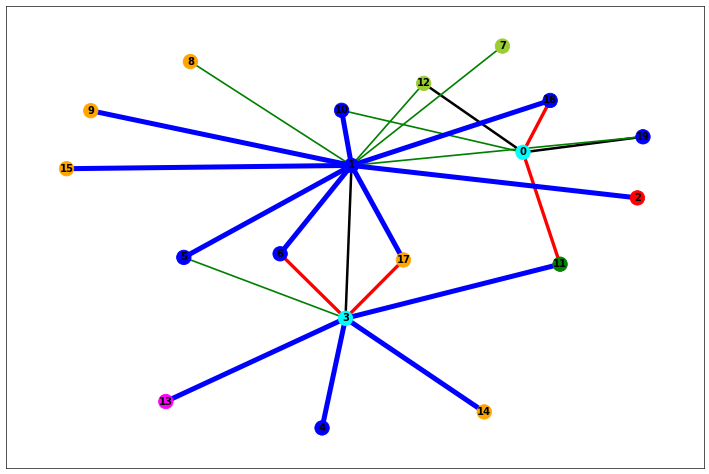

In [10]:
G = trainer[cls_idx].evaluate(threshold=0.5, show=True)

In [12]:
print(type(G))
print(G.adj)
print(G.nodes)
print(G.edges)

print('Nodes: ')
for v in list(G.nodes):
    print(G.nodes[v])

print('Edges: ')
for e in G.edges:
    print(G.edges[e])

<class 'networkx.classes.graph.Graph'>
{0: {10: {'label': 1}, 11: {'label': 2}, 12: {'label': 0}, 16: {'label': 2}, 19: {'label': 0}}, 10: {0: {'label': 1}, 1: {'label': 3}}, 11: {0: {'label': 2}, 3: {'label': 3}}, 12: {0: {'label': 0}, 1: {'label': 1}}, 16: {0: {'label': 2}, 1: {'label': 3}}, 19: {0: {'label': 0}, 1: {'label': 1}}, 1: {2: {'label': 3}, 3: {'label': 0}, 5: {'label': 3}, 6: {'label': 3}, 7: {'label': 1}, 8: {'label': 1}, 9: {'label': 3}, 10: {'label': 3}, 12: {'label': 1}, 15: {'label': 3}, 16: {'label': 3}, 17: {'label': 3}, 19: {'label': 1}}, 2: {1: {'label': 3}}, 3: {1: {'label': 0}, 4: {'label': 3}, 5: {'label': 1}, 6: {'label': 2}, 11: {'label': 3}, 13: {'label': 3}, 14: {'label': 3}, 17: {'label': 2}}, 5: {1: {'label': 3}, 3: {'label': 1}}, 6: {1: {'label': 3}, 3: {'label': 2}}, 7: {1: {'label': 1}}, 8: {1: {'label': 1}}, 9: {1: {'label': 3}}, 15: {1: {'label': 3}}, 17: {1: {'label': 3}, 3: {'label': 2}}, 4: {3: {'label': 3}}, 13: {3: {'label': 3}}, 14: {3: {'labe

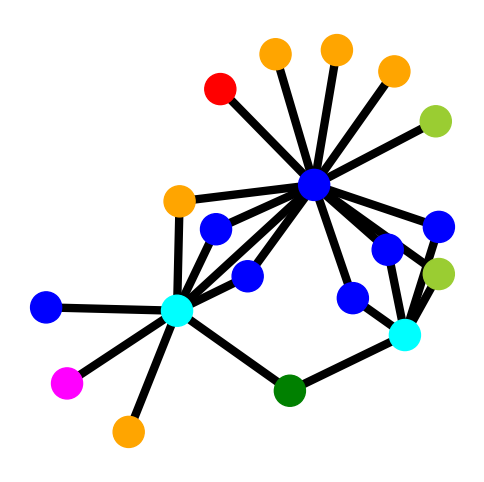

In [13]:
trainer[cls_idx].dataset.draw(G, ax=None)

# Non-Mutagen Class (Class 0)

In [14]:

cls_idx = 0
trainer[cls_idx] = Trainer(
    sampler=(s := GraphSampler(
        max_nodes=20,
        num_node_cls=len(dataset.NODE_CLS),
        num_edge_cls=len(dataset.EDGE_CLS),
        seed=global_seed,
        temperature=0.15,
        learn_node_feat=True,
        learn_edge_feat=True,
    )),
    discriminator=model,
    criterion=WeightedCriterion([
        dict(key="logits", criterion=ClassScoreCriterion(class_idx=cls_idx, mode='maximize'), weight=5),
        dict(key="embeds", criterion=EmbeddingCriterion(target_embedding=mean_embeds[cls_idx]), weight=10),
        dict(key="logits", criterion=MeanPenalty(), weight=0),
        dict(key="omega", criterion=NormPenalty(order=1), weight=4),
        dict(key="omega", criterion=NormPenalty(order=2), weight=4),
#         dict(key="xi", criterion=NormPenalty(order=1), weight=0),
#         dict(key="xi", criterion=NormPenalty(order=2), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=1), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=2), weight=0),
        dict(key="theta_pairs", criterion=KLDivergencePenalty(binary=True), weight=5),
    ]),
    optimizer=(o := torch.optim.SGD(s.parameters(), lr=1)),
    scheduler=torch.optim.lr_scheduler.ExponentialLR(o, gamma=1),
    dataset=dataset,
    budget_penalty=BudgetPenalty(budget=30, order=1, beta=1),
    seed=global_seed,
    target_probs={cls_idx: (0.9, 1)},
    k_samples=16
)


In [15]:
trainer[cls_idx].train(1000)

  0%|          | 1/1000 [00:02<39:26,  2.37s/it, size=101, bpw=0.95, nonmutagen=-6.62, mutagen=6.6]

iteration=0, loss=3746.01, size=100.8492431640625, scores={'nonmutagen': -6.619325637817383, 'mutagen': 6.599116802215576}


  0%|          | 2/1000 [00:03<31:25,  1.89s/it, size=83.4, bpw=0.902, nonmutagen=-6.43, mutagen=6.41]

iteration=1, loss=36754.73, size=83.36444854736328, scores={'nonmutagen': -6.433554649353027, 'mutagen': 6.413870334625244}


  0%|          | 3/1000 [00:05<27:53,  1.68s/it, size=89.9, bpw=0.857, nonmutagen=-8.43, mutagen=8.4] 

iteration=2, loss=35320.11, size=89.94706726074219, scores={'nonmutagen': -8.425357818603516, 'mutagen': 8.400047302246094}


  0%|          | 4/1000 [00:06<25:22,  1.53s/it, size=79.2, bpw=0.815, nonmutagen=-4.79, mutagen=4.78]

iteration=3, loss=33037.68, size=79.21403503417969, scores={'nonmutagen': -4.791051864624023, 'mutagen': 4.776008129119873}


  0%|          | 5/1000 [00:07<24:00,  1.45s/it, size=90.1, bpw=0.774, nonmutagen=-5.54, mutagen=5.52]

iteration=4, loss=31630.04, size=90.05481719970703, scores={'nonmutagen': -5.5385332107543945, 'mutagen': 5.5213775634765625}


  1%|          | 6/1000 [00:09<26:12,  1.58s/it, size=80.3, bpw=0.735, nonmutagen=-4.99, mutagen=4.98]

iteration=5, loss=29519.06, size=80.33206939697266, scores={'nonmutagen': -4.99251651763916, 'mutagen': 4.976903438568115}


  1%|          | 7/1000 [00:11<24:33,  1.48s/it, size=78.3, bpw=0.698, nonmutagen=-9.19, mutagen=9.17]

iteration=6, loss=31545.57, size=78.2836685180664, scores={'nonmutagen': -9.194729804992676, 'mutagen': 9.167245864868164}


  1%|          | 8/1000 [00:12<23:36,  1.43s/it, size=75, bpw=0.663, nonmutagen=-11.6, mutagen=11.5]  

iteration=7, loss=28755.65, size=74.9803695678711, scores={'nonmutagen': -11.561907768249512, 'mutagen': 11.527734756469727}


  1%|          | 9/1000 [00:13<23:14,  1.41s/it, size=75, bpw=0.63, nonmutagen=-11.5, mutagen=11.4] 

iteration=8, loss=29393.89, size=75.031494140625, scores={'nonmutagen': -11.464916229248047, 'mutagen': 11.431018829345703}


  1%|          | 10/1000 [00:15<23:06,  1.40s/it, size=81.9, bpw=0.599, nonmutagen=-16.5, mutagen=16.4]

iteration=9, loss=27854.63, size=81.9007797241211, scores={'nonmutagen': -16.463817596435547, 'mutagen': 16.41579818725586}


  1%|          | 11/1000 [00:16<22:36,  1.37s/it, size=86.4, bpw=0.569, nonmutagen=-17.7, mutagen=17.7]

iteration=10, loss=26895.29, size=86.36306762695312, scores={'nonmutagen': -17.704853057861328, 'mutagen': 17.65332794189453}


  1%|          | 12/1000 [00:17<22:13,  1.35s/it, size=82.4, bpw=0.54, nonmutagen=-15, mutagen=15]     

iteration=11, loss=24093.72, size=82.43902587890625, scores={'nonmutagen': -15.017460823059082, 'mutagen': 14.973527908325195}


  1%|▏         | 13/1000 [00:19<22:27,  1.37s/it, size=86.2, bpw=0.513, nonmutagen=-15.4, mutagen=15.4]

iteration=12, loss=22914.34, size=86.24365997314453, scores={'nonmutagen': -15.436270713806152, 'mutagen': 15.391153335571289}


  1%|▏         | 14/1000 [00:20<22:03,  1.34s/it, size=91.9, bpw=0.488, nonmutagen=-15.9, mutagen=15.9]

iteration=13, loss=22076.15, size=91.88726806640625, scores={'nonmutagen': -15.905135154724121, 'mutagen': 15.858692169189453}


  2%|▏         | 15/1000 [00:21<22:08,  1.35s/it, size=86.1, bpw=0.463, nonmutagen=-15.3, mutagen=15.2]

iteration=14, loss=21659.74, size=86.11937713623047, scores={'nonmutagen': -15.278820991516113, 'mutagen': 15.234148025512695}


  2%|▏         | 16/1000 [00:23<21:51,  1.33s/it, size=87.5, bpw=0.44, nonmutagen=-14.2, mutagen=14.1] 

iteration=15, loss=21699.74, size=87.47906494140625, scores={'nonmutagen': -14.179730415344238, 'mutagen': 14.138164520263672}


  2%|▏         | 17/1000 [00:24<21:40,  1.32s/it, size=90.2, bpw=0.418, nonmutagen=-16.3, mutagen=16.3]

iteration=16, loss=21133.06, size=90.24161529541016, scores={'nonmutagen': -16.31316566467285, 'mutagen': 16.26557159423828}


  2%|▏         | 18/1000 [00:25<22:00,  1.35s/it, size=87.8, bpw=0.397, nonmutagen=-13.4, mutagen=13.4]

iteration=17, loss=22570.93, size=87.76153564453125, scores={'nonmutagen': -13.437034606933594, 'mutagen': 13.397565841674805}


  2%|▏         | 19/1000 [00:27<21:43,  1.33s/it, size=94, bpw=0.377, nonmutagen=-14.3, mutagen=14.3]  

iteration=18, loss=22806.20, size=93.99284362792969, scores={'nonmutagen': -14.317782402038574, 'mutagen': 14.275825500488281}


  2%|▏         | 20/1000 [00:28<22:26,  1.37s/it, size=93.3, bpw=0.358, nonmutagen=-6.37, mutagen=6.35]

iteration=19, loss=21380.31, size=93.32109069824219, scores={'nonmutagen': -6.369056701660156, 'mutagen': 6.349554538726807}


  2%|▏         | 21/1000 [00:30<23:21,  1.43s/it, size=96.9, bpw=0.341, nonmutagen=-8.72, mutagen=8.69]

iteration=20, loss=20824.69, size=96.92487335205078, scores={'nonmutagen': -8.718084335327148, 'mutagen': 8.691946029663086}


  2%|▏         | 22/1000 [00:31<22:36,  1.39s/it, size=97.6, bpw=0.324, nonmutagen=-7.17, mutagen=7.15]

iteration=21, loss=20568.57, size=97.55732727050781, scores={'nonmutagen': -7.172083854675293, 'mutagen': 7.150312900543213}


  2%|▏         | 23/1000 [00:32<22:43,  1.40s/it, size=96.8, bpw=0.307, nonmutagen=-8.39, mutagen=8.37]

iteration=22, loss=18965.02, size=96.80783081054688, scores={'nonmutagen': -8.392189025878906, 'mutagen': 8.366971969604492}


  2%|▏         | 24/1000 [00:34<22:26,  1.38s/it, size=101, bpw=0.292, nonmutagen=-6.99, mutagen=6.97] 

iteration=23, loss=16884.62, size=100.74850463867188, scores={'nonmutagen': -6.989655494689941, 'mutagen': 6.968400478363037}


  2%|▎         | 25/1000 [00:35<22:02,  1.36s/it, size=99.6, bpw=0.277, nonmutagen=-9.44, mutagen=9.41]

iteration=24, loss=16461.05, size=99.6263656616211, scores={'nonmutagen': -9.443025588989258, 'mutagen': 9.414838790893555}


  3%|▎         | 26/1000 [00:36<21:47,  1.34s/it, size=95.8, bpw=0.264, nonmutagen=-8.74, mutagen=8.71]

iteration=25, loss=16053.47, size=95.8312759399414, scores={'nonmutagen': -8.740246772766113, 'mutagen': 8.714046478271484}


  3%|▎         | 27/1000 [00:38<22:05,  1.36s/it, size=101, bpw=0.25, nonmutagen=-10.1, mutagen=10]    

iteration=26, loss=15399.33, size=100.90359497070312, scores={'nonmutagen': -10.059599876403809, 'mutagen': 10.029672622680664}


  3%|▎         | 28/1000 [00:39<22:02,  1.36s/it, size=105, bpw=0.238, nonmutagen=-9.08, mutagen=9.05]

iteration=27, loss=14239.77, size=104.83592224121094, scores={'nonmutagen': -9.08051586151123, 'mutagen': 9.053354263305664}


  3%|▎         | 29/1000 [00:40<21:54,  1.35s/it, size=105, bpw=0.226, nonmutagen=-7.76, mutagen=7.73]

iteration=28, loss=14321.60, size=104.50447082519531, scores={'nonmutagen': -7.75808048248291, 'mutagen': 7.734654903411865}


  3%|▎         | 30/1000 [00:42<21:50,  1.35s/it, size=107, bpw=0.215, nonmutagen=-7.5, mutagen=7.48] 

iteration=29, loss=14739.35, size=107.02378845214844, scores={'nonmutagen': -7.504486083984375, 'mutagen': 7.481776714324951}


  3%|▎         | 31/1000 [00:43<21:35,  1.34s/it, size=101, bpw=0.204, nonmutagen=-7.13, mutagen=7.1]

iteration=30, loss=14924.43, size=101.49645233154297, scores={'nonmutagen': -7.1257219314575195, 'mutagen': 7.1040825843811035}


  3%|▎         | 32/1000 [00:45<23:19,  1.45s/it, size=97.6, bpw=0.194, nonmutagen=-7.47, mutagen=7.45]

iteration=31, loss=15097.08, size=97.63385009765625, scores={'nonmutagen': -7.472078323364258, 'mutagen': 7.449460506439209}


  3%|▎         | 33/1000 [00:46<23:40,  1.47s/it, size=95.9, bpw=0.184, nonmutagen=-10.4, mutagen=10.3]

iteration=32, loss=14999.88, size=95.86903381347656, scores={'nonmutagen': -10.361980438232422, 'mutagen': 10.331197738647461}


  3%|▎         | 34/1000 [00:48<23:06,  1.44s/it, size=97.7, bpw=0.175, nonmutagen=-9.91, mutagen=9.89]

iteration=33, loss=15245.39, size=97.7191390991211, scores={'nonmutagen': -9.914772033691406, 'mutagen': 9.88525390625}


  4%|▎         | 35/1000 [00:49<22:36,  1.41s/it, size=102, bpw=0.166, nonmutagen=-8.66, mutagen=8.63] 

iteration=34, loss=14475.78, size=102.14176177978516, scores={'nonmutagen': -8.655104637145996, 'mutagen': 8.629144668579102}


  4%|▎         | 36/1000 [00:50<23:18,  1.45s/it, size=96.9, bpw=0.158, nonmutagen=-7.69, mutagen=7.67]

iteration=35, loss=15149.54, size=96.8786849975586, scores={'nonmutagen': -7.693183898925781, 'mutagen': 7.669941425323486}


  4%|▎         | 37/1000 [00:52<23:01,  1.43s/it, size=102, bpw=0.15, nonmutagen=-8.43, mutagen=8.4]   

iteration=36, loss=16958.10, size=101.86177825927734, scores={'nonmutagen': -8.425350189208984, 'mutagen': 8.400039672851562}


  4%|▍         | 38/1000 [00:53<22:16,  1.39s/it, size=98, bpw=0.142, nonmutagen=-6.74, mutagen=6.72]

iteration=37, loss=16324.28, size=97.96664428710938, scores={'nonmutagen': -6.738898277282715, 'mutagen': 6.7183518409729}


  4%|▍         | 39/1000 [00:54<21:47,  1.36s/it, size=104, bpw=0.135, nonmutagen=-9.15, mutagen=9.12]

iteration=38, loss=16876.11, size=104.241943359375, scores={'nonmutagen': -9.150285720825195, 'mutagen': 9.122926712036133}


  4%|▍         | 40/1000 [00:56<21:50,  1.36s/it, size=104, bpw=0.129, nonmutagen=-8.64, mutagen=8.62]

iteration=39, loss=16069.14, size=103.5828857421875, scores={'nonmutagen': -8.643415451049805, 'mutagen': 8.617488861083984}


  4%|▍         | 41/1000 [00:57<21:29,  1.35s/it, size=96, bpw=0.122, nonmutagen=-4.77, mutagen=4.76] 

iteration=40, loss=15972.96, size=96.00475311279297, scores={'nonmutagen': -4.770784378051758, 'mutagen': 4.75579833984375}


  4%|▍         | 42/1000 [00:58<21:16,  1.33s/it, size=101, bpw=0.116, nonmutagen=-4.61, mutagen=4.6]

iteration=41, loss=15997.72, size=101.0675277709961, scores={'nonmutagen': -4.6130571365356445, 'mutagen': 4.59851598739624}


  4%|▍         | 43/1000 [01:00<22:02,  1.38s/it, size=98.6, bpw=0.11, nonmutagen=-4.79, mutagen=4.78]

iteration=42, loss=16343.47, size=98.58514404296875, scores={'nonmutagen': -4.794599533081055, 'mutagen': 4.779545783996582}


  4%|▍         | 44/1000 [01:01<21:39,  1.36s/it, size=103, bpw=0.105, nonmutagen=-4.45, mutagen=4.44]

iteration=43, loss=15639.08, size=102.845947265625, scores={'nonmutagen': -4.451565742492676, 'mutagen': 4.43748140335083}


  4%|▍         | 45/1000 [01:03<21:39,  1.36s/it, size=100, bpw=0.0994, nonmutagen=-4.35, mutagen=4.34]

iteration=44, loss=15295.65, size=100.04410552978516, scores={'nonmutagen': -4.3490800857543945, 'mutagen': 4.33528470993042}


  5%|▍         | 46/1000 [01:04<21:18,  1.34s/it, size=101, bpw=0.0945, nonmutagen=-4.17, mutagen=4.16]

iteration=45, loss=15166.91, size=100.63211822509766, scores={'nonmutagen': -4.170345306396484, 'mutagen': 4.157054901123047}


  5%|▍         | 47/1000 [01:05<21:59,  1.39s/it, size=98.4, bpw=0.0897, nonmutagen=-4.74, mutagen=4.72]

iteration=46, loss=15176.11, size=98.42236328125, scores={'nonmutagen': -4.73577880859375, 'mutagen': 4.720891952514648}


  5%|▍         | 48/1000 [01:07<22:05,  1.39s/it, size=100, bpw=0.0853, nonmutagen=-4.26, mutagen=4.25] 

iteration=47, loss=15818.36, size=100.47508239746094, scores={'nonmutagen': -4.2606353759765625, 'mutagen': 4.247089862823486}


  5%|▍         | 49/1000 [01:08<22:49,  1.44s/it, size=95.7, bpw=0.081, nonmutagen=-4.35, mutagen=4.34]

iteration=48, loss=16871.65, size=95.73983001708984, scores={'nonmutagen': -4.352178573608398, 'mutagen': 4.338374614715576}


  5%|▌         | 50/1000 [01:10<22:10,  1.40s/it, size=102, bpw=0.0769, nonmutagen=-4.55, mutagen=4.54]

iteration=49, loss=16227.63, size=101.99729919433594, scores={'nonmutagen': -4.5495195388793945, 'mutagen': 4.535158634185791}


  5%|▌         | 51/1000 [01:11<21:49,  1.38s/it, size=108, bpw=0.0731, nonmutagen=-4.62, mutagen=4.6] 

iteration=50, loss=16027.54, size=108.01081848144531, scores={'nonmutagen': -4.618661880493164, 'mutagen': 4.604104995727539}


  5%|▌         | 52/1000 [01:12<21:26,  1.36s/it, size=102, bpw=0.0694, nonmutagen=-4.44, mutagen=4.43]

iteration=51, loss=16342.19, size=101.94828796386719, scores={'nonmutagen': -4.444472312927246, 'mutagen': 4.430408000946045}


  5%|▌         | 53/1000 [01:14<21:17,  1.35s/it, size=97.3, bpw=0.066, nonmutagen=-4.24, mutagen=4.22]

iteration=52, loss=15965.60, size=97.27388763427734, scores={'nonmutagen': -4.236147880554199, 'mutagen': 4.222671985626221}


  5%|▌         | 54/1000 [01:15<21:10,  1.34s/it, size=97, bpw=0.0627, nonmutagen=-4.59, mutagen=4.58] 

iteration=53, loss=15594.26, size=97.01931762695312, scores={'nonmutagen': -4.5906476974487305, 'mutagen': 4.576169967651367}


  6%|▌         | 55/1000 [01:16<20:55,  1.33s/it, size=97.2, bpw=0.0595, nonmutagen=-4.58, mutagen=4.57]

iteration=54, loss=15069.81, size=97.20799255371094, scores={'nonmutagen': -4.5797119140625, 'mutagen': 4.565265655517578}


  6%|▌         | 56/1000 [01:18<21:17,  1.35s/it, size=98.4, bpw=0.0566, nonmutagen=-4.49, mutagen=4.48]

iteration=55, loss=15787.02, size=98.39498138427734, scores={'nonmutagen': -4.489496231079102, 'mutagen': 4.475304126739502}


  6%|▌         | 57/1000 [01:19<21:25,  1.36s/it, size=94.4, bpw=0.0537, nonmutagen=-5.1, mutagen=5.08] 

iteration=56, loss=15922.94, size=94.43475341796875, scores={'nonmutagen': -5.097552299499512, 'mutagen': 5.081643104553223}


  6%|▌         | 58/1000 [01:21<23:15,  1.48s/it, size=102, bpw=0.051, nonmutagen=-4.42, mutagen=4.41] 

iteration=57, loss=15846.17, size=102.09009552001953, scores={'nonmutagen': -4.420978546142578, 'mutagen': 4.406980514526367}


  6%|▌         | 59/1000 [01:22<22:25,  1.43s/it, size=102, bpw=0.0485, nonmutagen=-4.51, mutagen=4.5]

iteration=58, loss=15321.72, size=102.20793914794922, scores={'nonmutagen': -4.513574600219727, 'mutagen': 4.499314785003662}


  6%|▌         | 60/1000 [01:23<21:54,  1.40s/it, size=99.8, bpw=0.0461, nonmutagen=-4.55, mutagen=4.53]

iteration=59, loss=15146.17, size=99.84654235839844, scores={'nonmutagen': -4.548351287841797, 'mutagen': 4.533993244171143}


  6%|▌         | 61/1000 [01:25<21:29,  1.37s/it, size=99.8, bpw=0.0438, nonmutagen=-4.33, mutagen=4.32]

iteration=60, loss=14522.61, size=99.8223648071289, scores={'nonmutagen': -4.3288984298706055, 'mutagen': 4.315160274505615}


  6%|▌         | 62/1000 [01:26<21:06,  1.35s/it, size=96.9, bpw=0.0416, nonmutagen=-4.34, mutagen=4.33]

iteration=61, loss=14913.31, size=96.92698669433594, scores={'nonmutagen': -4.3412933349609375, 'mutagen': 4.327520847320557}


  6%|▋         | 63/1000 [01:28<21:54,  1.40s/it, size=102, bpw=0.0395, nonmutagen=-4.52, mutagen=4.51] 

iteration=62, loss=15568.83, size=101.98433685302734, scores={'nonmutagen': -4.5218305587768555, 'mutagen': 4.507547378540039}


  6%|▋         | 64/1000 [01:29<21:18,  1.37s/it, size=102, bpw=0.0375, nonmutagen=-4.49, mutagen=4.47]

iteration=63, loss=16071.50, size=101.97737121582031, scores={'nonmutagen': -4.48770809173584, 'mutagen': 4.473522186279297}


  6%|▋         | 65/1000 [01:30<20:56,  1.34s/it, size=104, bpw=0.0356, nonmutagen=-4.08, mutagen=4.07]

iteration=64, loss=16820.74, size=104.46211242675781, scores={'nonmutagen': -4.083622932434082, 'mutagen': 4.070578098297119}


  7%|▋         | 66/1000 [01:32<21:05,  1.35s/it, size=96, bpw=0.0339, nonmutagen=-3.67, mutagen=3.65] 

iteration=65, loss=18712.08, size=95.95927429199219, scores={'nonmutagen': -3.6666367053985596, 'mutagen': 3.6547698974609375}


  7%|▋         | 67/1000 [01:33<20:43,  1.33s/it, size=104, bpw=0.0322, nonmutagen=-4.03, mutagen=4.01]

iteration=66, loss=18364.92, size=104.1348648071289, scores={'nonmutagen': -4.026333808898926, 'mutagen': 4.013451099395752}


  7%|▋         | 68/1000 [01:34<20:39,  1.33s/it, size=100, bpw=0.0306, nonmutagen=-4.47, mutagen=4.45]

iteration=67, loss=17267.79, size=100.0369873046875, scores={'nonmutagen': -4.466385841369629, 'mutagen': 4.452259540557861}


  7%|▋         | 69/1000 [01:36<21:03,  1.36s/it, size=95, bpw=0.029, nonmutagen=-4.19, mutagen=4.17]  

iteration=68, loss=16304.37, size=94.96632385253906, scores={'nonmutagen': -4.187526702880859, 'mutagen': 4.174188613891602}


  7%|▋         | 70/1000 [01:37<20:42,  1.34s/it, size=98.8, bpw=0.0276, nonmutagen=-4.55, mutagen=4.54]

iteration=69, loss=15947.48, size=98.78677368164062, scores={'nonmutagen': -4.553467750549316, 'mutagen': 4.539095401763916}


  7%|▋         | 71/1000 [01:38<20:54,  1.35s/it, size=96.8, bpw=0.0262, nonmutagen=-4.24, mutagen=4.23]

iteration=70, loss=15830.53, size=96.81953430175781, scores={'nonmutagen': -4.244050025939941, 'mutagen': 4.2305521965026855}


  7%|▋         | 72/1000 [01:40<20:38,  1.33s/it, size=102, bpw=0.0249, nonmutagen=-4.46, mutagen=4.45] 

iteration=71, loss=15423.26, size=101.75691223144531, scores={'nonmutagen': -4.464479446411133, 'mutagen': 4.4503583908081055}


  7%|▋         | 73/1000 [01:41<20:25,  1.32s/it, size=101, bpw=0.0236, nonmutagen=-4.36, mutagen=4.34]

iteration=72, loss=15344.86, size=101.12555694580078, scores={'nonmutagen': -4.357447624206543, 'mutagen': 4.343628883361816}


  7%|▋         | 74/1000 [01:42<21:04,  1.37s/it, size=99, bpw=0.0225, nonmutagen=-3.94, mutagen=3.93] 

iteration=73, loss=15257.72, size=98.96803283691406, scores={'nonmutagen': -3.9445645809173584, 'mutagen': 3.931912422180176}


  8%|▊         | 75/1000 [01:44<21:06,  1.37s/it, size=97.4, bpw=0.0213, nonmutagen=-4.18, mutagen=4.17]

iteration=74, loss=14599.16, size=97.36377716064453, scores={'nonmutagen': -4.183650016784668, 'mutagen': 4.170322418212891}


  8%|▊         | 76/1000 [01:45<21:23,  1.39s/it, size=99.2, bpw=0.0203, nonmutagen=-4.46, mutagen=4.45]

iteration=75, loss=14176.38, size=99.21725463867188, scores={'nonmutagen': -4.460838317871094, 'mutagen': 4.446727752685547}


  8%|▊         | 77/1000 [01:46<21:19,  1.39s/it, size=101, bpw=0.0193, nonmutagen=-4.27, mutagen=4.26] 

iteration=76, loss=14630.72, size=100.77243041992188, scores={'nonmutagen': -4.2723798751831055, 'mutagen': 4.2588019371032715}


  8%|▊         | 78/1000 [01:48<20:52,  1.36s/it, size=98, bpw=0.0183, nonmutagen=-4.8, mutagen=4.78]  

iteration=77, loss=14624.35, size=97.98217010498047, scores={'nonmutagen': -4.797040939331055, 'mutagen': 4.781980991363525}


  8%|▊         | 79/1000 [01:49<20:49,  1.36s/it, size=98.8, bpw=0.0174, nonmutagen=-4.04, mutagen=4.03]

iteration=78, loss=15068.98, size=98.81307983398438, scores={'nonmutagen': -4.04157829284668, 'mutagen': 4.028652191162109}


  8%|▊         | 80/1000 [01:51<21:05,  1.38s/it, size=99.2, bpw=0.0165, nonmutagen=-4.05, mutagen=4.03]

iteration=79, loss=15747.44, size=99.24368286132812, scores={'nonmutagen': -4.047330856323242, 'mutagen': 4.034388542175293}


  8%|▊         | 81/1000 [01:52<21:16,  1.39s/it, size=96.2, bpw=0.0157, nonmutagen=-4.13, mutagen=4.12]

iteration=80, loss=16070.88, size=96.20375061035156, scores={'nonmutagen': -4.1288347244262695, 'mutagen': 4.115662097930908}


  8%|▊         | 82/1000 [01:53<21:16,  1.39s/it, size=99.9, bpw=0.0149, nonmutagen=-4.23, mutagen=4.21]

iteration=81, loss=16592.46, size=99.910888671875, scores={'nonmutagen': -4.226498603820801, 'mutagen': 4.213050365447998}


  8%|▊         | 83/1000 [01:55<22:07,  1.45s/it, size=102, bpw=0.0142, nonmutagen=-4.75, mutagen=4.74] 

iteration=82, loss=17654.98, size=101.98701477050781, scores={'nonmutagen': -4.753344535827637, 'mutagen': 4.738407135009766}


  8%|▊         | 84/1000 [01:56<21:42,  1.42s/it, size=102, bpw=0.0135, nonmutagen=-4.28, mutagen=4.27]

iteration=83, loss=18753.03, size=101.587158203125, scores={'nonmutagen': -4.279699325561523, 'mutagen': 4.2661004066467285}


  8%|▊         | 85/1000 [01:58<21:57,  1.44s/it, size=103, bpw=0.0128, nonmutagen=-3.39, mutagen=3.38]

iteration=84, loss=18823.88, size=103.36134338378906, scores={'nonmutagen': -3.3916404247283936, 'mutagen': 3.380549907684326}


  9%|▊         | 86/1000 [01:59<21:17,  1.40s/it, size=98, bpw=0.0121, nonmutagen=-4.35, mutagen=4.34] 

iteration=85, loss=17728.24, size=98.0300064086914, scores={'nonmutagen': -4.349276542663574, 'mutagen': 4.3354811668396}


  9%|▊         | 87/1000 [02:00<20:54,  1.37s/it, size=101, bpw=0.0115, nonmutagen=-4.4, mutagen=4.39]

iteration=86, loss=17066.98, size=100.79466247558594, scores={'nonmutagen': -4.402870178222656, 'mutagen': 4.388923168182373}


  9%|▉         | 88/1000 [02:02<20:56,  1.38s/it, size=96.3, bpw=0.011, nonmutagen=-4.39, mutagen=4.38]

iteration=87, loss=16256.24, size=96.3033676147461, scores={'nonmutagen': -4.388947486877441, 'mutagen': 4.375040054321289}


  9%|▉         | 89/1000 [02:03<20:50,  1.37s/it, size=104, bpw=0.0104, nonmutagen=-4.72, mutagen=4.7] 

iteration=88, loss=16077.87, size=104.08242797851562, scores={'nonmutagen': -4.7181243896484375, 'mutagen': 4.703286647796631}


  9%|▉         | 90/1000 [02:04<20:28,  1.35s/it, size=97.9, bpw=0.00989, nonmutagen=-4.34, mutagen=4.33]

iteration=89, loss=15756.61, size=97.88111877441406, scores={'nonmutagen': -4.344371795654297, 'mutagen': 4.33059024810791}


  9%|▉         | 91/1000 [02:06<20:10,  1.33s/it, size=102, bpw=0.00939, nonmutagen=-4.53, mutagen=4.52] 

iteration=90, loss=15300.25, size=101.77996826171875, scores={'nonmutagen': -4.530901908874512, 'mutagen': 4.5165934562683105}


  9%|▉         | 92/1000 [02:07<19:57,  1.32s/it, size=98.8, bpw=0.00892, nonmutagen=-4.41, mutagen=4.39]

iteration=91, loss=14240.58, size=98.83599090576172, scores={'nonmutagen': -4.406055450439453, 'mutagen': 4.392098903656006}


  9%|▉         | 93/1000 [02:08<19:45,  1.31s/it, size=103, bpw=0.00848, nonmutagen=-3.92, mutagen=3.91] 

iteration=92, loss=13901.16, size=103.18164825439453, scores={'nonmutagen': -3.9246938228607178, 'mutagen': 3.912097930908203}


  9%|▉         | 94/1000 [02:10<19:45,  1.31s/it, size=98.1, bpw=0.00805, nonmutagen=-4.39, mutagen=4.38]

iteration=93, loss=13966.53, size=98.06385803222656, scores={'nonmutagen': -4.391361236572266, 'mutagen': 4.37744665145874}


 10%|▉         | 95/1000 [02:11<21:08,  1.40s/it, size=102, bpw=0.00765, nonmutagen=-4.51, mutagen=4.5]  

iteration=94, loss=13259.51, size=102.08251953125, scores={'nonmutagen': -4.513833045959473, 'mutagen': 4.499572277069092}


 10%|▉         | 96/1000 [02:13<21:22,  1.42s/it, size=99.2, bpw=0.00727, nonmutagen=-4.26, mutagen=4.25]

iteration=95, loss=13642.55, size=99.15866088867188, scores={'nonmutagen': -4.25897216796875, 'mutagen': 4.245431900024414}


 10%|▉         | 97/1000 [02:14<21:08,  1.41s/it, size=102, bpw=0.00691, nonmutagen=-4.47, mutagen=4.46] 

iteration=96, loss=13682.52, size=102.39442443847656, scores={'nonmutagen': -4.474580764770508, 'mutagen': 4.4604315757751465}


 10%|▉         | 98/1000 [02:15<20:39,  1.37s/it, size=103, bpw=0.00656, nonmutagen=-4.5, mutagen=4.49] 

iteration=97, loss=13916.90, size=102.5457992553711, scores={'nonmutagen': -4.504900932312012, 'mutagen': 4.490665435791016}


 10%|▉         | 99/1000 [02:17<20:53,  1.39s/it, size=102, bpw=0.00623, nonmutagen=-3.66, mutagen=3.65]

iteration=98, loss=14396.36, size=101.80134582519531, scores={'nonmutagen': -3.662156343460083, 'mutagen': 3.650301933288574}


 10%|█         | 100/1000 [02:18<20:44,  1.38s/it, size=102, bpw=0.00592, nonmutagen=-4.44, mutagen=4.43]

iteration=99, loss=15655.67, size=102.25497436523438, scores={'nonmutagen': -4.442676544189453, 'mutagen': 4.428617000579834}


 10%|█         | 101/1000 [02:20<22:33,  1.51s/it, size=102, bpw=0.00562, nonmutagen=-4.89, mutagen=4.88]

iteration=100, loss=16544.12, size=101.75355529785156, scores={'nonmutagen': -4.8934431076049805, 'mutagen': 4.878109931945801}


 10%|█         | 102/1000 [02:21<22:12,  1.48s/it, size=96.9, bpw=0.00534, nonmutagen=-4.06, mutagen=4.05]

iteration=101, loss=16537.79, size=96.93025970458984, scores={'nonmutagen': -4.0623016357421875, 'mutagen': 4.049316883087158}


 10%|█         | 103/1000 [02:23<22:26,  1.50s/it, size=99.1, bpw=0.00508, nonmutagen=-4.54, mutagen=4.53]

iteration=102, loss=16428.89, size=99.05248260498047, scores={'nonmutagen': -4.5412797927856445, 'mutagen': 4.526942253112793}


 10%|█         | 104/1000 [02:24<22:38,  1.52s/it, size=98.4, bpw=0.00482, nonmutagen=-4.49, mutagen=4.48]

iteration=103, loss=15977.87, size=98.36112213134766, scores={'nonmutagen': -4.490208625793457, 'mutagen': 4.476014614105225}


 10%|█         | 105/1000 [02:26<22:35,  1.51s/it, size=101, bpw=0.00458, nonmutagen=-4.69, mutagen=4.68] 

iteration=104, loss=15482.65, size=101.13758850097656, scores={'nonmutagen': -4.693681716918945, 'mutagen': 4.678913593292236}


 11%|█         | 106/1000 [02:27<22:19,  1.50s/it, size=102, bpw=0.00435, nonmutagen=-3.3, mutagen=3.29] 

iteration=105, loss=15027.90, size=101.81047058105469, scores={'nonmutagen': -3.2998945713043213, 'mutagen': 3.2890634536743164}


 11%|█         | 107/1000 [02:29<21:20,  1.43s/it, size=106, bpw=0.00413, nonmutagen=-3.46, mutagen=3.45]

iteration=106, loss=14227.40, size=105.54708099365234, scores={'nonmutagen': -3.462223768234253, 'mutagen': 3.450934410095215}


 11%|█         | 108/1000 [02:30<20:49,  1.40s/it, size=100, bpw=0.00393, nonmutagen=-1.63, mutagen=1.6] 

iteration=107, loss=13193.79, size=100.48104095458984, scores={'nonmutagen': -1.6341273784637451, 'mutagen': 1.6038432121276855}


 11%|█         | 109/1000 [02:31<20:23,  1.37s/it, size=102, bpw=0.00373, nonmutagen=-3.29, mutagen=3.28]

iteration=108, loss=12957.55, size=101.79205322265625, scores={'nonmutagen': -3.292297601699829, 'mutagen': 3.2796545028686523}


 11%|█         | 110/1000 [02:33<20:03,  1.35s/it, size=96.8, bpw=0.00354, nonmutagen=-3.21, mutagen=3.2]

iteration=109, loss=12187.36, size=96.78287506103516, scores={'nonmutagen': -3.21368670463562, 'mutagen': 3.201658248901367}


 11%|█         | 111/1000 [02:34<19:57,  1.35s/it, size=95.8, bpw=0.00337, nonmutagen=-3.47, mutagen=3.46]

iteration=110, loss=12714.40, size=95.75236511230469, scores={'nonmutagen': -3.469769239425659, 'mutagen': 3.458458423614502}


 11%|█         | 112/1000 [02:35<19:58,  1.35s/it, size=94.7, bpw=0.0032, nonmutagen=-1.86, mutagen=1.85] 

iteration=111, loss=15158.18, size=94.66682434082031, scores={'nonmutagen': -1.8581066131591797, 'mutagen': 1.847808599472046}


 11%|█▏        | 113/1000 [02:37<20:18,  1.37s/it, size=98.5, bpw=0.00304, nonmutagen=-3.37, mutagen=3.36]

iteration=112, loss=16808.63, size=98.48501586914062, scores={'nonmutagen': -3.3675529956817627, 'mutagen': 3.3565306663513184}


 11%|█▏        | 114/1000 [02:38<20:01,  1.36s/it, size=92.9, bpw=0.00289, nonmutagen=-3.11, mutagen=3.1] 

iteration=113, loss=15662.09, size=92.9049072265625, scores={'nonmutagen': -3.1063249111175537, 'mutagen': 3.096041202545166}


 12%|█▏        | 115/1000 [02:40<20:15,  1.37s/it, size=102, bpw=0.00274, nonmutagen=-3.89, mutagen=3.88]

iteration=114, loss=14620.82, size=101.61742401123047, scores={'nonmutagen': -3.8915350437164307, 'mutagen': 3.879033088684082}


 12%|█▏        | 116/1000 [02:41<21:33,  1.46s/it, size=97.7, bpw=0.00261, nonmutagen=-2.58, mutagen=2.57]

iteration=115, loss=15125.61, size=97.7208023071289, scores={'nonmutagen': -2.583794355392456, 'mutagen': 2.5702109336853027}


 12%|█▏        | 117/1000 [02:43<20:55,  1.42s/it, size=104, bpw=0.00248, nonmutagen=-2.19, mutagen=2.18] 

iteration=116, loss=15701.67, size=104.38821411132812, scores={'nonmutagen': -2.1875340938568115, 'mutagen': 2.1798458099365234}


 12%|█▏        | 118/1000 [02:44<20:25,  1.39s/it, size=96, bpw=0.00235, nonmutagen=-3.1, mutagen=3.09]  

iteration=117, loss=16159.36, size=95.95048522949219, scores={'nonmutagen': -3.101097345352173, 'mutagen': 3.0867228507995605}


 12%|█▏        | 119/1000 [02:45<20:45,  1.41s/it, size=102, bpw=0.00223, nonmutagen=-3.65, mutagen=3.64]

iteration=118, loss=15863.02, size=101.76528930664062, scores={'nonmutagen': -3.6543400287628174, 'mutagen': 3.642507553100586}


 12%|█▏        | 120/1000 [02:47<20:12,  1.38s/it, size=96.4, bpw=0.00212, nonmutagen=-3.07, mutagen=3.06]

iteration=119, loss=16116.24, size=96.43682861328125, scores={'nonmutagen': -3.0711886882781982, 'mutagen': 3.056849479675293}


 12%|█▏        | 121/1000 [02:48<20:34,  1.40s/it, size=102, bpw=0.00202, nonmutagen=-3.52, mutagen=3.51] 

iteration=120, loss=16758.76, size=101.99343872070312, scores={'nonmutagen': -3.5204827785491943, 'mutagen': 3.509028434753418}


 12%|█▏        | 122/1000 [02:49<20:05,  1.37s/it, size=95.8, bpw=0.00192, nonmutagen=-2.84, mutagen=2.83]

iteration=121, loss=16111.18, size=95.79925537109375, scores={'nonmutagen': -2.844045877456665, 'mutagen': 2.8306922912597656}


 12%|█▏        | 123/1000 [02:51<19:56,  1.36s/it, size=101, bpw=0.00182, nonmutagen=-3.37, mutagen=3.36] 

iteration=122, loss=16113.63, size=100.79661560058594, scores={'nonmutagen': -3.371089220046997, 'mutagen': 3.3600573539733887}


 12%|█▏        | 124/1000 [02:52<19:39,  1.35s/it, size=97.5, bpw=0.00173, nonmutagen=-2.77, mutagen=2.76]

iteration=123, loss=16667.97, size=97.51370239257812, scores={'nonmutagen': -2.7675983905792236, 'mutagen': 2.757671356201172}


 12%|█▎        | 125/1000 [02:53<19:29,  1.34s/it, size=99.5, bpw=0.00164, nonmutagen=-3.44, mutagen=3.43]

iteration=124, loss=16124.31, size=99.46807098388672, scores={'nonmutagen': -3.4378163814544678, 'mutagen': 3.426595687866211}


 13%|█▎        | 126/1000 [02:55<19:37,  1.35s/it, size=92.1, bpw=0.00156, nonmutagen=-3, mutagen=2.99]   

iteration=125, loss=15241.22, size=92.11735534667969, scores={'nonmutagen': -2.999934434890747, 'mutagen': 2.9899511337280273}


 13%|█▎        | 127/1000 [02:56<19:35,  1.35s/it, size=102, bpw=0.00148, nonmutagen=-2.84, mutagen=2.83]

iteration=126, loss=14475.65, size=102.30241394042969, scores={'nonmutagen': -2.840379476547241, 'mutagen': 2.8308467864990234}


 13%|█▎        | 128/1000 [02:58<20:47,  1.43s/it, size=95.5, bpw=0.00141, nonmutagen=-3.16, mutagen=3.15]

iteration=127, loss=13814.43, size=95.45621490478516, scores={'nonmutagen': -3.1575443744659424, 'mutagen': 3.146622657775879}


 13%|█▎        | 129/1000 [02:59<20:07,  1.39s/it, size=98.5, bpw=0.00134, nonmutagen=-3.73, mutagen=3.72]

iteration=128, loss=12400.49, size=98.47118377685547, scores={'nonmutagen': -3.7276337146759033, 'mutagen': 3.7155942916870117}


 13%|█▎        | 130/1000 [03:00<19:50,  1.37s/it, size=102, bpw=0.00127, nonmutagen=-3.01, mutagen=3]    

iteration=129, loss=12526.34, size=101.52163696289062, scores={'nonmutagen': -3.007775068283081, 'mutagen': 2.997769355773926}


 13%|█▎        | 131/1000 [03:02<20:14,  1.40s/it, size=103, bpw=0.00121, nonmutagen=-3.1, mutagen=3.09]

iteration=130, loss=13935.60, size=102.7417221069336, scores={'nonmutagen': -3.1017801761627197, 'mutagen': 3.0892276763916016}


 13%|█▎        | 132/1000 [03:03<20:36,  1.42s/it, size=100, bpw=0.00115, nonmutagen=-2.75, mutagen=2.74]

iteration=131, loss=14716.47, size=100.30111694335938, scores={'nonmutagen': -2.7465598583221436, 'mutagen': 2.7372922897338867}


 13%|█▎        | 133/1000 [03:05<20:15,  1.40s/it, size=102, bpw=0.00109, nonmutagen=-3.28, mutagen=3.27]

iteration=132, loss=15257.58, size=101.51638793945312, scores={'nonmutagen': -3.2837202548980713, 'mutagen': 3.2706570625305176}


 13%|█▎        | 134/1000 [03:06<20:00,  1.39s/it, size=97.4, bpw=0.00104, nonmutagen=-2.97, mutagen=2.95]

iteration=133, loss=15212.36, size=97.41437530517578, scores={'nonmutagen': -2.966496229171753, 'mutagen': 2.952812671661377}


 14%|█▎        | 135/1000 [03:07<19:52,  1.38s/it, size=99.9, bpw=0.000983, nonmutagen=-3.07, mutagen=3.06]

iteration=134, loss=15537.36, size=99.88589477539062, scores={'nonmutagen': -3.068333864212036, 'mutagen': 3.05747127532959}


 14%|█▎        | 136/1000 [03:09<19:33,  1.36s/it, size=96.8, bpw=0.000934, nonmutagen=-2.93, mutagen=2.92]

iteration=135, loss=16604.00, size=96.81932830810547, scores={'nonmutagen': -2.93281626701355, 'mutagen': 2.923022747039795}


 14%|█▎        | 137/1000 [03:10<19:19,  1.34s/it, size=101, bpw=0.000887, nonmutagen=-3.62, mutagen=3.61] 

iteration=136, loss=17104.42, size=101.02875518798828, scores={'nonmutagen': -3.618520975112915, 'mutagen': 3.606790065765381}


 14%|█▍        | 138/1000 [03:11<19:49,  1.38s/it, size=98.2, bpw=0.000843, nonmutagen=-3.19, mutagen=3.18]

iteration=137, loss=16158.71, size=98.2159652709961, scores={'nonmutagen': -3.189826250076294, 'mutagen': 3.1777114868164062}


 14%|█▍        | 139/1000 [03:13<19:35,  1.37s/it, size=101, bpw=0.000801, nonmutagen=-2.25, mutagen=2.23] 

iteration=138, loss=16007.49, size=100.71829223632812, scores={'nonmutagen': -2.2465474605560303, 'mutagen': 2.2346253395080566}


 14%|█▍        | 140/1000 [03:14<19:18,  1.35s/it, size=101, bpw=0.000761, nonmutagen=-3.41, mutagen=3.4] 

iteration=139, loss=15312.29, size=100.97026824951172, scores={'nonmutagen': -3.4092857837677, 'mutagen': 3.396817684173584}


 14%|█▍        | 141/1000 [03:16<20:13,  1.41s/it, size=109, bpw=0.000723, nonmutagen=-2.22, mutagen=2.2]

iteration=140, loss=16671.78, size=108.99467468261719, scores={'nonmutagen': -2.2195680141448975, 'mutagen': 2.2047367095947266}


 14%|█▍        | 142/1000 [03:17<21:30,  1.50s/it, size=98, bpw=0.000687, nonmutagen=-3.01, mutagen=2.99]

iteration=141, loss=17167.18, size=98.01820373535156, scores={'nonmutagen': -3.0092899799346924, 'mutagen': 2.991755485534668}


 14%|█▍        | 143/1000 [03:19<21:13,  1.49s/it, size=107, bpw=0.000652, nonmutagen=-3.58, mutagen=3.57]

iteration=142, loss=16222.96, size=107.19224548339844, scores={'nonmutagen': -3.5791895389556885, 'mutagen': 3.5675692558288574}


 14%|█▍        | 144/1000 [03:20<20:25,  1.43s/it, size=100, bpw=0.00062, nonmutagen=-3.17, mutagen=3.16] 

iteration=143, loss=15616.98, size=100.20533752441406, scores={'nonmutagen': -3.170667886734009, 'mutagen': 3.1602020263671875}


 14%|█▍        | 145/1000 [03:21<20:01,  1.41s/it, size=98.1, bpw=0.000589, nonmutagen=-3.3, mutagen=3.28]

iteration=144, loss=15654.94, size=98.0755386352539, scores={'nonmutagen': -3.296076536178589, 'mutagen': 3.2814488410949707}


 15%|█▍        | 146/1000 [03:23<19:37,  1.38s/it, size=91.3, bpw=0.000559, nonmutagen=-2.62, mutagen=2.61]

iteration=145, loss=15707.02, size=91.33568572998047, scores={'nonmutagen': -2.618359327316284, 'mutagen': 2.6094536781311035}


 15%|█▍        | 147/1000 [03:24<19:14,  1.35s/it, size=101, bpw=0.000531, nonmutagen=-2.97, mutagen=2.96] 

iteration=146, loss=16823.75, size=100.79302978515625, scores={'nonmutagen': -2.9722683429718018, 'mutagen': 2.962362766265869}


 15%|█▍        | 148/1000 [03:25<18:53,  1.33s/it, size=98.1, bpw=0.000505, nonmutagen=-2.56, mutagen=2.55]

iteration=147, loss=16253.72, size=98.08883666992188, scores={'nonmutagen': -2.558743715286255, 'mutagen': 2.550006866455078}


 15%|█▍        | 149/1000 [03:27<18:41,  1.32s/it, size=99.2, bpw=0.00048, nonmutagen=-3.23, mutagen=3.22] 

iteration=148, loss=16780.14, size=99.22259521484375, scores={'nonmutagen': -3.2327945232391357, 'mutagen': 3.2221531867980957}


 15%|█▌        | 150/1000 [03:28<18:29,  1.31s/it, size=98.5, bpw=0.000456, nonmutagen=-3.22, mutagen=3.21]

iteration=149, loss=17446.82, size=98.49007415771484, scores={'nonmutagen': -3.216904878616333, 'mutagen': 3.206308364868164}


 15%|█▌        | 151/1000 [03:29<18:29,  1.31s/it, size=97.6, bpw=0.000433, nonmutagen=-3.27, mutagen=3.26]

iteration=150, loss=16787.54, size=97.59441375732422, scores={'nonmutagen': -3.272765874862671, 'mutagen': 3.2620115280151367}


 15%|█▌        | 152/1000 [03:31<18:40,  1.32s/it, size=94, bpw=0.000411, nonmutagen=-2.59, mutagen=2.58]  

iteration=151, loss=15658.44, size=94.00688934326172, scores={'nonmutagen': -2.586838960647583, 'mutagen': 2.5780224800109863}


 15%|█▌        | 153/1000 [03:32<19:29,  1.38s/it, size=99.5, bpw=0.000391, nonmutagen=-3.6, mutagen=3.59]

iteration=152, loss=14787.24, size=99.51773071289062, scores={'nonmutagen': -3.6046502590179443, 'mutagen': 3.592958450317383}


 15%|█▌        | 154/1000 [03:33<19:07,  1.36s/it, size=102, bpw=0.000371, nonmutagen=-3.16, mutagen=3.15]

iteration=153, loss=14286.01, size=102.16597747802734, scores={'nonmutagen': -3.1645143032073975, 'mutagen': 3.1540660858154297}


 16%|█▌        | 155/1000 [03:35<18:52,  1.34s/it, size=105, bpw=0.000352, nonmutagen=-3.18, mutagen=3.16]

iteration=154, loss=14477.25, size=104.60311889648438, scores={'nonmutagen': -3.1767375469207764, 'mutagen': 3.16440486907959}


 16%|█▌        | 156/1000 [03:36<18:46,  1.33s/it, size=94.9, bpw=0.000335, nonmutagen=-3.35, mutagen=3.33]

iteration=155, loss=14979.71, size=94.93775939941406, scores={'nonmutagen': -3.348721742630005, 'mutagen': 3.3333539962768555}


 16%|█▌        | 157/1000 [03:37<18:57,  1.35s/it, size=96.9, bpw=0.000318, nonmutagen=-3.69, mutagen=3.68]

iteration=156, loss=14662.42, size=96.89029693603516, scores={'nonmutagen': -3.6878201961517334, 'mutagen': 3.6758933067321777}


 16%|█▌        | 158/1000 [03:39<19:16,  1.37s/it, size=96.1, bpw=0.000302, nonmutagen=-3.22, mutagen=3.21]

iteration=157, loss=14070.40, size=96.09977722167969, scores={'nonmutagen': -3.2165615558624268, 'mutagen': 3.205965995788574}


 16%|█▌        | 159/1000 [03:40<20:24,  1.46s/it, size=98.9, bpw=0.000287, nonmutagen=-2.65, mutagen=2.64]

iteration=158, loss=12854.73, size=98.85465240478516, scores={'nonmutagen': -2.6500322818756104, 'mutagen': 2.6389670372009277}


 16%|█▌        | 160/1000 [03:42<20:19,  1.45s/it, size=93.1, bpw=0.000273, nonmutagen=-3.05, mutagen=3.04]

iteration=159, loss=12399.07, size=93.0777359008789, scores={'nonmutagen': -3.0540382862091064, 'mutagen': 3.0425896644592285}


 16%|█▌        | 161/1000 [03:43<20:25,  1.46s/it, size=99.7, bpw=0.000259, nonmutagen=-3.56, mutagen=3.55]

iteration=160, loss=13046.26, size=99.65352630615234, scores={'nonmutagen': -3.5588433742523193, 'mutagen': 3.547280788421631}


 16%|█▌        | 162/1000 [03:45<21:00,  1.50s/it, size=97.6, bpw=0.000246, nonmutagen=-2.82, mutagen=2.81]

iteration=161, loss=14241.51, size=97.55551147460938, scores={'nonmutagen': -2.823514699935913, 'mutagen': 2.8117518424987793}


 16%|█▋        | 163/1000 [03:47<23:23,  1.68s/it, size=103, bpw=0.000234, nonmutagen=-3.5, mutagen=3.48]  

iteration=162, loss=14868.84, size=102.5628433227539, scores={'nonmutagen': -3.4960711002349854, 'mutagen': 3.4846863746643066}


 16%|█▋        | 164/1000 [03:48<22:02,  1.58s/it, size=93.3, bpw=0.000222, nonmutagen=-2.88, mutagen=2.86]

iteration=163, loss=14536.52, size=93.29644775390625, scores={'nonmutagen': -2.8779613971710205, 'mutagen': 2.8629579544067383}


 16%|█▋        | 165/1000 [03:50<21:36,  1.55s/it, size=99.9, bpw=0.000211, nonmutagen=-3.49, mutagen=3.48]

iteration=164, loss=14691.55, size=99.91533660888672, scores={'nonmutagen': -3.493608236312866, 'mutagen': 3.4822301864624023}


 17%|█▋        | 166/1000 [03:51<20:35,  1.48s/it, size=97.7, bpw=0.000201, nonmutagen=-3.21, mutagen=3.19]

iteration=165, loss=14885.67, size=97.72067260742188, scores={'nonmutagen': -3.2060978412628174, 'mutagen': 3.193915843963623}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 17%|█▋        | 167/1000 [03:52<19:45,  1.42s/it, size=102, bpw=0.000221, nonmutagen=2.1, mutagen=-3.43]  

iteration=166, loss=15260.14, size=101.5367202758789, scores={'nonmutagen': 2.098174571990967, 'mutagen': -3.4262399673461914}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 17%|█▋        | 168/1000 [03:54<19:14,  1.39s/it, size=100, bpw=0.000243, nonmutagen=2.96, mutagen=-4.45]

iteration=167, loss=15321.74, size=100.24790954589844, scores={'nonmutagen': 2.9633214473724365, 'mutagen': -4.445483684539795}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 17%|█▋        | 169/1000 [03:55<19:04,  1.38s/it, size=105, bpw=0.000267, nonmutagen=2.06, mutagen=-3.34]

iteration=168, loss=15719.48, size=105.0797348022461, scores={'nonmutagen': 2.0622100830078125, 'mutagen': -3.3407065868377686}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 17%|█▋        | 170/1000 [03:57<19:45,  1.43s/it, size=98.7, bpw=0.000294, nonmutagen=2.01, mutagen=-3.39]

iteration=169, loss=16681.76, size=98.67523193359375, scores={'nonmutagen': 2.0098583698272705, 'mutagen': -3.3853652477264404}


 17%|█▋        | 171/1000 [03:58<19:08,  1.39s/it, size=104, bpw=0.000323, nonmutagen=1.75, mutagen=-2.3]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=170, loss=16340.15, size=103.62728881835938, scores={'nonmutagen': 1.7503963708877563, 'mutagen': -2.3002429008483887}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 17%|█▋        | 172/1000 [03:59<18:54,  1.37s/it, size=97.1, bpw=0.000355, nonmutagen=1.6, mutagen=-2.27]

iteration=171, loss=15201.08, size=97.09552764892578, scores={'nonmutagen': 1.6028876304626465, 'mutagen': -2.2744665145874023}


 17%|█▋        | 173/1000 [04:01<18:35,  1.35s/it, size=102, bpw=0.000391, nonmutagen=1.94, mutagen=-2.4] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=172, loss=14994.99, size=102.07524871826172, scores={'nonmutagen': 1.9368683099746704, 'mutagen': -2.403015375137329}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 17%|█▋        | 174/1000 [04:02<18:34,  1.35s/it, size=105, bpw=0.00043, nonmutagen=2.03, mutagen=-3.1] 

iteration=173, loss=16221.65, size=104.68477630615234, scores={'nonmutagen': 2.0299174785614014, 'mutagen': -3.0957131385803223}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 18%|█▊        | 175/1000 [04:03<18:26,  1.34s/it, size=101, bpw=0.000473, nonmutagen=2.12, mutagen=-2.45]

iteration=174, loss=16175.42, size=100.6416015625, scores={'nonmutagen': 2.118088722229004, 'mutagen': -2.44980788230896}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 18%|█▊        | 176/1000 [04:05<18:19,  1.33s/it, size=102, bpw=0.00052, nonmutagen=2.02, mutagen=-2.21] 

iteration=175, loss=16653.47, size=101.917236328125, scores={'nonmutagen': 2.0207462310791016, 'mutagen': -2.207643985748291}


 18%|█▊        | 177/1000 [04:06<18:08,  1.32s/it, size=105, bpw=0.000572, nonmutagen=1.89, mutagen=-1.89]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=176, loss=14226.14, size=104.59266662597656, scores={'nonmutagen': 1.8864377737045288, 'mutagen': -1.8922522068023682}


 18%|█▊        | 178/1000 [04:07<17:55,  1.31s/it, size=105, bpw=0.000629, nonmutagen=2.61, mutagen=-3.08]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=177, loss=13360.62, size=105.38214874267578, scores={'nonmutagen': 2.6085517406463623, 'mutagen': -3.0794970989227295}


 18%|█▊        | 179/1000 [04:08<17:46,  1.30s/it, size=111, bpw=0.000692, nonmutagen=1.9, mutagen=-1.91] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=178, loss=12253.58, size=110.65084075927734, scores={'nonmutagen': 1.9046459197998047, 'mutagen': -1.9091293811798096}


 18%|█▊        | 180/1000 [04:10<17:37,  1.29s/it, size=102, bpw=0.000761, nonmutagen=1.94, mutagen=-2.05]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=179, loss=12831.55, size=101.72416687011719, scores={'nonmutagen': 1.9404876232147217, 'mutagen': -2.0536913871765137}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 18%|█▊        | 181/1000 [04:11<17:38,  1.29s/it, size=104, bpw=0.000838, nonmutagen=5.53, mutagen=-6.57]

iteration=180, loss=15039.75, size=104.15914916992188, scores={'nonmutagen': 5.53021240234375, 'mutagen': -6.5659050941467285}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 18%|█▊        | 182/1000 [04:12<17:49,  1.31s/it, size=102, bpw=0.000921, nonmutagen=1.98, mutagen=-2.1] 

iteration=181, loss=16166.00, size=101.68409729003906, scores={'nonmutagen': 1.979567050933838, 'mutagen': -2.0961108207702637}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 18%|█▊        | 183/1000 [04:14<17:58,  1.32s/it, size=108, bpw=0.00101, nonmutagen=2.1, mutagen=-2.34] 

iteration=182, loss=16855.31, size=108.3967056274414, scores={'nonmutagen': 2.1020185947418213, 'mutagen': -2.3371593952178955}


 18%|█▊        | 183/1000 [04:15<17:58,  1.32s/it, size=103, bpw=0.00111, nonmutagen=1.89, mutagen=-1.93]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 18%|█▊        | 184/1000 [04:15<17:56,  1.32s/it, size=103, bpw=0.00111, nonmutagen=1.89, mutagen=-1.93]

iteration=183, loss=16265.28, size=102.90335845947266, scores={'nonmutagen': 1.8884936571121216, 'mutagen': -1.9321221113204956}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 18%|█▊        | 185/1000 [04:16<17:54,  1.32s/it, size=108, bpw=0.00123, nonmutagen=1.99, mutagen=-2.15]

iteration=184, loss=15453.77, size=107.79544830322266, scores={'nonmutagen': 1.993979573249817, 'mutagen': -2.1475985050201416}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 19%|█▊        | 186/1000 [04:18<19:59,  1.47s/it, size=105, bpw=0.00135, nonmutagen=1.99, mutagen=-2.14]

iteration=185, loss=16433.69, size=104.93205261230469, scores={'nonmutagen': 1.9939332008361816, 'mutagen': -2.1388185024261475}


 19%|█▊        | 187/1000 [04:19<19:11,  1.42s/it, size=109, bpw=0.00148, nonmutagen=2.16, mutagen=-2.51]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=186, loss=17846.62, size=109.18973541259766, scores={'nonmutagen': 2.1564886569976807, 'mutagen': -2.5105719566345215}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 19%|█▉        | 188/1000 [04:21<18:39,  1.38s/it, size=103, bpw=0.00163, nonmutagen=1.98, mutagen=-2.17]

iteration=187, loss=17600.77, size=102.63400268554688, scores={'nonmutagen': 1.9815466403961182, 'mutagen': -2.168227434158325}


 19%|█▉        | 188/1000 [04:22<18:39,  1.38s/it, size=105, bpw=0.0018, nonmutagen=2.07, mutagen=-2.32] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 19%|█▉        | 189/1000 [04:22<18:33,  1.37s/it, size=105, bpw=0.0018, nonmutagen=2.07, mutagen=-2.32]

iteration=188, loss=16381.93, size=104.55253601074219, scores={'nonmutagen': 2.073031425476074, 'mutagen': -2.3162999153137207}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 19%|█▉        | 190/1000 [04:24<19:00,  1.41s/it, size=102, bpw=0.00197, nonmutagen=1.91, mutagen=-1.91]

iteration=189, loss=16273.39, size=101.63712310791016, scores={'nonmutagen': 1.907698154449463, 'mutagen': -1.9119584560394287}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 19%|█▉        | 191/1000 [04:25<18:37,  1.38s/it, size=111, bpw=0.00217, nonmutagen=2, mutagen=-2.13]   

iteration=190, loss=17081.77, size=110.87229919433594, scores={'nonmutagen': 2.0015740394592285, 'mutagen': -2.132373094558716}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 19%|█▉        | 192/1000 [04:26<18:15,  1.36s/it, size=107, bpw=0.00239, nonmutagen=1.96, mutagen=-2.09]

iteration=191, loss=17352.72, size=106.53807830810547, scores={'nonmutagen': 1.963340163230896, 'mutagen': -2.0945980548858643}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 19%|█▉        | 193/1000 [04:28<18:04,  1.34s/it, size=114, bpw=0.00263, nonmutagen=1.93, mutagen=-1.97]

iteration=192, loss=16370.60, size=114.27415466308594, scores={'nonmutagen': 1.9329915046691895, 'mutagen': -1.9741337299346924}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 19%|█▉        | 194/1000 [04:29<17:56,  1.34s/it, size=108, bpw=0.00289, nonmutagen=1.91, mutagen=-1.98]

iteration=193, loss=15219.76, size=108.39952087402344, scores={'nonmutagen': 1.9125640392303467, 'mutagen': -1.9796563386917114}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 20%|█▉        | 195/1000 [04:30<17:45,  1.32s/it, size=114, bpw=0.00318, nonmutagen=2.8, mutagen=-3.28] 

iteration=194, loss=14998.19, size=113.7614517211914, scores={'nonmutagen': 2.7974960803985596, 'mutagen': -3.2815065383911133}


 20%|█▉        | 196/1000 [04:31<17:35,  1.31s/it, size=105, bpw=0.0035, nonmutagen=2.58, mutagen=-3.13]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=195, loss=15288.56, size=105.17375183105469, scores={'nonmutagen': 2.581752061843872, 'mutagen': -3.1349847316741943}


 20%|█▉        | 197/1000 [04:33<17:28,  1.31s/it, size=108, bpw=0.00385, nonmutagen=2.54, mutagen=-3.01]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=196, loss=15987.08, size=108.446533203125, scores={'nonmutagen': 2.5427141189575195, 'mutagen': -3.01340389251709}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 20%|█▉        | 198/1000 [04:34<17:22,  1.30s/it, size=107, bpw=0.00423, nonmutagen=2.11, mutagen=-2.59]

iteration=197, loss=16078.61, size=107.04175567626953, scores={'nonmutagen': 2.1117007732391357, 'mutagen': -2.5888938903808594}


 20%|█▉        | 199/1000 [04:35<17:16,  1.29s/it, size=111, bpw=0.00466, nonmutagen=2.1, mutagen=-2.36] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=198, loss=16575.21, size=111.1888427734375, scores={'nonmutagen': 2.0995969772338867, 'mutagen': -2.362741708755493}


 20%|█▉        | 199/1000 [04:37<17:16,  1.29s/it, size=108, bpw=0.00512, nonmutagen=2.07, mutagen=-2.41]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=199, loss=16468.45, size=108.2501220703125, scores={'nonmutagen': 2.0651955604553223, 'mutagen': -2.40750789642334}


 20%|██        | 200/1000 [04:37<17:36,  1.32s/it, size=108, bpw=0.00512, nonmutagen=2.07, mutagen=-2.41]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 20%|██        | 201/1000 [04:38<17:26,  1.31s/it, size=113, bpw=0.00563, nonmutagen=1.93, mutagen=-1.93]

iteration=200, loss=16398.17, size=112.78114318847656, scores={'nonmutagen': 1.9282455444335938, 'mutagen': -1.9310038089752197}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 20%|██        | 202/1000 [04:39<17:55,  1.35s/it, size=111, bpw=0.0062, nonmutagen=2.1, mutagen=-2.41]  

iteration=201, loss=15162.07, size=111.31782531738281, scores={'nonmutagen': 2.097548723220825, 'mutagen': -2.412187337875366}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 20%|██        | 203/1000 [04:41<18:35,  1.40s/it, size=112, bpw=0.00682, nonmutagen=2, mutagen=-2.17] 

iteration=202, loss=15152.89, size=111.99198150634766, scores={'nonmutagen': 2.003493309020996, 'mutagen': -2.1701161861419678}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 20%|██        | 204/1000 [04:42<19:00,  1.43s/it, size=112, bpw=0.0075, nonmutagen=2.58, mutagen=-2.9]

iteration=203, loss=16788.45, size=111.89556121826172, scores={'nonmutagen': 2.5824129581451416, 'mutagen': -2.900282859802246}


 20%|██        | 205/1000 [04:44<18:29,  1.40s/it, size=111, bpw=0.00825, nonmutagen=2.01, mutagen=-2.2]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=204, loss=17896.99, size=110.65848541259766, scores={'nonmutagen': 2.0100324153900146, 'mutagen': -2.2033305168151855}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 21%|██        | 206/1000 [04:45<19:00,  1.44s/it, size=108, bpw=0.00907, nonmutagen=3.94, mutagen=-4.59]

iteration=205, loss=16440.34, size=108.33655548095703, scores={'nonmutagen': 3.943863868713379, 'mutagen': -4.588442802429199}


 21%|██        | 207/1000 [04:47<20:46,  1.57s/it, size=113, bpw=0.00998, nonmutagen=2.3, mutagen=-2.59] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=206, loss=15650.37, size=113.32260131835938, scores={'nonmutagen': 2.2972254753112793, 'mutagen': -2.5947117805480957}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 21%|██        | 208/1000 [04:49<20:21,  1.54s/it, size=105, bpw=0.011, nonmutagen=1.99, mutagen=-2.13] 

iteration=207, loss=15348.56, size=104.92501831054688, scores={'nonmutagen': 1.993575930595398, 'mutagen': -2.127174139022827}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 21%|██        | 209/1000 [04:50<19:22,  1.47s/it, size=111, bpw=0.0121, nonmutagen=2.87, mutagen=-3.26]

iteration=208, loss=16056.47, size=110.69346618652344, scores={'nonmutagen': 2.8656129837036133, 'mutagen': -3.2587904930114746}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 21%|██        | 210/1000 [04:51<18:41,  1.42s/it, size=110, bpw=0.0133, nonmutagen=3.01, mutagen=-3.37]

iteration=209, loss=16007.57, size=109.61991119384766, scores={'nonmutagen': 3.0092263221740723, 'mutagen': -3.3673605918884277}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 21%|██        | 211/1000 [04:53<18:30,  1.41s/it, size=112, bpw=0.0146, nonmutagen=4.6, mutagen=-5.31] 

iteration=210, loss=15516.00, size=112.30482482910156, scores={'nonmutagen': 4.598264217376709, 'mutagen': -5.314155578613281}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 21%|██        | 212/1000 [04:54<18:42,  1.42s/it, size=106, bpw=0.0161, nonmutagen=2.93, mutagen=-3.42]

iteration=211, loss=16519.59, size=105.68032836914062, scores={'nonmutagen': 2.9270336627960205, 'mutagen': -3.4221677780151367}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 21%|██▏       | 213/1000 [04:56<19:08,  1.46s/it, size=104, bpw=0.0177, nonmutagen=2.4, mutagen=-2.77] 

iteration=212, loss=16137.05, size=103.7440414428711, scores={'nonmutagen': 2.3994944095611572, 'mutagen': -2.766997814178467}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 21%|██▏       | 214/1000 [04:57<19:20,  1.48s/it, size=103, bpw=0.0195, nonmutagen=1.99, mutagen=-2.1]

iteration=213, loss=15634.24, size=103.10418701171875, scores={'nonmutagen': 1.9918783903121948, 'mutagen': -2.100029706954956}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 22%|██▏       | 215/1000 [04:58<18:54,  1.45s/it, size=107, bpw=0.0214, nonmutagen=2.84, mutagen=-3.2]

iteration=214, loss=15765.10, size=106.62346649169922, scores={'nonmutagen': 2.8374109268188477, 'mutagen': -3.1951184272766113}


 22%|██▏       | 215/1000 [05:00<18:54,  1.45s/it, size=105, bpw=0.0235, nonmutagen=4.44, mutagen=-5.33]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 22%|██▏       | 216/1000 [05:00<18:33,  1.42s/it, size=105, bpw=0.0235, nonmutagen=4.44, mutagen=-5.33]

iteration=215, loss=14947.12, size=104.55867004394531, scores={'nonmutagen': 4.442943096160889, 'mutagen': -5.328382968902588}


 22%|██▏       | 217/1000 [05:01<18:00,  1.38s/it, size=113, bpw=0.0259, nonmutagen=1.95, mutagen=-2.01]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=216, loss=14706.14, size=113.44536590576172, scores={'nonmutagen': 1.949653148651123, 'mutagen': -2.0070884227752686}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 22%|██▏       | 218/1000 [05:02<17:37,  1.35s/it, size=114, bpw=0.0285, nonmutagen=2.58, mutagen=-3.09]

iteration=217, loss=13909.03, size=114.40459442138672, scores={'nonmutagen': 2.5826354026794434, 'mutagen': -3.0925772190093994}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 22%|██▏       | 219/1000 [05:04<17:35,  1.35s/it, size=111, bpw=0.0313, nonmutagen=2.04, mutagen=-2.26]

iteration=218, loss=12813.33, size=110.5709228515625, scores={'nonmutagen': 2.0393614768981934, 'mutagen': -2.2602598667144775}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 22%|██▏       | 220/1000 [05:05<17:42,  1.36s/it, size=108, bpw=0.0345, nonmutagen=1.98, mutagen=-1.98]

iteration=219, loss=13594.94, size=108.23274993896484, scores={'nonmutagen': 1.9814690351486206, 'mutagen': -1.9803366661071777}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 22%|██▏       | 221/1000 [05:06<17:31,  1.35s/it, size=112, bpw=0.0379, nonmutagen=3.51, mutagen=-3.85]

iteration=220, loss=15791.31, size=111.98365783691406, scores={'nonmutagen': 3.512359142303467, 'mutagen': -3.847500801086426}


 22%|██▏       | 222/1000 [05:08<17:19,  1.34s/it, size=107, bpw=0.0417, nonmutagen=2, mutagen=-2.13]   


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=221, loss=16506.42, size=107.26542663574219, scores={'nonmutagen': 1.9995696544647217, 'mutagen': -2.125446081161499}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 22%|██▏       | 223/1000 [05:09<17:11,  1.33s/it, size=109, bpw=0.0459, nonmutagen=3.78, mutagen=-4.1]

iteration=222, loss=17987.62, size=109.41182708740234, scores={'nonmutagen': 3.780219078063965, 'mutagen': -4.09949254989624}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 22%|██▏       | 224/1000 [05:10<17:27,  1.35s/it, size=105, bpw=0.0505, nonmutagen=2.98, mutagen=-3.31]

iteration=223, loss=18172.29, size=105.4698257446289, scores={'nonmutagen': 2.9755427837371826, 'mutagen': -3.308340072631836}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 22%|██▎       | 225/1000 [05:12<17:27,  1.35s/it, size=113, bpw=0.0555, nonmutagen=2.96, mutagen=-3.54]

iteration=224, loss=18062.44, size=112.67642211914062, scores={'nonmutagen': 2.956749200820923, 'mutagen': -3.537175178527832}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 23%|██▎       | 226/1000 [05:13<17:11,  1.33s/it, size=107, bpw=0.061, nonmutagen=3.2, mutagen=-3.93]  

iteration=225, loss=17732.67, size=107.16629028320312, scores={'nonmutagen': 3.2013893127441406, 'mutagen': -3.9338836669921875}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 23%|██▎       | 227/1000 [05:14<17:07,  1.33s/it, size=113, bpw=0.0672, nonmutagen=2.02, mutagen=-2.12]

iteration=226, loss=17684.64, size=112.75016784667969, scores={'nonmutagen': 2.021252393722534, 'mutagen': -2.124612808227539}


 23%|██▎       | 228/1000 [05:16<17:03,  1.33s/it, size=109, bpw=0.0739, nonmutagen=2.83, mutagen=-3.51]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=227, loss=17549.69, size=109.32266998291016, scores={'nonmutagen': 2.8254663944244385, 'mutagen': -3.512606143951416}


 23%|██▎       | 228/1000 [05:17<17:03,  1.33s/it, size=114, bpw=0.0813, nonmutagen=2.09, mutagen=-2.33]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=228, loss=17350.65, size=113.54235076904297, scores={'nonmutagen': 2.0863845348358154, 'mutagen': -2.3338027000427246}


 23%|██▎       | 229/1000 [05:17<16:50,  1.31s/it, size=114, bpw=0.0813, nonmutagen=2.09, mutagen=-2.33]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 23%|██▎       | 230/1000 [05:18<17:11,  1.34s/it, size=110, bpw=0.0894, nonmutagen=2.01, mutagen=-2.27]

iteration=229, loss=17766.94, size=110.35946655273438, scores={'nonmutagen': 2.012908697128296, 'mutagen': -2.272397041320801}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 23%|██▎       | 231/1000 [05:20<17:22,  1.36s/it, size=117, bpw=0.0983, nonmutagen=1.99, mutagen=-2.03]

iteration=230, loss=18944.70, size=116.5107421875, scores={'nonmutagen': 1.986554503440857, 'mutagen': -2.0271549224853516}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 23%|██▎       | 232/1000 [05:21<18:20,  1.43s/it, size=110, bpw=0.108, nonmutagen=2.03, mutagen=-2.23] 

iteration=231, loss=19278.62, size=109.88045501708984, scores={'nonmutagen': 2.0276362895965576, 'mutagen': -2.2314586639404297}


 23%|██▎       | 233/1000 [05:23<18:04,  1.41s/it, size=112, bpw=0.119, nonmutagen=2.13, mutagen=-2.42]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=232, loss=18126.16, size=112.05345153808594, scores={'nonmutagen': 2.125628709793091, 'mutagen': -2.416882276535034}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 23%|██▎       | 234/1000 [05:24<17:35,  1.38s/it, size=104, bpw=0.131, nonmutagen=2.05, mutagen=-2.3] 

iteration=233, loss=17729.46, size=104.26502990722656, scores={'nonmutagen': 2.0466339588165283, 'mutagen': -2.3005340099334717}


 24%|██▎       | 235/1000 [05:25<17:13,  1.35s/it, size=112, bpw=0.144, nonmutagen=1.99, mutagen=-2.13]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=234, loss=16654.84, size=112.06442260742188, scores={'nonmutagen': 1.9915366172790527, 'mutagen': -2.1330857276916504}


 24%|██▎       | 236/1000 [05:27<16:54,  1.33s/it, size=109, bpw=0.158, nonmutagen=1.99, mutagen=-2.17]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=235, loss=15080.03, size=108.97762298583984, scores={'nonmutagen': 1.9856007099151611, 'mutagen': -2.1670706272125244}


 24%|██▎       | 236/1000 [05:28<16:54,  1.33s/it, size=115, bpw=0.174, nonmutagen=2.03, mutagen=-2.23]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 24%|██▎       | 237/1000 [05:28<16:45,  1.32s/it, size=115, bpw=0.174, nonmutagen=2.03, mutagen=-2.23]

iteration=236, loss=13436.56, size=114.57084655761719, scores={'nonmutagen': 2.032578706741333, 'mutagen': -2.2272844314575195}


 24%|██▎       | 237/1000 [05:29<16:45,  1.32s/it, size=111, bpw=0.192, nonmutagen=2.12, mutagen=-2.4] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 24%|██▍       | 238/1000 [05:29<16:38,  1.31s/it, size=111, bpw=0.192, nonmutagen=2.12, mutagen=-2.4]

iteration=237, loss=13577.00, size=110.84766387939453, scores={'nonmutagen': 2.121535539627075, 'mutagen': -2.3969991207122803}


 24%|██▍       | 239/1000 [05:31<16:36,  1.31s/it, size=109, bpw=0.211, nonmutagen=3.39, mutagen=-3.96]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=238, loss=14582.79, size=109.14080810546875, scores={'nonmutagen': 3.393859624862671, 'mutagen': -3.9590091705322266}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 24%|██▍       | 240/1000 [05:32<17:01,  1.34s/it, size=109, bpw=0.232, nonmutagen=2.03, mutagen=-2.18]

iteration=239, loss=15496.78, size=108.58526611328125, scores={'nonmutagen': 2.0324811935424805, 'mutagen': -2.1768124103546143}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 24%|██▍       | 241/1000 [05:33<16:51,  1.33s/it, size=117, bpw=0.255, nonmutagen=3.33, mutagen=-3.93]

iteration=240, loss=16646.13, size=116.71397399902344, scores={'nonmutagen': 3.334268569946289, 'mutagen': -3.9275214672088623}


 24%|██▍       | 241/1000 [05:35<16:51,  1.33s/it, size=115, bpw=0.281, nonmutagen=2.05, mutagen=-2.34]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 24%|██▍       | 242/1000 [05:35<16:53,  1.34s/it, size=115, bpw=0.281, nonmutagen=2.05, mutagen=-2.34]

iteration=241, loss=15985.95, size=114.7048568725586, scores={'nonmutagen': 2.045705795288086, 'mutagen': -2.3400719165802}


 24%|██▍       | 242/1000 [05:36<16:53,  1.34s/it, size=114, bpw=0.309, nonmutagen=2.69, mutagen=-3.06]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=242, loss=16546.43, size=113.51150512695312, scores={'nonmutagen': 2.6928086280822754, 'mutagen': -3.0590200424194336}


 24%|██▍       | 243/1000 [05:37<16:54,  1.34s/it, size=110, bpw=0.339, nonmutagen=1.96, mutagen=-2.11]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=243, loss=16089.57, size=110.06199645996094, scores={'nonmutagen': 1.9629837274551392, 'mutagen': -2.1082682609558105}


 24%|██▍       | 244/1000 [05:37<16:42,  1.33s/it, size=110, bpw=0.339, nonmutagen=1.96, mutagen=-2.11]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 24%|██▍       | 245/1000 [05:39<16:43,  1.33s/it, size=113, bpw=0.373, nonmutagen=2.13, mutagen=-2.45]

iteration=244, loss=15164.53, size=112.74712371826172, scores={'nonmutagen': 2.132960081100464, 'mutagen': -2.4540162086486816}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 25%|██▍       | 246/1000 [05:40<16:37,  1.32s/it, size=109, bpw=0.411, nonmutagen=1.97, mutagen=-2.14]

iteration=245, loss=14511.27, size=108.51806640625, scores={'nonmutagen': 1.9735608100891113, 'mutagen': -2.141838550567627}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 25%|██▍       | 247/1000 [05:41<17:10,  1.37s/it, size=111, bpw=0.452, nonmutagen=2.07, mutagen=-2.28]

iteration=246, loss=13985.92, size=110.59260559082031, scores={'nonmutagen': 2.069333791732788, 'mutagen': -2.2759058475494385}


 25%|██▍       | 248/1000 [05:43<16:51,  1.35s/it, size=106, bpw=0.497, nonmutagen=4.48, mutagen=-5.33]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=247, loss=14259.29, size=106.3448715209961, scores={'nonmutagen': 4.483796119689941, 'mutagen': -5.334109306335449}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 25%|██▍       | 249/1000 [05:44<16:40,  1.33s/it, size=110, bpw=0.547, nonmutagen=3.43, mutagen=-3.97]

iteration=248, loss=15504.47, size=110.40862274169922, scores={'nonmutagen': 3.434558391571045, 'mutagen': -3.965853214263916}


 25%|██▌       | 250/1000 [05:45<16:30,  1.32s/it, size=108, bpw=0.601, nonmutagen=2.05, mutagen=-2.34]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=249, loss=15400.64, size=107.91985321044922, scores={'nonmutagen': 2.048419952392578, 'mutagen': -2.3444039821624756}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 25%|██▌       | 251/1000 [05:47<16:25,  1.32s/it, size=111, bpw=0.661, nonmutagen=2, mutagen=-2.12]   

iteration=250, loss=15957.44, size=111.13825988769531, scores={'nonmutagen': 1.996382236480713, 'mutagen': -2.123509645462036}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 25%|██▌       | 252/1000 [05:48<16:59,  1.36s/it, size=107, bpw=0.728, nonmutagen=1.91, mutagen=-1.97]

iteration=251, loss=15686.86, size=107.2734375, scores={'nonmutagen': 1.9073479175567627, 'mutagen': -1.9671133756637573}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 25%|██▌       | 253/1000 [05:50<17:41,  1.42s/it, size=112, bpw=0.8, nonmutagen=1.98, mutagen=-1.98]  

iteration=252, loss=16159.08, size=111.71438598632812, scores={'nonmutagen': 1.9796626567840576, 'mutagen': -1.978662371635437}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 25%|██▌       | 254/1000 [05:51<17:46,  1.43s/it, size=108, bpw=0.88, nonmutagen=2.08, mutagen=-2.42]

iteration=253, loss=15826.88, size=108.45240783691406, scores={'nonmutagen': 2.081803560256958, 'mutagen': -2.421416759490967}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 26%|██▌       | 255/1000 [05:52<17:37,  1.42s/it, size=110, bpw=0.968, nonmutagen=2, mutagen=-2.1]   

iteration=254, loss=15700.95, size=109.64635467529297, scores={'nonmutagen': 2.0042026042938232, 'mutagen': -2.098795175552368}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 26%|██▌       | 256/1000 [05:54<19:08,  1.54s/it, size=107, bpw=1.07, nonmutagen=3.03, mutagen=-3.53]

iteration=255, loss=15354.03, size=107.27471923828125, scores={'nonmutagen': 3.033987522125244, 'mutagen': -3.527967929840088}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 26%|██▌       | 257/1000 [05:56<19:41,  1.59s/it, size=112, bpw=1.17, nonmutagen=1.99, mutagen=-2.08]

iteration=256, loss=14491.39, size=111.86839294433594, scores={'nonmutagen': 1.9925509691238403, 'mutagen': -2.079272985458374}


 26%|██▌       | 258/1000 [05:57<16:31,  1.34s/it, size=108, bpw=1.56, nonmutagen=2.03, mutagen=-2.14]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=257, loss=14062.34, size=105.17391967773438, scores={'nonmutagen': 2.4486100673675537, 'mutagen': -3.0104854106903076}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=258, loss=14496.22, size=106.42572784423828, scores={'nonmutagen': 1.9711390733718872, 'mutagen': -2.093075752258301}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 26%|██▌       | 262/1000 [05:57<06:00,  2.05it/s, size=108, bpw=1.89, nonmutagen=4, mutagen=-4.62]   

iteration=259, loss=15258.13, size=107.90628051757812, scores={'nonmutagen': 2.0342068672180176, 'mutagen': -2.1369574069976807}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=260, loss=16383.62, size=106.64468383789062, scores={'nonmutagen': 3.795042037963867, 'mutagen': -4.192923069000244}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=261, loss=15935.55, size=107.95074462890625, scores={'nonmutagen': 4.002964019775391, 'mutagen': -4.620314598083496}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 26%|██▋       | 264/1000 [05:57<04:09,  2.95it/s, size=111, bpw=2.28, nonmutagen=1.99, mutagen=-2.04]

iteration=262, loss=16316.85, size=107.25885009765625, scores={'nonmutagen': 3.1715354919433594, 'mutagen': -3.6821556091308594}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=263, loss=16594.79, size=111.03720092773438, scores={'nonmutagen': 1.985392689704895, 'mutagen': -2.042520523071289}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 26%|██▋       | 265/1000 [05:59<06:51,  1.78it/s, size=109, bpw=2.51, nonmutagen=2.12, mutagen=-2.52]

iteration=264, loss=16050.66, size=108.79306030273438, scores={'nonmutagen': 2.123730182647705, 'mutagen': -2.523404121398926}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 27%|██▋       | 266/1000 [06:00<09:29,  1.29it/s, size=110, bpw=2.76, nonmutagen=3.99, mutagen=-4.71]

iteration=265, loss=16287.70, size=110.43519592285156, scores={'nonmutagen': 3.994243621826172, 'mutagen': -4.714256286621094}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 27%|██▋       | 267/1000 [06:02<12:22,  1.01s/it, size=107, bpw=3.04, nonmutagen=4.65, mutagen=-5.47]

iteration=266, loss=16392.89, size=106.87942504882812, scores={'nonmutagen': 4.652403831481934, 'mutagen': -5.472890853881836}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 27%|██▋       | 268/1000 [06:03<14:00,  1.15s/it, size=106, bpw=3.34, nonmutagen=2.61, mutagen=-2.96]

iteration=267, loss=15268.83, size=106.29476928710938, scores={'nonmutagen': 2.6105642318725586, 'mutagen': -2.964759111404419}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 27%|██▋       | 269/1000 [06:05<15:23,  1.26s/it, size=107, bpw=3.68, nonmutagen=3.77, mutagen=-4.27]

iteration=268, loss=15614.08, size=107.03791809082031, scores={'nonmutagen': 3.7703564167022705, 'mutagen': -4.269707202911377}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 27%|██▋       | 270/1000 [06:06<15:42,  1.29s/it, size=111, bpw=4.05, nonmutagen=3.01, mutagen=-3.3] 

iteration=269, loss=16607.90, size=111.17857360839844, scores={'nonmutagen': 3.012434482574463, 'mutagen': -3.300863265991211}


 27%|██▋       | 271/1000 [06:08<17:09,  1.41s/it, size=106, bpw=4.45, nonmutagen=2.42, mutagen=-2.92]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=270, loss=15145.82, size=105.69389343261719, scores={'nonmutagen': 2.415740966796875, 'mutagen': -2.9194655418395996}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 27%|██▋       | 272/1000 [06:10<17:21,  1.43s/it, size=110, bpw=4.89, nonmutagen=3.42, mutagen=-3.73]

iteration=271, loss=15048.58, size=109.58795166015625, scores={'nonmutagen': 3.42145037651062, 'mutagen': -3.729671001434326}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 27%|██▋       | 273/1000 [06:11<18:37,  1.54s/it, size=108, bpw=5.38, nonmutagen=2.22, mutagen=-2.59]

iteration=272, loss=16186.38, size=108.14158630371094, scores={'nonmutagen': 2.224102258682251, 'mutagen': -2.589421272277832}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 27%|██▋       | 274/1000 [06:13<19:44,  1.63s/it, size=109, bpw=5.92, nonmutagen=1.97, mutagen=-2.07]

iteration=273, loss=15665.30, size=109.04782104492188, scores={'nonmutagen': 1.967598557472229, 'mutagen': -2.0696911811828613}


 28%|██▊       | 275/1000 [06:14<17:19,  1.43s/it, size=104, bpw=6.52, nonmutagen=2.09, mutagen=-2.33]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=274, loss=15441.32, size=103.52342987060547, scores={'nonmutagen': 2.088895797729492, 'mutagen': -2.3339061737060547}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 28%|██▊       | 276/1000 [06:16<17:46,  1.47s/it, size=103, bpw=7.17, nonmutagen=2.57, mutagen=-2.9] 

iteration=275, loss=14778.19, size=103.47492980957031, scores={'nonmutagen': 2.5669004917144775, 'mutagen': -2.898263931274414}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 28%|██▊       | 277/1000 [06:18<20:23,  1.69s/it, size=107, bpw=7.88, nonmutagen=2.5, mutagen=-2.66]

iteration=276, loss=14377.64, size=107.35296630859375, scores={'nonmutagen': 2.496727705001831, 'mutagen': -2.663621425628662}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 28%|██▊       | 278/1000 [06:20<21:48,  1.81s/it, size=107, bpw=8.67, nonmutagen=2.04, mutagen=-2.24]

iteration=277, loss=14273.31, size=106.52732849121094, scores={'nonmutagen': 2.0433919429779053, 'mutagen': -2.239598274230957}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 28%|██▊       | 279/1000 [06:22<22:22,  1.86s/it, size=109, bpw=9.54, nonmutagen=2.08, mutagen=-2.29]

iteration=278, loss=14434.30, size=109.19303894042969, scores={'nonmutagen': 2.0765020847320557, 'mutagen': -2.288431167602539}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 28%|██▊       | 280/1000 [06:24<21:06,  1.76s/it, size=110, bpw=10.5, nonmutagen=3.15, mutagen=-3.56]

iteration=279, loss=15850.36, size=109.56344604492188, scores={'nonmutagen': 3.1451501846313477, 'mutagen': -3.560922384262085}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 28%|██▊       | 281/1000 [06:25<19:41,  1.64s/it, size=103, bpw=11.5, nonmutagen=1.96, mutagen=-2]   

iteration=280, loss=16224.78, size=102.5551986694336, scores={'nonmutagen': 1.9596531391143799, 'mutagen': -2.0022389888763428}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 28%|██▊       | 282/1000 [06:26<19:18,  1.61s/it, size=105, bpw=12.7, nonmutagen=2.61, mutagen=-2.86]

iteration=281, loss=16673.55, size=105.29917907714844, scores={'nonmutagen': 2.605245351791382, 'mutagen': -2.857264995574951}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 28%|██▊       | 283/1000 [06:28<18:40,  1.56s/it, size=103, bpw=14, nonmutagen=2.78, mutagen=-3.12]  

iteration=282, loss=17660.91, size=103.06480407714844, scores={'nonmutagen': 2.7848892211914062, 'mutagen': -3.1166152954101562}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 28%|██▊       | 284/1000 [06:30<19:28,  1.63s/it, size=101, bpw=15.4, nonmutagen=4.05, mutagen=-4.68]

iteration=283, loss=17803.63, size=101.0285873413086, scores={'nonmutagen': 4.050683498382568, 'mutagen': -4.6790571212768555}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 28%|██▊       | 285/1000 [06:31<18:53,  1.59s/it, size=99.4, bpw=16.9, nonmutagen=3.22, mutagen=-3.73]

iteration=284, loss=17492.52, size=99.3541259765625, scores={'nonmutagen': 3.2248048782348633, 'mutagen': -3.72898006439209}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 29%|██▊       | 286/1000 [06:33<18:23,  1.55s/it, size=102, bpw=18.6, nonmutagen=1.98, mutagen=-2.06] 

iteration=285, loss=16995.48, size=102.05574035644531, scores={'nonmutagen': 1.9831902980804443, 'mutagen': -2.0630619525909424}


 29%|██▊       | 287/1000 [06:34<18:25,  1.55s/it, size=103, bpw=20.4, nonmutagen=2.23, mutagen=-2.48]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=286, loss=17076.47, size=103.19452667236328, scores={'nonmutagen': 2.2307045459747314, 'mutagen': -2.4791951179504395}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 29%|██▉       | 288/1000 [06:36<18:37,  1.57s/it, size=98.7, bpw=22.5, nonmutagen=1.58, mutagen=-1.58]

iteration=287, loss=18459.38, size=98.71815490722656, scores={'nonmutagen': 1.5847924947738647, 'mutagen': -1.581823706626892}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 29%|██▉       | 289/1000 [06:38<19:26,  1.64s/it, size=105, bpw=24.7, nonmutagen=1.83, mutagen=-1.83] 

iteration=288, loss=19343.79, size=105.20076751708984, scores={'nonmutagen': 1.8323099613189697, 'mutagen': -1.8328943252563477}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 29%|██▉       | 290/1000 [06:39<19:31,  1.65s/it, size=105, bpw=27.2, nonmutagen=1.89, mutagen=-1.89]

iteration=289, loss=20088.69, size=104.510009765625, scores={'nonmutagen': 1.8885966539382935, 'mutagen': -1.8882094621658325}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 29%|██▉       | 291/1000 [06:41<18:28,  1.56s/it, size=110, bpw=29.9, nonmutagen=1.38, mutagen=-1.38]

iteration=290, loss=19243.56, size=109.87464904785156, scores={'nonmutagen': 1.3837604522705078, 'mutagen': -1.381359577178955}


 29%|██▉       | 292/1000 [06:42<18:42,  1.59s/it, size=108, bpw=28.4, nonmutagen=0.568, mutagen=-.568]

iteration=291, loss=18285.56, size=107.65399932861328, scores={'nonmutagen': 0.5681626796722412, 'mutagen': -0.5680660009384155}


 29%|██▉       | 293/1000 [06:44<18:21,  1.56s/it, size=102, bpw=27, nonmutagen=0.463, mutagen=-.463]  

iteration=292, loss=17961.46, size=101.57754516601562, scores={'nonmutagen': 0.4626908302307129, 'mutagen': -0.4628920555114746}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 29%|██▉       | 294/1000 [06:45<18:04,  1.54s/it, size=104, bpw=29.7, nonmutagen=1.34, mutagen=-1.34]

iteration=293, loss=17991.21, size=104.18397521972656, scores={'nonmutagen': 1.343959927558899, 'mutagen': -1.3436098098754883}


 30%|██▉       | 295/1000 [06:47<18:34,  1.58s/it, size=103, bpw=28.2, nonmutagen=1, mutagen=-.999]   

iteration=294, loss=16889.21, size=103.2977523803711, scores={'nonmutagen': 1.0005104541778564, 'mutagen': -0.9991923570632935}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 30%|██▉       | 296/1000 [06:48<17:46,  1.51s/it, size=102, bpw=31.1, nonmutagen=1.11, mutagen=-1.11]

iteration=295, loss=17043.24, size=102.25391387939453, scores={'nonmutagen': 1.113418698310852, 'mutagen': -1.1117815971374512}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 30%|██▉       | 297/1000 [06:50<18:37,  1.59s/it, size=105, bpw=34.2, nonmutagen=1.34, mutagen=-1.34]

iteration=296, loss=18093.31, size=104.5010757446289, scores={'nonmutagen': 1.3385694026947021, 'mutagen': -1.3362963199615479}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 30%|██▉       | 298/1000 [06:52<18:26,  1.58s/it, size=100, bpw=37.6, nonmutagen=1.67, mutagen=-1.67]

iteration=297, loss=17609.29, size=100.0067138671875, scores={'nonmutagen': 1.6716561317443848, 'mutagen': -1.668441891670227}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 30%|██▉       | 299/1000 [06:53<18:11,  1.56s/it, size=101, bpw=41.3, nonmutagen=1.32, mutagen=-1.32]

iteration=298, loss=17427.31, size=100.50306701660156, scores={'nonmutagen': 1.3194952011108398, 'mutagen': -1.317275881767273}


 30%|██▉       | 299/1000 [06:54<18:11,  1.56s/it, size=101, bpw=45.5, nonmutagen=1.85, mutagen=-1.85]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=299, loss=19179.63, size=100.75033569335938, scores={'nonmutagen': 1.851912260055542, 'mutagen': -1.848188877105713}


 30%|███       | 300/1000 [06:54<17:16,  1.48s/it, size=101, bpw=45.5, nonmutagen=1.85, mutagen=-1.85]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 30%|███       | 301/1000 [06:56<17:06,  1.47s/it, size=101, bpw=50, nonmutagen=1.37, mutagen=-1.37]  

iteration=300, loss=20934.37, size=100.6358642578125, scores={'nonmutagen': 1.3712974786758423, 'mutagen': -1.368931770324707}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 30%|███       | 302/1000 [06:57<16:29,  1.42s/it, size=102, bpw=55, nonmutagen=1.73, mutagen=-1.73]

iteration=301, loss=21413.50, size=102.20329284667969, scores={'nonmutagen': 1.7281594276428223, 'mutagen': -1.7273263931274414}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 30%|███       | 303/1000 [06:59<17:21,  1.49s/it, size=98.6, bpw=60.5, nonmutagen=1.67, mutagen=-1.67]

iteration=302, loss=21526.87, size=98.6385269165039, scores={'nonmutagen': 1.667952060699463, 'mutagen': -1.6674809455871582}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 30%|███       | 304/1000 [07:00<16:49,  1.45s/it, size=96.6, bpw=66.6, nonmutagen=1.53, mutagen=-1.53]

iteration=303, loss=21979.12, size=96.56135559082031, scores={'nonmutagen': 1.5344732999801636, 'mutagen': -1.5332443714141846}


 30%|███       | 305/1000 [07:02<16:30,  1.42s/it, size=101, bpw=63.2, nonmutagen=0.855, mutagen=-.854]

iteration=304, loss=23388.92, size=101.30613708496094, scores={'nonmutagen': 0.8546655178070068, 'mutagen': -0.8537594079971313}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 31%|███       | 306/1000 [07:03<16:20,  1.41s/it, size=103, bpw=69.6, nonmutagen=1.17, mutagen=-1.17] 

iteration=305, loss=22625.43, size=103.14083099365234, scores={'nonmutagen': 1.1735081672668457, 'mutagen': -1.1717013120651245}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 31%|███       | 307/1000 [07:04<15:59,  1.38s/it, size=101, bpw=76.5, nonmutagen=1.39, mutagen=-1.39]

iteration=306, loss=21238.60, size=101.0753173828125, scores={'nonmutagen': 1.3913413286209106, 'mutagen': -1.3904516696929932}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 31%|███       | 308/1000 [07:06<15:52,  1.38s/it, size=97.3, bpw=84.2, nonmutagen=1.51, mutagen=-1.51]

iteration=307, loss=20825.78, size=97.28014373779297, scores={'nonmutagen': 1.5117342472076416, 'mutagen': -1.5102343559265137}


 31%|███       | 309/1000 [07:07<15:49,  1.37s/it, size=94.9, bpw=80, nonmutagen=0.489, mutagen=-.489] 

iteration=308, loss=21234.19, size=94.88754272460938, scores={'nonmutagen': 0.48877251148223877, 'mutagen': -0.4889000654220581}


 31%|███       | 309/1000 [07:08<15:49,  1.37s/it, size=86.1, bpw=88, nonmutagen=1.64, mutagen=-1.63] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 31%|███       | 310/1000 [07:08<15:27,  1.34s/it, size=86.1, bpw=88, nonmutagen=1.64, mutagen=-1.63]

iteration=309, loss=23939.53, size=86.08250427246094, scores={'nonmutagen': 1.6354504823684692, 'mutagen': -1.632338523864746}


 31%|███       | 311/1000 [07:10<15:29,  1.35s/it, size=84.8, bpw=83.6, nonmutagen=0.608, mutagen=-.607]

iteration=310, loss=23950.13, size=84.82306671142578, scores={'nonmutagen': 0.6076115369796753, 'mutagen': -0.6074033975601196}


 31%|███       | 312/1000 [07:11<15:22,  1.34s/it, size=82.8, bpw=79.4, nonmutagen=0.693, mutagen=-.693]

iteration=311, loss=24508.99, size=82.83889770507812, scores={'nonmutagen': 0.6933836936950684, 'mutagen': -0.692933201789856}


 31%|███▏      | 313/1000 [07:12<15:06,  1.32s/it, size=91.1, bpw=75.4, nonmutagen=0.825, mutagen=-.825]

iteration=312, loss=23507.64, size=91.07110595703125, scores={'nonmutagen': 0.8254294395446777, 'mutagen': -0.8246059417724609}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 31%|███▏      | 314/1000 [07:14<14:59,  1.31s/it, size=91.5, bpw=83, nonmutagen=1.26, mutagen=-1.26]   

iteration=313, loss=21264.79, size=91.54653930664062, scores={'nonmutagen': 1.2582721710205078, 'mutagen': -1.2581257820129395}


 32%|███▏      | 315/1000 [07:15<14:51,  1.30s/it, size=90.8, bpw=78.8, nonmutagen=0.858, mutagen=-.857]

iteration=314, loss=19852.32, size=90.7959976196289, scores={'nonmutagen': 0.8581113815307617, 'mutagen': -0.8571954965591431}


 32%|███▏      | 316/1000 [07:16<14:48,  1.30s/it, size=91.3, bpw=74.9, nonmutagen=0.843, mutagen=-.842]

iteration=315, loss=19538.40, size=91.26539611816406, scores={'nonmutagen': 0.8427627086639404, 'mutagen': -0.8418902158737183}


 32%|███▏      | 317/1000 [07:17<14:59,  1.32s/it, size=90.1, bpw=71.1, nonmutagen=0.621, mutagen=-.621]

iteration=316, loss=18826.24, size=90.09951782226562, scores={'nonmutagen': 0.6214389801025391, 'mutagen': -0.6211917400360107}


 32%|███▏      | 318/1000 [07:19<14:56,  1.31s/it, size=87.9, bpw=67.6, nonmutagen=0.779, mutagen=-.778]

iteration=317, loss=17934.66, size=87.88340759277344, scores={'nonmutagen': 0.7786378860473633, 'mutagen': -0.7779465913772583}


 32%|███▏      | 319/1000 [07:20<14:54,  1.31s/it, size=92.4, bpw=64.2, nonmutagen=0.768, mutagen=-.767]

iteration=318, loss=17619.99, size=92.37085723876953, scores={'nonmutagen': 0.7676147222518921, 'mutagen': -0.7669545412063599}


 32%|███▏      | 320/1000 [07:21<15:02,  1.33s/it, size=91.2, bpw=61, nonmutagen=0.949, mutagen=-.948]  

iteration=319, loss=18258.14, size=91.22865295410156, scores={'nonmutagen': 0.9488301277160645, 'mutagen': -0.9476579427719116}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 32%|███▏      | 321/1000 [07:23<14:51,  1.31s/it, size=89.8, bpw=67.1, nonmutagen=1.18, mutagen=-1.18]

iteration=320, loss=19579.54, size=89.7522201538086, scores={'nonmutagen': 1.1823806762695312, 'mutagen': -1.1805486679077148}


 32%|███▏      | 322/1000 [07:24<15:15,  1.35s/it, size=92.5, bpw=63.7, nonmutagen=1.07, mutagen=-1.07]

iteration=321, loss=20182.36, size=92.45417785644531, scores={'nonmutagen': 1.069823980331421, 'mutagen': -1.0683099031448364}


 32%|███▏      | 323/1000 [07:25<14:57,  1.33s/it, size=92.1, bpw=60.5, nonmutagen=0.989, mutagen=-.988]

iteration=322, loss=20825.74, size=92.08213806152344, scores={'nonmutagen': 0.9892653226852417, 'mutagen': -0.9879789352416992}


 32%|███▏      | 324/1000 [07:27<14:56,  1.33s/it, size=92.6, bpw=57.5, nonmutagen=-.0829, mutagen=0.0812]

iteration=323, loss=22033.41, size=92.60628509521484, scores={'nonmutagen': -0.08292508125305176, 'mutagen': 0.08118247985839844}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 32%|███▎      | 325/1000 [07:28<15:21,  1.36s/it, size=93.4, bpw=63.3, nonmutagen=1.12, mutagen=-1.12]   

iteration=324, loss=22210.60, size=93.41812133789062, scores={'nonmutagen': 1.1209568977355957, 'mutagen': -1.1192984580993652}


 33%|███▎      | 326/1000 [07:29<15:10,  1.35s/it, size=89.7, bpw=69.6, nonmutagen=1.12, mutagen=-1.12]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=325, loss=21729.66, size=89.70758056640625, scores={'nonmutagen': 1.118833065032959, 'mutagen': -1.117180585861206}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 33%|███▎      | 327/1000 [07:31<15:00,  1.34s/it, size=88.5, bpw=76.6, nonmutagen=1.19, mutagen=-1.19]

iteration=326, loss=20762.59, size=88.4971923828125, scores={'nonmutagen': 1.1908776760101318, 'mutagen': -1.1890217065811157}


 33%|███▎      | 328/1000 [07:32<15:00,  1.34s/it, size=87.5, bpw=72.7, nonmutagen=0.795, mutagen=-.794]

iteration=327, loss=20171.98, size=87.53392028808594, scores={'nonmutagen': 0.7946393489837646, 'mutagen': -0.7939027547836304}


 33%|███▎      | 329/1000 [07:33<14:57,  1.34s/it, size=88.8, bpw=69.1, nonmutagen=0.577, mutagen=-.577]

iteration=328, loss=20096.23, size=88.80078125, scores={'nonmutagen': 0.5766396522521973, 'mutagen': -0.5765190124511719}


 33%|███▎      | 330/1000 [07:35<14:40,  1.31s/it, size=92.9, bpw=65.6, nonmutagen=0.516, mutagen=-.516]

iteration=329, loss=20232.96, size=92.93045806884766, scores={'nonmutagen': 0.5160760879516602, 'mutagen': -0.5161265134811401}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 33%|███▎      | 331/1000 [07:36<14:35,  1.31s/it, size=96.4, bpw=72.2, nonmutagen=1.26, mutagen=-1.26] 

iteration=330, loss=20991.20, size=96.42523956298828, scores={'nonmutagen': 1.2636897563934326, 'mutagen': -1.263871192932129}


 33%|███▎      | 332/1000 [07:37<14:28,  1.30s/it, size=92.8, bpw=68.6, nonmutagen=0.811, mutagen=-.81]

iteration=331, loss=20507.32, size=92.82745361328125, scores={'nonmutagen': 0.8108030557632446, 'mutagen': -0.810020923614502}


 33%|███▎      | 333/1000 [07:39<14:25,  1.30s/it, size=96, bpw=65.2, nonmutagen=0.772, mutagen=-.771] 

iteration=332, loss=19500.94, size=95.97279357910156, scores={'nonmutagen': 0.7719975709915161, 'mutagen': -0.7713249921798706}


 33%|███▎      | 334/1000 [07:40<14:22,  1.30s/it, size=93.1, bpw=61.9, nonmutagen=0.879, mutagen=-.879]

iteration=333, loss=19448.93, size=93.10074615478516, scores={'nonmutagen': 0.8794722557067871, 'mutagen': -0.8794640302658081}


 34%|███▎      | 335/1000 [07:41<14:18,  1.29s/it, size=91.6, bpw=58.8, nonmutagen=1.07, mutagen=-1.07] 

iteration=334, loss=18782.64, size=91.62458038330078, scores={'nonmutagen': 1.068792700767517, 'mutagen': -1.067281723022461}


 34%|███▎      | 336/1000 [07:42<14:14,  1.29s/it, size=90.1, bpw=64.7, nonmutagen=1.22, mutagen=-1.22]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=335, loss=19007.67, size=90.07843017578125, scores={'nonmutagen': 1.2248846292495728, 'mutagen': -1.2229325771331787}


 34%|███▎      | 337/1000 [07:44<14:31,  1.31s/it, size=89.9, bpw=61.5, nonmutagen=1.01, mutagen=-1.01]

iteration=336, loss=19019.46, size=89.8999252319336, scores={'nonmutagen': 1.0109143257141113, 'mutagen': -1.0095667839050293}


 34%|███▍      | 338/1000 [07:45<14:35,  1.32s/it, size=86.6, bpw=58.4, nonmutagen=1.07, mutagen=-1.07]

iteration=337, loss=18334.95, size=86.57937622070312, scores={'nonmutagen': 1.0667600631713867, 'mutagen': -1.0652546882629395}


 34%|███▍      | 339/1000 [07:47<14:34,  1.32s/it, size=86.7, bpw=55.5, nonmutagen=0.919, mutagen=-.918]

iteration=338, loss=19280.22, size=86.71062469482422, scores={'nonmutagen': 0.9186731576919556, 'mutagen': -0.9175862073898315}


 34%|███▍      | 340/1000 [07:48<15:12,  1.38s/it, size=91.2, bpw=52.7, nonmutagen=0.576, mutagen=-.576]

iteration=339, loss=19432.93, size=91.16082763671875, scores={'nonmutagen': 0.5759488344192505, 'mutagen': -0.5758301019668579}


 34%|███▍      | 341/1000 [07:50<16:15,  1.48s/it, size=93.7, bpw=50.1, nonmutagen=0.855, mutagen=-.855]

iteration=340, loss=19883.19, size=93.74066162109375, scores={'nonmutagen': 0.8554271459579468, 'mutagen': -0.8545188903808594}


 34%|███▍      | 342/1000 [07:51<15:32,  1.42s/it, size=93.5, bpw=47.6, nonmutagen=0.807, mutagen=-.806]

iteration=341, loss=19065.31, size=93.54013061523438, scores={'nonmutagen': 0.8072348833084106, 'mutagen': -0.8064627647399902}


 34%|███▍      | 343/1000 [07:53<16:31,  1.51s/it, size=91.8, bpw=45.2, nonmutagen=0.808, mutagen=-.807]

iteration=342, loss=18584.49, size=91.84129333496094, scores={'nonmutagen': 0.8079100847244263, 'mutagen': -0.807136058807373}


 34%|███▍      | 344/1000 [07:54<16:36,  1.52s/it, size=94.6, bpw=42.9, nonmutagen=0.98, mutagen=-.979] 

iteration=343, loss=18769.31, size=94.61769104003906, scores={'nonmutagen': 0.9802591800689697, 'mutagen': -0.9789983034133911}


 34%|███▍      | 345/1000 [07:56<15:59,  1.47s/it, size=98.1, bpw=40.8, nonmutagen=0.807, mutagen=-.806]

iteration=344, loss=17759.97, size=98.12373352050781, scores={'nonmutagen': 0.8072348833084106, 'mutagen': -0.8064627647399902}


 35%|███▍      | 346/1000 [07:57<15:26,  1.42s/it, size=98, bpw=38.7, nonmutagen=0.833, mutagen=-.833]  

iteration=345, loss=17054.55, size=98.00689697265625, scores={'nonmutagen': 0.833419680595398, 'mutagen': -0.832573652267456}


 35%|███▍      | 347/1000 [07:58<15:00,  1.38s/it, size=95.3, bpw=36.8, nonmutagen=0.822, mutagen=-.821]

iteration=346, loss=16857.06, size=95.3470458984375, scores={'nonmutagen': 0.8217817544937134, 'mutagen': -0.820968508720398}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 35%|███▍      | 348/1000 [08:00<14:53,  1.37s/it, size=93.2, bpw=40.5, nonmutagen=1.78, mutagen=-1.78] 

iteration=347, loss=16598.21, size=93.19725036621094, scores={'nonmutagen': 1.7773581743240356, 'mutagen': -1.7754170894622803}


 35%|███▍      | 349/1000 [08:01<15:27,  1.42s/it, size=93.7, bpw=38.4, nonmutagen=0.847, mutagen=-.846]

iteration=348, loss=15871.33, size=93.72283935546875, scores={'nonmutagen': 0.8468841314315796, 'mutagen': -0.8461090326309204}


 35%|███▌      | 350/1000 [08:03<15:29,  1.43s/it, size=92.3, bpw=36.5, nonmutagen=0.927, mutagen=-.926]

iteration=349, loss=15500.16, size=92.31761169433594, scores={'nonmutagen': 0.9269605875015259, 'mutagen': -0.9258502721786499}


 35%|███▌      | 351/1000 [08:04<15:06,  1.40s/it, size=94.4, bpw=34.7, nonmutagen=-.496, mutagen=0.493]

iteration=350, loss=16646.74, size=94.35265350341797, scores={'nonmutagen': -0.49560976028442383, 'mutagen': 0.49270129203796387}


 35%|███▌      | 352/1000 [08:05<15:06,  1.40s/it, size=88, bpw=33, nonmutagen=0.995, mutagen=-.994]    

iteration=351, loss=18363.38, size=87.99874877929688, scores={'nonmutagen': 0.9948818683624268, 'mutagen': -0.9935795068740845}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 35%|███▌      | 353/1000 [08:07<14:48,  1.37s/it, size=92.7, bpw=36.3, nonmutagen=2, mutagen=-1.99]

iteration=352, loss=18911.87, size=92.69793701171875, scores={'nonmutagen': 1.9955322742462158, 'mutagen': -1.993371844291687}


 35%|███▌      | 354/1000 [08:08<14:28,  1.34s/it, size=91.2, bpw=39.9, nonmutagen=1.11, mutagen=-1.11]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=353, loss=19292.47, size=91.1922378540039, scores={'nonmutagen': 1.1075987815856934, 'mutagen': -1.1059781312942505}


 36%|███▌      | 355/1000 [08:09<14:19,  1.33s/it, size=91.6, bpw=43.9, nonmutagen=1.15, mutagen=-1.14]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=354, loss=20450.54, size=91.60484313964844, scores={'nonmutagen': 1.1451585292816162, 'mutagen': -1.1434317827224731}


 36%|███▌      | 356/1000 [08:10<14:06,  1.31s/it, size=92.4, bpw=41.7, nonmutagen=0.438, mutagen=-.438]

iteration=355, loss=21392.93, size=92.35334014892578, scores={'nonmutagen': 0.4379453659057617, 'mutagen': -0.4382164478302002}


 36%|███▌      | 357/1000 [08:12<14:13,  1.33s/it, size=95.1, bpw=39.6, nonmutagen=0.809, mutagen=-.808]

iteration=356, loss=19908.28, size=95.14739227294922, scores={'nonmutagen': 0.8085401058197021, 'mutagen': -0.8077642917633057}


 36%|███▌      | 358/1000 [08:13<14:42,  1.37s/it, size=94.1, bpw=37.6, nonmutagen=0.863, mutagen=-.864]

iteration=357, loss=19071.94, size=94.12787628173828, scores={'nonmutagen': 0.8631755113601685, 'mutagen': -0.8642830848693848}


 36%|███▌      | 359/1000 [08:15<14:24,  1.35s/it, size=92.2, bpw=35.7, nonmutagen=0.799, mutagen=-.799]

iteration=358, loss=18647.00, size=92.15042114257812, scores={'nonmutagen': 0.7992743253707886, 'mutagen': -0.7985246181488037}


 36%|███▌      | 360/1000 [08:16<14:16,  1.34s/it, size=94.8, bpw=34, nonmutagen=0.837, mutagen=-.836]  

iteration=359, loss=18387.59, size=94.79720306396484, scores={'nonmutagen': 0.8373321294784546, 'mutagen': -0.8364748954772949}


 36%|███▌      | 361/1000 [08:17<14:03,  1.32s/it, size=96.2, bpw=37.3, nonmutagen=1.11, mutagen=-1.11]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=360, loss=17989.76, size=96.18206787109375, scores={'nonmutagen': 1.1074469089508057, 'mutagen': -1.1058266162872314}


 36%|███▌      | 362/1000 [08:18<14:02,  1.32s/it, size=93.6, bpw=35.5, nonmutagen=0.736, mutagen=-.735]

iteration=361, loss=17536.28, size=93.64203643798828, scores={'nonmutagen': 0.735858678817749, 'mutagen': -0.735288143157959}


 36%|███▋      | 363/1000 [08:20<14:07,  1.33s/it, size=91.3, bpw=33.7, nonmutagen=0.717, mutagen=-.716]

iteration=362, loss=16290.71, size=91.29627990722656, scores={'nonmutagen': 0.7168045043945312, 'mutagen': -0.7162878513336182}


 36%|███▋      | 364/1000 [08:21<13:55,  1.31s/it, size=93.7, bpw=37.1, nonmutagen=1.74, mutagen=-1.74] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=363, loss=15466.29, size=93.67471313476562, scores={'nonmutagen': 1.743334174156189, 'mutagen': -1.7404288053512573}


 36%|███▋      | 365/1000 [08:22<13:46,  1.30s/it, size=90.6, bpw=40.8, nonmutagen=1.47, mutagen=-1.47]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=364, loss=16070.29, size=90.60569763183594, scores={'nonmutagen': 1.4725656509399414, 'mutagen': -1.4699139595031738}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 37%|███▋      | 366/1000 [08:24<13:41,  1.30s/it, size=90.1, bpw=44.9, nonmutagen=1.28, mutagen=-1.27]

iteration=365, loss=18026.46, size=90.14208984375, scores={'nonmutagen': 1.2766259908676147, 'mutagen': -1.2745277881622314}


 37%|███▋      | 367/1000 [08:25<13:37,  1.29s/it, size=87.5, bpw=42.6, nonmutagen=-.0658, mutagen=0.0641]

iteration=366, loss=19621.57, size=87.53805541992188, scores={'nonmutagen': -0.0658118724822998, 'mutagen': 0.064117431640625}


 37%|███▋      | 368/1000 [08:26<13:50,  1.31s/it, size=92.1, bpw=40.5, nonmutagen=0.756, mutagen=-.756]  

iteration=367, loss=20183.93, size=92.14205169677734, scores={'nonmutagen': 0.7561744451522827, 'mutagen': -0.7555465698242188}


 37%|███▋      | 369/1000 [08:28<13:47,  1.31s/it, size=93, bpw=38.5, nonmutagen=-.618, mutagen=0.614]  

iteration=368, loss=20197.47, size=92.95235443115234, scores={'nonmutagen': -0.6176557540893555, 'mutagen': 0.6144025325775146}


 37%|███▋      | 370/1000 [08:29<14:12,  1.35s/it, size=95.1, bpw=36.5, nonmutagen=0.353, mutagen=-.353]

iteration=369, loss=18924.19, size=95.05709075927734, scores={'nonmutagen': 0.3527660369873047, 'mutagen': -0.3532778024673462}


 37%|███▋      | 371/1000 [08:30<13:59,  1.34s/it, size=96.7, bpw=34.7, nonmutagen=0.807, mutagen=-.806]

iteration=370, loss=17761.56, size=96.65869140625, scores={'nonmutagen': 0.8072348833084106, 'mutagen': -0.8064627647399902}


 37%|███▋      | 372/1000 [08:32<13:55,  1.33s/it, size=96.6, bpw=33, nonmutagen=0.738, mutagen=-.738]  

iteration=371, loss=16991.19, size=96.56275177001953, scores={'nonmutagen': 0.7382615804672241, 'mutagen': -0.7376843690872192}


 37%|███▋      | 373/1000 [08:33<13:38,  1.31s/it, size=91.8, bpw=31.3, nonmutagen=0.856, mutagen=-.855]

iteration=372, loss=15774.21, size=91.81660461425781, scores={'nonmutagen': 0.8556218147277832, 'mutagen': -0.854712963104248}


 37%|███▋      | 374/1000 [08:34<13:32,  1.30s/it, size=88.5, bpw=29.8, nonmutagen=0.534, mutagen=-.534]

iteration=373, loss=15514.18, size=88.45304870605469, scores={'nonmutagen': 0.5339282751083374, 'mutagen': -0.5339282751083374}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 38%|███▊      | 375/1000 [08:36<13:55,  1.34s/it, size=93.4, bpw=32.7, nonmutagen=1.64, mutagen=-1.63] 

iteration=374, loss=17402.86, size=93.40116882324219, scores={'nonmutagen': 1.6354678869247437, 'mutagen': -1.6326833963394165}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 38%|███▊      | 376/1000 [08:37<14:18,  1.38s/it, size=95.1, bpw=36, nonmutagen=1.42, mutagen=-1.42]  

iteration=375, loss=18381.30, size=95.10828399658203, scores={'nonmutagen': 1.4194761514663696, 'mutagen': -1.419365644454956}


 38%|███▊      | 377/1000 [08:39<14:39,  1.41s/it, size=93.1, bpw=34.2, nonmutagen=0.911, mutagen=-.91]

iteration=376, loss=18941.06, size=93.12925720214844, scores={'nonmutagen': 0.9105843305587769, 'mutagen': -0.9095202684402466}


 38%|███▊      | 378/1000 [08:40<14:45,  1.42s/it, size=90.9, bpw=32.5, nonmutagen=1.06, mutagen=-1.06]

iteration=377, loss=20387.98, size=90.91410064697266, scores={'nonmutagen': 1.0638706684112549, 'mutagen': -1.062373399734497}


 38%|███▊      | 379/1000 [08:41<14:47,  1.43s/it, size=92.8, bpw=30.9, nonmutagen=0.766, mutagen=-.766]

iteration=378, loss=19700.90, size=92.83979034423828, scores={'nonmutagen': 0.7663272619247437, 'mutagen': -0.7656707763671875}


 38%|███▊      | 380/1000 [08:43<14:47,  1.43s/it, size=93.4, bpw=29.3, nonmutagen=1.03, mutagen=-1.03] 

iteration=379, loss=18739.13, size=93.35456085205078, scores={'nonmutagen': 1.030720829963684, 'mutagen': -1.0293173789978027}


 38%|███▊      | 381/1000 [08:44<14:53,  1.44s/it, size=90.9, bpw=27.9, nonmutagen=0.661, mutagen=-.661]

iteration=380, loss=17897.90, size=90.94802856445312, scores={'nonmutagen': 0.6614154577255249, 'mutagen': -0.661055326461792}


 38%|███▊      | 382/1000 [08:46<15:10,  1.47s/it, size=95.7, bpw=26.5, nonmutagen=0.874, mutagen=-.873]

iteration=381, loss=17764.35, size=95.73954010009766, scores={'nonmutagen': 0.8742356300354004, 'mutagen': -0.8732742071151733}


 38%|███▊      | 383/1000 [08:47<14:38,  1.42s/it, size=96.5, bpw=25.1, nonmutagen=0.897, mutagen=-.896]

iteration=382, loss=17507.80, size=96.47866821289062, scores={'nonmutagen': 0.8966188430786133, 'mutagen': -0.8955941200256348}


 38%|███▊      | 384/1000 [08:49<14:17,  1.39s/it, size=102, bpw=23.9, nonmutagen=0.496, mutagen=-.496] 

iteration=383, loss=16510.39, size=101.54930877685547, scores={'nonmutagen': 0.49639153480529785, 'mutagen': -0.49649763107299805}


 38%|███▊      | 385/1000 [08:50<14:02,  1.37s/it, size=97.5, bpw=22.7, nonmutagen=0.949, mutagen=-.949]

iteration=384, loss=15565.76, size=97.54468536376953, scores={'nonmutagen': 0.949304461479187, 'mutagen': -0.9486359357833862}


 39%|███▊      | 386/1000 [08:51<14:31,  1.42s/it, size=98.2, bpw=21.6, nonmutagen=0.695, mutagen=-.694]

iteration=385, loss=14743.13, size=98.22651672363281, scores={'nonmutagen': 0.6945929527282715, 'mutagen': -0.6941391229629517}


 39%|███▊      | 387/1000 [08:53<14:19,  1.40s/it, size=100, bpw=20.5, nonmutagen=0.174, mutagen=-.175] 

iteration=386, loss=13742.24, size=100.3495864868164, scores={'nonmutagen': 0.1736232042312622, 'mutagen': -0.17464101314544678}


 39%|███▉      | 388/1000 [08:54<14:30,  1.42s/it, size=94.3, bpw=19.5, nonmutagen=0.444, mutagen=-.446]

iteration=387, loss=14273.27, size=94.29168701171875, scores={'nonmutagen': 0.4443448781967163, 'mutagen': -0.4457312822341919}


 39%|███▉      | 389/1000 [08:56<14:02,  1.38s/it, size=93.2, bpw=18.5, nonmutagen=0.072, mutagen=-.0733]

iteration=388, loss=15860.09, size=93.21013641357422, scores={'nonmutagen': 0.07195389270782471, 'mutagen': -0.07325899600982666}


 39%|███▉      | 390/1000 [08:57<13:38,  1.34s/it, size=89.9, bpw=17.6, nonmutagen=0.929, mutagen=-.927] 

iteration=389, loss=17100.21, size=89.92315673828125, scores={'nonmutagen': 0.9285088777542114, 'mutagen': -0.9273941516876221}


 39%|███▉      | 391/1000 [08:58<13:40,  1.35s/it, size=89.8, bpw=19.3, nonmutagen=1.21, mutagen=-1.21] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=390, loss=19126.42, size=89.76614379882812, scores={'nonmutagen': 1.214308261871338, 'mutagen': -1.212386131286621}


 39%|███▉      | 392/1000 [09:00<14:47,  1.46s/it, size=90.5, bpw=21.3, nonmutagen=1.1, mutagen=-1.1]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=391, loss=20109.38, size=90.45647430419922, scores={'nonmutagen': 1.1001086235046387, 'mutagen': -1.0985090732574463}


 39%|███▉      | 393/1000 [09:01<14:24,  1.42s/it, size=96.2, bpw=20.2, nonmutagen=0.651, mutagen=-.65]

iteration=392, loss=19804.02, size=96.22270202636719, scores={'nonmutagen': 0.6507725715637207, 'mutagen': -0.6504424810409546}


 39%|███▉      | 394/1000 [09:03<14:27,  1.43s/it, size=93.1, bpw=19.2, nonmutagen=0.79, mutagen=-.789]

iteration=393, loss=19701.74, size=93.14929962158203, scores={'nonmutagen': 0.7900372743606567, 'mutagen': -0.7893271446228027}


 40%|███▉      | 395/1000 [09:04<14:04,  1.40s/it, size=92.7, bpw=18.2, nonmutagen=1.08, mutagen=-1.08]

iteration=394, loss=19612.06, size=92.69415283203125, scores={'nonmutagen': 1.0822362899780273, 'mutagen': -1.0814471244812012}


 40%|███▉      | 396/1000 [09:06<14:48,  1.47s/it, size=96.1, bpw=17.3, nonmutagen=1.03, mutagen=-1.03]

iteration=395, loss=19125.02, size=96.05782318115234, scores={'nonmutagen': 1.0284532308578491, 'mutagen': -1.0270562171936035}


 40%|███▉      | 397/1000 [09:07<14:29,  1.44s/it, size=97.3, bpw=16.4, nonmutagen=0.896, mutagen=-.895]

iteration=396, loss=17706.11, size=97.30522918701172, scores={'nonmutagen': 0.8961046934127808, 'mutagen': -0.8950815200805664}


 40%|███▉      | 398/1000 [09:08<14:26,  1.44s/it, size=99.6, bpw=15.6, nonmutagen=0.396, mutagen=-.397]

iteration=397, loss=16685.50, size=99.6328125, scores={'nonmutagen': 0.3964334726333618, 'mutagen': -0.39682185649871826}


 40%|███▉      | 399/1000 [09:10<14:34,  1.46s/it, size=95.4, bpw=14.8, nonmutagen=0.374, mutagen=-.375]

iteration=398, loss=16195.87, size=95.36157989501953, scores={'nonmutagen': 0.3742896318435669, 'mutagen': -0.3747406005859375}


 40%|████      | 400/1000 [09:11<14:20,  1.43s/it, size=95.6, bpw=14.1, nonmutagen=0.694, mutagen=-.696]

iteration=399, loss=15830.89, size=95.601318359375, scores={'nonmutagen': 0.6937378644943237, 'mutagen': -0.6958972215652466}


 40%|████      | 401/1000 [09:13<14:01,  1.41s/it, size=94.2, bpw=13.4, nonmutagen=0.964, mutagen=-.963]

iteration=400, loss=14553.64, size=94.15010070800781, scores={'nonmutagen': 0.9639022350311279, 'mutagen': -0.9626874923706055}


 40%|████      | 402/1000 [09:14<13:45,  1.38s/it, size=95.6, bpw=14.7, nonmutagen=1.27, mutagen=-1.27] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=401, loss=14281.72, size=95.63638305664062, scores={'nonmutagen': 1.2730499505996704, 'mutagen': -1.271964192390442}


 40%|████      | 403/1000 [09:15<13:30,  1.36s/it, size=94.9, bpw=14, nonmutagen=0.116, mutagen=-.117] 

iteration=402, loss=14329.55, size=94.92341613769531, scores={'nonmutagen': 0.11609673500061035, 'mutagen': -0.11727702617645264}


 40%|████      | 404/1000 [09:17<13:43,  1.38s/it, size=97, bpw=13.3, nonmutagen=0.831, mutagen=-.83] 

iteration=403, loss=14240.99, size=97.03077697753906, scores={'nonmutagen': 0.8305103778839111, 'mutagen': -0.8296725749969482}


 40%|████      | 405/1000 [09:18<13:49,  1.39s/it, size=98.6, bpw=12.6, nonmutagen=0.666, mutagen=-.665]

iteration=404, loss=14470.34, size=98.5692138671875, scores={'nonmutagen': 0.6656801700592041, 'mutagen': -0.665307879447937}


 41%|████      | 406/1000 [09:20<14:50,  1.50s/it, size=97, bpw=12, nonmutagen=0.724, mutagen=-.726]    

iteration=405, loss=16236.92, size=96.98583221435547, scores={'nonmutagen': 0.7240427732467651, 'mutagen': -0.7264636754989624}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 41%|████      | 407/1000 [09:21<14:19,  1.45s/it, size=94.8, bpw=13.2, nonmutagen=1.78, mutagen=-1.78]

iteration=406, loss=18313.54, size=94.79022979736328, scores={'nonmutagen': 1.7847380638122559, 'mutagen': -1.7847715616226196}


 41%|████      | 408/1000 [09:23<13:59,  1.42s/it, size=92.1, bpw=12.5, nonmutagen=0.332, mutagen=-.333]

iteration=407, loss=18750.63, size=92.10609436035156, scores={'nonmutagen': 0.33247411251068115, 'mutagen': -0.3330432176589966}


 41%|████      | 409/1000 [09:24<13:36,  1.38s/it, size=95.6, bpw=11.9, nonmutagen=1, mutagen=-1]       

iteration=408, loss=18400.07, size=95.55485534667969, scores={'nonmutagen': 1.0026930570602417, 'mutagen': -1.001368761062622}


 41%|████      | 410/1000 [09:25<13:20,  1.36s/it, size=94.7, bpw=11.3, nonmutagen=0.756, mutagen=-.756]

iteration=409, loss=18214.35, size=94.69429779052734, scores={'nonmutagen': 0.7560042142868042, 'mutagen': -0.7557742595672607}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 41%|████      | 411/1000 [09:26<13:12,  1.35s/it, size=94.5, bpw=12.4, nonmutagen=1.16, mutagen=-1.16] 

iteration=410, loss=17707.85, size=94.5047836303711, scores={'nonmutagen': 1.1569349765777588, 'mutagen': -1.1573023796081543}


 41%|████      | 412/1000 [09:28<13:14,  1.35s/it, size=97.8, bpw=11.8, nonmutagen=0.756, mutagen=-.755]

iteration=411, loss=17360.93, size=97.84751892089844, scores={'nonmutagen': 0.7558467388153076, 'mutagen': -0.7552198171615601}


 41%|████▏     | 413/1000 [09:29<13:08,  1.34s/it, size=97.6, bpw=11.2, nonmutagen=-.0822, mutagen=0.0804]

iteration=412, loss=17068.39, size=97.6103515625, scores={'nonmutagen': -0.08217787742614746, 'mutagen': 0.08043742179870605}


 41%|████▏     | 414/1000 [09:30<12:58,  1.33s/it, size=96.6, bpw=10.7, nonmutagen=0.806, mutagen=-.808]  

iteration=413, loss=16740.83, size=96.60954284667969, scores={'nonmutagen': 0.8056015968322754, 'mutagen': -0.8082574605941772}


 42%|████▏     | 415/1000 [09:32<12:55,  1.33s/it, size=95.4, bpw=10.1, nonmutagen=0.529, mutagen=-.529]

iteration=414, loss=16630.10, size=95.36408996582031, scores={'nonmutagen': 0.5285142660140991, 'mutagen': -0.5292644500732422}


 42%|████▏     | 416/1000 [09:33<13:12,  1.36s/it, size=93.4, bpw=9.63, nonmutagen=0.763, mutagen=-.763]

iteration=415, loss=15851.70, size=93.41028594970703, scores={'nonmutagen': 0.7633342742919922, 'mutagen': -0.7626861333847046}


 42%|████▏     | 417/1000 [09:35<13:10,  1.36s/it, size=93, bpw=9.15, nonmutagen=-.474, mutagen=0.471]  

iteration=416, loss=15715.08, size=93.03759002685547, scores={'nonmutagen': -0.47417259216308594, 'mutagen': 0.4713246822357178}


 42%|████▏     | 418/1000 [09:36<13:27,  1.39s/it, size=98.5, bpw=8.69, nonmutagen=0.62, mutagen=-.619]

iteration=417, loss=16317.22, size=98.51138305664062, scores={'nonmutagen': 0.6195487976074219, 'mutagen': -0.6193069219589233}


 42%|████▏     | 419/1000 [09:38<13:57,  1.44s/it, size=95.5, bpw=8.26, nonmutagen=0.469, mutagen=-.469]

iteration=418, loss=16578.20, size=95.4991683959961, scores={'nonmutagen': 0.4691678285598755, 'mutagen': -0.46935081481933594}


 42%|████▏     | 420/1000 [09:39<14:07,  1.46s/it, size=98.2, bpw=7.85, nonmutagen=0.373, mutagen=-.374]

iteration=419, loss=15597.34, size=98.21484375, scores={'nonmutagen': 0.37316393852233887, 'mutagen': -0.37361812591552734}


 42%|████▏     | 421/1000 [09:41<14:05,  1.46s/it, size=96.4, bpw=7.45, nonmutagen=0.462, mutagen=-.462]

iteration=420, loss=14923.03, size=96.43712615966797, scores={'nonmutagen': 0.46199214458465576, 'mutagen': -0.46219539642333984}


 42%|████▏     | 422/1000 [09:42<13:53,  1.44s/it, size=98.7, bpw=7.08, nonmutagen=0.474, mutagen=-.474]

iteration=421, loss=15663.99, size=98.7107162475586, scores={'nonmutagen': 0.47388970851898193, 'mutagen': -0.47405922412872314}


 42%|████▏     | 423/1000 [09:44<14:36,  1.52s/it, size=96.8, bpw=6.73, nonmutagen=0.321, mutagen=-.321]

iteration=422, loss=17317.79, size=96.83993530273438, scores={'nonmutagen': 0.3206263780593872, 'mutagen': -0.3212289810180664}


 42%|████▏     | 424/1000 [09:45<14:11,  1.48s/it, size=98, bpw=6.39, nonmutagen=0.228, mutagen=-.229]  

iteration=423, loss=16997.84, size=97.95376586914062, scores={'nonmutagen': 0.22767877578735352, 'mutagen': -0.22854387760162354}


 42%|████▎     | 425/1000 [09:46<13:45,  1.44s/it, size=98.2, bpw=6.07, nonmutagen=0.551, mutagen=-.551]

iteration=424, loss=16421.00, size=98.1556167602539, scores={'nonmutagen': 0.5508662462234497, 'mutagen': -0.5508184432983398}


 43%|████▎     | 426/1000 [09:48<13:58,  1.46s/it, size=94.9, bpw=5.77, nonmutagen=0.567, mutagen=-.567]

iteration=425, loss=16292.50, size=94.85222625732422, scores={'nonmutagen': 0.5671460628509521, 'mutagen': -0.5670522451400757}


 43%|████▎     | 427/1000 [09:49<13:39,  1.43s/it, size=93.4, bpw=6.34, nonmutagen=1.69, mutagen=-1.69] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=426, loss=15487.87, size=93.3761978149414, scores={'nonmutagen': 1.6911481618881226, 'mutagen': -1.6919946670532227}


 43%|████▎     | 428/1000 [09:51<13:53,  1.46s/it, size=95.1, bpw=6.03, nonmutagen=0.802, mutagen=-.801]

iteration=427, loss=16068.68, size=95.12637329101562, scores={'nonmutagen': 0.8021078109741211, 'mutagen': -0.8013501167297363}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 43%|████▎     | 429/1000 [09:52<13:26,  1.41s/it, size=94, bpw=6.63, nonmutagen=1.36, mutagen=-1.36]   

iteration=428, loss=16884.96, size=94.03588104248047, scores={'nonmutagen': 1.3595657348632812, 'mutagen': -1.3572332859039307}


 43%|████▎     | 430/1000 [09:54<13:29,  1.42s/it, size=96.5, bpw=6.3, nonmutagen=0.881, mutagen=-.88]

iteration=429, loss=16874.59, size=96.49264526367188, scores={'nonmutagen': 0.8807412385940552, 'mutagen': -0.8797614574432373}


 43%|████▎     | 431/1000 [09:55<14:20,  1.51s/it, size=96.2, bpw=5.98, nonmutagen=0.894, mutagen=-.893]

iteration=430, loss=17199.67, size=96.176025390625, scores={'nonmutagen': 0.8935896158218384, 'mutagen': -0.8925735950469971}


 43%|████▎     | 432/1000 [09:57<13:41,  1.45s/it, size=98.6, bpw=5.68, nonmutagen=0.384, mutagen=-.384]

iteration=431, loss=17075.96, size=98.56771850585938, scores={'nonmutagen': 0.3837085962295532, 'mutagen': -0.384132981300354}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 43%|████▎     | 433/1000 [09:58<13:20,  1.41s/it, size=99.8, bpw=6.25, nonmutagen=1.33, mutagen=-1.33] 

iteration=432, loss=17111.55, size=99.82560729980469, scores={'nonmutagen': 1.3306286334991455, 'mutagen': -1.3299500942230225}


 43%|████▎     | 434/1000 [09:59<12:55,  1.37s/it, size=102, bpw=5.94, nonmutagen=0.727, mutagen=-.726]

iteration=433, loss=17579.27, size=102.20637512207031, scores={'nonmutagen': 0.7270193099975586, 'mutagen': -0.7264738082885742}


 44%|████▎     | 435/1000 [10:01<13:22,  1.42s/it, size=98.2, bpw=5.64, nonmutagen=1.09, mutagen=-1.09]

iteration=434, loss=18475.74, size=98.21305847167969, scores={'nonmutagen': 1.087783694267273, 'mutagen': -1.0864176750183105}


 44%|████▎     | 436/1000 [10:02<13:00,  1.38s/it, size=97.5, bpw=5.36, nonmutagen=0.739, mutagen=-.742]

iteration=435, loss=18329.57, size=97.5117416381836, scores={'nonmutagen': 0.7388232946395874, 'mutagen': -0.7416673898696899}


 44%|████▎     | 437/1000 [10:03<13:02,  1.39s/it, size=102, bpw=5.09, nonmutagen=0.588, mutagen=-.588] 

iteration=436, loss=16599.97, size=101.7878646850586, scores={'nonmutagen': 0.5883535146713257, 'mutagen': -0.5881997346878052}


 44%|████▍     | 438/1000 [10:05<13:32,  1.45s/it, size=96.4, bpw=4.84, nonmutagen=-.096, mutagen=0.0942]

iteration=437, loss=15717.33, size=96.42344665527344, scores={'nonmutagen': -0.09600710868835449, 'mutagen': 0.09422755241394043}


 44%|████▍     | 439/1000 [10:06<13:05,  1.40s/it, size=101, bpw=4.6, nonmutagen=0.389, mutagen=-.39]    

iteration=438, loss=14481.83, size=101.00634765625, scores={'nonmutagen': 0.3891392946243286, 'mutagen': -0.38954830169677734}


 44%|████▍     | 440/1000 [10:08<12:49,  1.37s/it, size=103, bpw=4.37, nonmutagen=0.763, mutagen=-.763]

iteration=439, loss=14428.42, size=102.61387634277344, scores={'nonmutagen': 0.7628467082977295, 'mutagen': -0.7632170915603638}


 44%|████▍     | 441/1000 [10:09<12:39,  1.36s/it, size=102, bpw=4.15, nonmutagen=-.0644, mutagen=0.0627]

iteration=440, loss=15567.92, size=102.49813842773438, scores={'nonmutagen': -0.06443119049072266, 'mutagen': 0.06274080276489258}


 44%|████▍     | 442/1000 [10:10<12:30,  1.34s/it, size=106, bpw=3.94, nonmutagen=0.0436, mutagen=-.0449]

iteration=441, loss=15256.51, size=105.65140533447266, scores={'nonmutagen': 0.04355823993682861, 'mutagen': -0.04494357109069824}


 44%|████▍     | 443/1000 [10:12<12:23,  1.34s/it, size=103, bpw=3.74, nonmutagen=-.457, mutagen=0.453]  

iteration=442, loss=14950.44, size=103.24747467041016, scores={'nonmutagen': -0.4566030502319336, 'mutagen': 0.4534764289855957}


 44%|████▍     | 444/1000 [10:13<12:21,  1.33s/it, size=104, bpw=3.56, nonmutagen=0.443, mutagen=-.447]

iteration=443, loss=15013.82, size=104.1020278930664, scores={'nonmutagen': 0.44317615032196045, 'mutagen': -0.44690537452697754}


 44%|████▍     | 445/1000 [10:14<12:15,  1.33s/it, size=99.3, bpw=3.38, nonmutagen=0.837, mutagen=-.84]

iteration=444, loss=16218.08, size=99.30390167236328, scores={'nonmutagen': 0.8365260362625122, 'mutagen': -0.8403282165527344}


 45%|████▍     | 446/1000 [10:15<12:17,  1.33s/it, size=99.9, bpw=3.21, nonmutagen=-.41, mutagen=0.408]

iteration=445, loss=16957.04, size=99.92018127441406, scores={'nonmutagen': -0.410231351852417, 'mutagen': 0.4075641632080078}


 45%|████▍     | 447/1000 [10:17<12:14,  1.33s/it, size=98.6, bpw=3.05, nonmutagen=-.0776, mutagen=0.0759]

iteration=446, loss=16241.15, size=98.59002685546875, scores={'nonmutagen': -0.07759404182434082, 'mutagen': 0.0758664608001709}


 45%|████▍     | 448/1000 [10:18<12:04,  1.31s/it, size=98.1, bpw=2.9, nonmutagen=-.102, mutagen=0.1]     

iteration=447, loss=15260.38, size=98.14881896972656, scores={'nonmutagen': -0.10175442695617676, 'mutagen': 0.09995841979980469}


 45%|████▍     | 449/1000 [10:19<11:56,  1.30s/it, size=103, bpw=2.75, nonmutagen=0.757, mutagen=-.757]

iteration=448, loss=15108.02, size=103.3907699584961, scores={'nonmutagen': 0.7568665742874146, 'mutagen': -0.7574424743652344}


 45%|████▌     | 450/1000 [10:21<12:10,  1.33s/it, size=102, bpw=2.61, nonmutagen=0.368, mutagen=-.369]

iteration=449, loss=15281.16, size=102.20770263671875, scores={'nonmutagen': 0.3681453466415405, 'mutagen': -0.368613600730896}


 45%|████▌     | 451/1000 [10:22<12:06,  1.32s/it, size=100, bpw=2.48, nonmutagen=0.466, mutagen=-.467]

iteration=450, loss=15721.73, size=100.0727767944336, scores={'nonmutagen': 0.46628105640411377, 'mutagen': -0.4667165279388428}


 45%|████▌     | 452/1000 [10:23<12:20,  1.35s/it, size=106, bpw=2.36, nonmutagen=0.805, mutagen=-.813]

iteration=451, loss=15905.25, size=105.82115173339844, scores={'nonmutagen': 0.805162787437439, 'mutagen': -0.8129781484603882}


 45%|████▌     | 453/1000 [10:25<12:38,  1.39s/it, size=104, bpw=2.24, nonmutagen=-.544, mutagen=0.541]

iteration=452, loss=16514.20, size=104.22384643554688, scores={'nonmutagen': -0.5438888072967529, 'mutagen': 0.5408439636230469}


 45%|████▌     | 454/1000 [10:26<12:29,  1.37s/it, size=103, bpw=2.13, nonmutagen=0.355, mutagen=-.361]

iteration=453, loss=16827.39, size=103.06652069091797, scores={'nonmutagen': 0.3552975654602051, 'mutagen': -0.36063694953918457}


 46%|████▌     | 455/1000 [10:28<12:51,  1.42s/it, size=99.7, bpw=2.02, nonmutagen=-.155, mutagen=0.153]

iteration=454, loss=16553.87, size=99.71153259277344, scores={'nonmutagen': -0.1546008586883545, 'mutagen': 0.15265560150146484}


 46%|████▌     | 456/1000 [10:29<13:14,  1.46s/it, size=101, bpw=1.92, nonmutagen=0.39, mutagen=-.39]   

iteration=455, loss=16563.95, size=101.12373352050781, scores={'nonmutagen': 0.3899869918823242, 'mutagen': -0.3903937339782715}


 46%|████▌     | 457/1000 [10:31<12:59,  1.43s/it, size=94.6, bpw=1.83, nonmutagen=0.649, mutagen=-.655]

iteration=456, loss=15796.82, size=94.55718994140625, scores={'nonmutagen': 0.6493709087371826, 'mutagen': -0.6547950506210327}


 46%|████▌     | 458/1000 [10:32<13:43,  1.52s/it, size=102, bpw=1.73, nonmutagen=0.925, mutagen=-.924] 

iteration=457, loss=15986.30, size=102.13427734375, scores={'nonmutagen': 0.9247534275054932, 'mutagen': -0.9236493110656738}


 46%|████▌     | 459/1000 [10:34<13:19,  1.48s/it, size=100, bpw=1.65, nonmutagen=0.421, mutagen=-.421]

iteration=458, loss=15276.23, size=100.08582305908203, scores={'nonmutagen': 0.4209088087081909, 'mutagen': -0.4212280511856079}


 46%|████▌     | 460/1000 [10:35<12:51,  1.43s/it, size=100, bpw=1.57, nonmutagen=0.24, mutagen=-.241] 

iteration=459, loss=14371.63, size=100.48311614990234, scores={'nonmutagen': 0.24033939838409424, 'mutagen': -0.24141395092010498}


 46%|████▌     | 461/1000 [10:37<12:51,  1.43s/it, size=99.3, bpw=1.49, nonmutagen=0.0961, mutagen=-.0974]

iteration=460, loss=14252.85, size=99.262939453125, scores={'nonmutagen': 0.09613406658172607, 'mutagen': -0.09737086296081543}


 46%|████▌     | 462/1000 [10:38<12:55,  1.44s/it, size=103, bpw=1.41, nonmutagen=0.569, mutagen=-.569]   

iteration=461, loss=14815.20, size=102.6583023071289, scores={'nonmutagen': 0.5694777965545654, 'mutagen': -0.5693773031234741}


 46%|████▋     | 463/1000 [10:39<12:38,  1.41s/it, size=100, bpw=1.34, nonmutagen=0.58, mutagen=-.586] 

iteration=462, loss=13479.75, size=100.26066589355469, scores={'nonmutagen': 0.5803683996200562, 'mutagen': -0.5856029987335205}


 46%|████▋     | 464/1000 [10:41<12:23,  1.39s/it, size=101, bpw=1.27, nonmutagen=0.626, mutagen=-.631]

iteration=463, loss=12796.24, size=101.00838470458984, scores={'nonmutagen': 0.6256033182144165, 'mutagen': -0.630925178527832}


 46%|████▋     | 465/1000 [10:42<12:13,  1.37s/it, size=96.3, bpw=1.21, nonmutagen=0.47, mutagen=-.47] 

iteration=464, loss=13180.41, size=96.30709838867188, scores={'nonmutagen': 0.47023046016693115, 'mutagen': -0.4704103469848633}


 47%|████▋     | 466/1000 [10:44<12:32,  1.41s/it, size=97, bpw=1.15, nonmutagen=0.214, mutagen=-.215]

iteration=465, loss=13405.09, size=97.04978942871094, scores={'nonmutagen': 0.21365201473236084, 'mutagen': -0.21455681324005127}


 47%|████▋     | 467/1000 [10:45<12:12,  1.38s/it, size=97.7, bpw=1.09, nonmutagen=-.465, mutagen=0.462]

iteration=466, loss=15017.15, size=97.74238586425781, scores={'nonmutagen': -0.46515440940856934, 'mutagen': 0.46233201026916504}


 47%|████▋     | 468/1000 [10:46<11:56,  1.35s/it, size=99, bpw=1.04, nonmutagen=0.842, mutagen=-.847]  

iteration=467, loss=18287.81, size=98.96465301513672, scores={'nonmutagen': 0.842146635055542, 'mutagen': -0.8465540409088135}


 47%|████▋     | 469/1000 [10:47<11:47,  1.33s/it, size=99.9, bpw=0.987, nonmutagen=0.484, mutagen=-.484]

iteration=468, loss=17060.50, size=99.85369110107422, scores={'nonmutagen': 0.48359179496765137, 'mutagen': -0.48373401165008545}


 47%|████▋     | 470/1000 [10:49<11:51,  1.34s/it, size=102, bpw=0.937, nonmutagen=0.135, mutagen=-.138] 

iteration=469, loss=15894.85, size=102.15131378173828, scores={'nonmutagen': 0.13548314571380615, 'mutagen': -0.13769924640655518}


 47%|████▋     | 471/1000 [10:50<12:11,  1.38s/it, size=100, bpw=0.89, nonmutagen=0.124, mutagen=-.125] 

iteration=470, loss=15288.94, size=100.4625244140625, scores={'nonmutagen': 0.12359213829040527, 'mutagen': -0.12475132942199707}


 47%|████▋     | 472/1000 [10:52<12:52,  1.46s/it, size=103, bpw=0.846, nonmutagen=1.02, mutagen=-1.02]

iteration=471, loss=14687.37, size=102.91622924804688, scores={'nonmutagen': 1.016537070274353, 'mutagen': -1.016072154045105}


 47%|████▋     | 473/1000 [10:53<12:19,  1.40s/it, size=104, bpw=0.804, nonmutagen=-.62, mutagen=0.617]

iteration=472, loss=15095.83, size=103.91465759277344, scores={'nonmutagen': -0.6202142238616943, 'mutagen': 0.6169536113739014}


 47%|████▋     | 474/1000 [10:55<12:29,  1.42s/it, size=101, bpw=0.763, nonmutagen=-.467, mutagen=0.464]

iteration=473, loss=15259.65, size=100.52767181396484, scores={'nonmutagen': -0.46721649169921875, 'mutagen': 0.4643881320953369}


 48%|████▊     | 475/1000 [10:56<12:50,  1.47s/it, size=102, bpw=0.725, nonmutagen=0.329, mutagen=-.329]

iteration=474, loss=15271.89, size=102.0099868774414, scores={'nonmutagen': 0.3285400867462158, 'mutagen': -0.3291202783584595}


 48%|████▊     | 476/1000 [10:58<12:28,  1.43s/it, size=102, bpw=0.689, nonmutagen=-.568, mutagen=0.565]

iteration=475, loss=15516.68, size=101.60210418701172, scores={'nonmutagen': -0.568331241607666, 'mutagen': 0.5652172565460205}


 48%|████▊     | 477/1000 [10:59<12:18,  1.41s/it, size=94.7, bpw=0.654, nonmutagen=0.558, mutagen=-.563]

iteration=476, loss=15078.54, size=94.66839599609375, scores={'nonmutagen': 0.557776927947998, 'mutagen': -0.5627450942993164}


 48%|████▊     | 478/1000 [11:01<12:45,  1.47s/it, size=100, bpw=0.622, nonmutagen=0.897, mutagen=-.896] 

iteration=477, loss=14171.02, size=100.02257537841797, scores={'nonmutagen': 0.8970335721969604, 'mutagen': -0.896007776260376}


 48%|████▊     | 479/1000 [11:02<12:19,  1.42s/it, size=98.2, bpw=0.591, nonmutagen=0.874, mutagen=-.875]

iteration=478, loss=14457.87, size=98.17555236816406, scores={'nonmutagen': 0.8738073110580444, 'mutagen': -0.8754671812057495}


 48%|████▊     | 480/1000 [11:03<12:08,  1.40s/it, size=99.6, bpw=0.561, nonmutagen=0.542, mutagen=-.544]

iteration=479, loss=14692.82, size=99.57706451416016, scores={'nonmutagen': 0.5421932935714722, 'mutagen': -0.5435843467712402}


 48%|████▊     | 481/1000 [11:05<11:58,  1.38s/it, size=99, bpw=0.533, nonmutagen=0.493, mutagen=-.493]  

iteration=480, loss=14118.51, size=99.00691223144531, scores={'nonmutagen': 0.49313342571258545, 'mutagen': -0.4932485818862915}


 48%|████▊     | 482/1000 [11:06<11:46,  1.36s/it, size=103, bpw=0.506, nonmutagen=0.442, mutagen=-.442]

iteration=481, loss=14090.68, size=102.51061248779297, scores={'nonmutagen': 0.4419673681259155, 'mutagen': -0.4422271251678467}


 48%|████▊     | 483/1000 [11:07<12:18,  1.43s/it, size=99.7, bpw=0.481, nonmutagen=0.388, mutagen=-.393]

iteration=482, loss=13820.74, size=99.7254638671875, scores={'nonmutagen': 0.38808131217956543, 'mutagen': -0.39312148094177246}


 48%|████▊     | 484/1000 [11:09<13:30,  1.57s/it, size=103, bpw=0.457, nonmutagen=0.713, mutagen=-.712] 

iteration=483, loss=13901.30, size=103.3427734375, scores={'nonmutagen': 0.7128918170928955, 'mutagen': -0.7123862504959106}


 48%|████▊     | 485/1000 [11:11<13:57,  1.63s/it, size=103, bpw=0.434, nonmutagen=-.807, mutagen=0.803]

iteration=484, loss=14469.03, size=102.9379653930664, scores={'nonmutagen': -0.8070893287658691, 'mutagen': 0.8033008575439453}


 49%|████▊     | 486/1000 [11:12<13:09,  1.54s/it, size=102, bpw=0.412, nonmutagen=-.0809, mutagen=0.0792]

iteration=485, loss=15365.20, size=101.81580352783203, scores={'nonmutagen': -0.08094930648803711, 'mutagen': 0.07921242713928223}


 49%|████▊     | 487/1000 [11:14<13:13,  1.55s/it, size=101, bpw=0.392, nonmutagen=0.524, mutagen=-.524]  

iteration=486, loss=15871.99, size=100.72300720214844, scores={'nonmutagen': 0.523938775062561, 'mutagen': -0.5239670276641846}


 49%|████▉     | 488/1000 [11:15<12:55,  1.51s/it, size=102, bpw=0.372, nonmutagen=-.131, mutagen=0.129]

iteration=487, loss=14925.22, size=101.96055603027344, scores={'nonmutagen': -0.13056087493896484, 'mutagen': 0.12868380546569824}


 49%|████▉     | 489/1000 [11:17<12:37,  1.48s/it, size=101, bpw=0.354, nonmutagen=0.562, mutagen=-.562]

iteration=488, loss=14195.17, size=101.08876037597656, scores={'nonmutagen': 0.5620962381362915, 'mutagen': -0.5620167255401611}


 49%|████▉     | 490/1000 [11:18<12:52,  1.51s/it, size=105, bpw=0.336, nonmutagen=0.895, mutagen=-.902]

iteration=489, loss=15994.74, size=105.17186737060547, scores={'nonmutagen': 0.8946341276168823, 'mutagen': -0.9017006158828735}


 49%|████▉     | 491/1000 [11:20<12:43,  1.50s/it, size=101, bpw=0.319, nonmutagen=-.238, mutagen=0.236]

iteration=490, loss=16876.67, size=100.80005645751953, scores={'nonmutagen': -0.238081693649292, 'mutagen': 0.2359006404876709}


 49%|████▉     | 492/1000 [11:21<12:24,  1.47s/it, size=103, bpw=0.303, nonmutagen=0.796, mutagen=-.798]

iteration=491, loss=17160.85, size=103.33218383789062, scores={'nonmutagen': 0.7962875366210938, 'mutagen': -0.7984400987625122}


 49%|████▉     | 493/1000 [11:23<12:32,  1.48s/it, size=104, bpw=0.288, nonmutagen=1.01, mutagen=-1.02] 

iteration=492, loss=15874.54, size=103.79611206054688, scores={'nonmutagen': 1.0127084255218506, 'mutagen': -1.0171186923980713}


 49%|████▉     | 494/1000 [11:24<12:09,  1.44s/it, size=109, bpw=0.274, nonmutagen=0.86, mutagen=-.861]

iteration=493, loss=14624.21, size=109.17864990234375, scores={'nonmutagen': 0.8600245714187622, 'mutagen': -0.8610209226608276}


 50%|████▉     | 495/1000 [11:25<11:48,  1.40s/it, size=107, bpw=0.26, nonmutagen=-.192, mutagen=0.189]

iteration=494, loss=14368.12, size=107.36699676513672, scores={'nonmutagen': -0.19197702407836914, 'mutagen': 0.1888725757598877}


 50%|████▉     | 496/1000 [11:27<11:59,  1.43s/it, size=105, bpw=0.247, nonmutagen=0.968, mutagen=-.969]

iteration=495, loss=15497.65, size=105.385498046875, scores={'nonmutagen': 0.9684196710586548, 'mutagen': -0.9689662456512451}


 50%|████▉     | 497/1000 [11:28<11:43,  1.40s/it, size=106, bpw=0.235, nonmutagen=0.0709, mutagen=-.0722]

iteration=496, loss=15220.08, size=106.4683837890625, scores={'nonmutagen': 0.07090139389038086, 'mutagen': -0.07220947742462158}


 50%|████▉     | 498/1000 [11:30<11:44,  1.40s/it, size=102, bpw=0.223, nonmutagen=1.03, mutagen=-1.04]   

iteration=497, loss=15564.51, size=102.2518310546875, scores={'nonmutagen': 1.031348705291748, 'mutagen': -1.036475658416748}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 50%|████▉     | 499/1000 [11:31<11:35,  1.39s/it, size=102, bpw=0.245, nonmutagen=1.36, mutagen=-1.35]

iteration=498, loss=15151.16, size=101.50958251953125, scores={'nonmutagen': 1.3566838502883911, 'mutagen': -1.3543593883514404}


 50%|█████     | 500/1000 [11:33<11:58,  1.44s/it, size=101, bpw=0.233, nonmutagen=0.441, mutagen=-.442]

iteration=499, loss=15424.11, size=100.68223571777344, scores={'nonmutagen': 0.4412980079650879, 'mutagen': -0.44155967235565186}


 50%|█████     | 501/1000 [11:34<11:57,  1.44s/it, size=110, bpw=0.221, nonmutagen=0.419, mutagen=-.419]

iteration=500, loss=14885.35, size=110.01266479492188, scores={'nonmutagen': 0.418773889541626, 'mutagen': -0.4191172122955322}


 50%|█████     | 502/1000 [11:36<13:04,  1.57s/it, size=108, bpw=0.21, nonmutagen=0.758, mutagen=-.762] 

iteration=501, loss=14141.85, size=108.22700500488281, scores={'nonmutagen': 0.7576183080673218, 'mutagen': -0.7616323232650757}


 50%|█████     | 503/1000 [11:37<12:36,  1.52s/it, size=106, bpw=0.2, nonmutagen=-.825, mutagen=0.821] 

iteration=502, loss=13964.97, size=106.11874389648438, scores={'nonmutagen': -0.8249344825744629, 'mutagen': 0.8210957050323486}


 50%|█████     | 504/1000 [11:39<12:59,  1.57s/it, size=107, bpw=0.19, nonmutagen=0.769, mutagen=-.772]

iteration=503, loss=14529.28, size=107.17677307128906, scores={'nonmutagen': 0.7687275409698486, 'mutagen': -0.7720391750335693}


 50%|█████     | 505/1000 [11:41<13:00,  1.58s/it, size=104, bpw=0.18, nonmutagen=0.0719, mutagen=-.0732]

iteration=504, loss=15268.36, size=103.84880065917969, scores={'nonmutagen': 0.0718766450881958, 'mutagen': -0.0731818675994873}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 51%|█████     | 506/1000 [11:42<12:56,  1.57s/it, size=99.1, bpw=0.198, nonmutagen=1.34, mutagen=-1.35] 

iteration=505, loss=16031.99, size=99.05651092529297, scores={'nonmutagen': 1.3378491401672363, 'mutagen': -1.3454749584197998}


 51%|█████     | 507/1000 [11:44<12:39,  1.54s/it, size=104, bpw=0.188, nonmutagen=0.969, mutagen=-.97] 

iteration=506, loss=16321.56, size=104.3553237915039, scores={'nonmutagen': 0.9692552089691162, 'mutagen': -0.9697821140289307}


 51%|█████     | 508/1000 [11:46<13:30,  1.65s/it, size=105, bpw=0.179, nonmutagen=0.0978, mutagen=-.099]

iteration=507, loss=16575.59, size=104.76194763183594, scores={'nonmutagen': 0.09778547286987305, 'mutagen': -0.09901762008666992}


 51%|█████     | 509/1000 [11:47<14:11,  1.73s/it, size=107, bpw=0.17, nonmutagen=0.338, mutagen=-.339]  

iteration=508, loss=16854.19, size=106.57511138916016, scores={'nonmutagen': 0.33848798274993896, 'mutagen': -0.3390401601791382}


 51%|█████     | 510/1000 [11:50<15:09,  1.86s/it, size=105, bpw=0.161, nonmutagen=0.116, mutagen=-.117]

iteration=509, loss=16386.68, size=104.9336929321289, scores={'nonmutagen': 0.11630606651306152, 'mutagen': -0.1174858808517456}


 51%|█████     | 511/1000 [11:52<15:46,  1.94s/it, size=110, bpw=0.153, nonmutagen=0.468, mutagen=-.468]

iteration=510, loss=15592.14, size=109.59058380126953, scores={'nonmutagen': 0.46798813343048096, 'mutagen': -0.46817445755004883}


 51%|█████     | 512/1000 [11:53<14:29,  1.78s/it, size=107, bpw=0.146, nonmutagen=0.24, mutagen=-.244] 

iteration=511, loss=15451.19, size=106.78135681152344, scores={'nonmutagen': 0.24037528038024902, 'mutagen': -0.24401307106018066}


 51%|█████▏    | 513/1000 [11:55<13:26,  1.66s/it, size=108, bpw=0.138, nonmutagen=0.823, mutagen=-.822]

iteration=512, loss=15813.99, size=108.44684600830078, scores={'nonmutagen': 0.8231995105743408, 'mutagen': -0.8223823308944702}


 51%|█████▏    | 514/1000 [11:56<13:10,  1.63s/it, size=106, bpw=0.132, nonmutagen=0.22, mutagen=-.222] 

iteration=513, loss=16283.53, size=105.67465209960938, scores={'nonmutagen': 0.2200404405593872, 'mutagen': -0.22190320491790771}


 52%|█████▏    | 515/1000 [11:58<13:15,  1.64s/it, size=108, bpw=0.125, nonmutagen=0.205, mutagen=-.206]

iteration=514, loss=16086.51, size=107.55303192138672, scores={'nonmutagen': 0.20484650135040283, 'mutagen': -0.20577621459960938}


 52%|█████▏    | 516/1000 [11:59<12:57,  1.61s/it, size=105, bpw=0.119, nonmutagen=0.609, mutagen=-.612]

iteration=515, loss=15790.38, size=105.02217864990234, scores={'nonmutagen': 0.608587384223938, 'mutagen': -0.6115949153900146}


 52%|█████▏    | 517/1000 [12:01<13:02,  1.62s/it, size=108, bpw=0.113, nonmutagen=0.676, mutagen=-.676]

iteration=516, loss=15373.52, size=107.82919311523438, scores={'nonmutagen': 0.6760621070861816, 'mutagen': -0.6758847236633301}


 52%|█████▏    | 518/1000 [12:02<12:44,  1.59s/it, size=110, bpw=0.107, nonmutagen=-.00104, mutagen=-.000476]

iteration=517, loss=14952.74, size=110.4550552368164, scores={'nonmutagen': -0.001035451889038086, 'mutagen': -0.00047588348388671875}


 52%|█████▏    | 519/1000 [12:04<12:40,  1.58s/it, size=107, bpw=0.102, nonmutagen=0.025, mutagen=-.0268]    

iteration=518, loss=15585.01, size=107.18206787109375, scores={'nonmutagen': 0.024953246116638184, 'mutagen': -0.026775598526000977}


 52%|█████▏    | 520/1000 [12:06<12:49,  1.60s/it, size=104, bpw=0.0967, nonmutagen=0.227, mutagen=-.228]

iteration=519, loss=15275.65, size=103.97325897216797, scores={'nonmutagen': 0.22670185565948486, 'mutagen': -0.2275698184967041}


 52%|█████▏    | 521/1000 [12:07<12:34,  1.57s/it, size=105, bpw=0.0918, nonmutagen=0.731, mutagen=-.731]

iteration=520, loss=14899.65, size=105.2490234375, scores={'nonmutagen': 0.7305712699890137, 'mutagen': -0.7308330535888672}


 52%|█████▏    | 522/1000 [12:09<12:32,  1.57s/it, size=111, bpw=0.0873, nonmutagen=-.948, mutagen=0.944]

iteration=521, loss=16699.10, size=111.43668365478516, scores={'nonmutagen': -0.9484708309173584, 'mutagen': 0.9442830085754395}


 52%|█████▏    | 523/1000 [12:10<12:45,  1.61s/it, size=114, bpw=0.0829, nonmutagen=0.578, mutagen=-.584]

iteration=522, loss=15415.15, size=113.70252990722656, scores={'nonmutagen': 0.5781552791595459, 'mutagen': -0.5843629837036133}


 52%|█████▏    | 524/1000 [12:12<12:16,  1.55s/it, size=114, bpw=0.0787, nonmutagen=-.675, mutagen=0.672]

iteration=523, loss=14666.29, size=113.6319351196289, scores={'nonmutagen': -0.6754543781280518, 'mutagen': 0.6720378398895264}


 52%|█████▎    | 525/1000 [12:13<11:41,  1.48s/it, size=110, bpw=0.0748, nonmutagen=0.325, mutagen=-.331]

iteration=524, loss=13840.02, size=110.39669036865234, scores={'nonmutagen': 0.32479560375213623, 'mutagen': -0.3305206298828125}


 53%|█████▎    | 526/1000 [12:15<11:38,  1.47s/it, size=110, bpw=0.0711, nonmutagen=0.143, mutagen=-.146]

iteration=525, loss=12485.11, size=110.42771911621094, scores={'nonmutagen': 0.1434767246246338, 'mutagen': -0.14647150039672852}


 53%|█████▎    | 527/1000 [12:16<11:59,  1.52s/it, size=108, bpw=0.0675, nonmutagen=0.0777, mutagen=-.083]

iteration=526, loss=12578.28, size=108.14568328857422, scores={'nonmutagen': 0.07766234874725342, 'mutagen': -0.08304417133331299}


 53%|█████▎    | 528/1000 [12:18<11:55,  1.52s/it, size=107, bpw=0.0641, nonmutagen=-.136, mutagen=0.134] 

iteration=527, loss=13872.63, size=107.33204650878906, scores={'nonmutagen': -0.1355884075164795, 'mutagen': 0.1336970329284668}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 53%|█████▎    | 529/1000 [12:19<12:00,  1.53s/it, size=115, bpw=0.0706, nonmutagen=1.56, mutagen=-1.63] 

iteration=528, loss=15142.78, size=115.2356185913086, scores={'nonmutagen': 1.555424690246582, 'mutagen': -1.6341958045959473}


 53%|█████▎    | 530/1000 [12:21<12:03,  1.54s/it, size=112, bpw=0.067, nonmutagen=0.0189, mutagen=-.0259]

iteration=529, loss=16179.64, size=111.69522094726562, scores={'nonmutagen': 0.018946409225463867, 'mutagen': -0.025933146476745605}


 53%|█████▎    | 531/1000 [12:22<12:12,  1.56s/it, size=114, bpw=0.0637, nonmutagen=0.357, mutagen=-.364] 

iteration=530, loss=17137.51, size=114.37560272216797, scores={'nonmutagen': 0.35662364959716797, 'mutagen': -0.3644688129425049}


 53%|█████▎    | 532/1000 [12:24<12:28,  1.60s/it, size=109, bpw=0.0605, nonmutagen=0.232, mutagen=-.233]

iteration=531, loss=16648.54, size=109.17304229736328, scores={'nonmutagen': 0.231786847114563, 'mutagen': -0.23264038562774658}


 53%|█████▎    | 533/1000 [12:25<11:44,  1.51s/it, size=109, bpw=0.0575, nonmutagen=0.0342, mutagen=-.0387]

iteration=532, loss=15682.37, size=108.979736328125, scores={'nonmutagen': 0.03421604633331299, 'mutagen': -0.038698673248291016}


 53%|█████▎    | 534/1000 [12:27<11:18,  1.46s/it, size=111, bpw=0.0546, nonmutagen=0.0888, mutagen=-.09]  

iteration=533, loss=16433.07, size=111.00243377685547, scores={'nonmutagen': 0.08878481388092041, 'mutagen': -0.0900423526763916}


 54%|█████▎    | 535/1000 [12:28<11:48,  1.52s/it, size=119, bpw=0.0519, nonmutagen=-.314, mutagen=0.311]

iteration=534, loss=18107.78, size=118.78884887695312, scores={'nonmutagen': -0.3137936592102051, 'mutagen': 0.3113987445831299}


 54%|█████▎    | 536/1000 [12:30<12:30,  1.62s/it, size=117, bpw=0.0493, nonmutagen=0.0541, mutagen=-.0646]

iteration=535, loss=17973.41, size=117.29936218261719, scores={'nonmutagen': 0.05409371852874756, 'mutagen': -0.0645979642868042}


 54%|█████▎    | 537/1000 [12:32<13:24,  1.74s/it, size=117, bpw=0.0468, nonmutagen=0.669, mutagen=-.679]  

iteration=536, loss=18132.10, size=116.60494232177734, scores={'nonmutagen': 0.6686372756958008, 'mutagen': -0.6787481307983398}


 54%|█████▍    | 538/1000 [12:34<12:30,  1.62s/it, size=110, bpw=0.0445, nonmutagen=0.221, mutagen=-.229]

iteration=537, loss=17842.47, size=110.20716857910156, scores={'nonmutagen': 0.2210930585861206, 'mutagen': -0.228804349899292}


 54%|█████▍    | 539/1000 [12:35<12:21,  1.61s/it, size=115, bpw=0.0422, nonmutagen=0.405, mutagen=-.41] 

iteration=538, loss=16282.85, size=114.78571319580078, scores={'nonmutagen': 0.4050968885421753, 'mutagen': -0.4101930856704712}


 54%|█████▍    | 540/1000 [12:37<12:07,  1.58s/it, size=116, bpw=0.0401, nonmutagen=-.177, mutagen=0.17]

iteration=539, loss=14986.08, size=115.57615661621094, scores={'nonmutagen': -0.177321195602417, 'mutagen': 0.16983914375305176}


 54%|█████▍    | 541/1000 [12:39<12:35,  1.65s/it, size=120, bpw=0.0381, nonmutagen=-.182, mutagen=0.176]

iteration=540, loss=13870.28, size=120.04875183105469, scores={'nonmutagen': -0.18218040466308594, 'mutagen': 0.17611289024353027}


 54%|█████▍    | 542/1000 [12:40<12:13,  1.60s/it, size=111, bpw=0.0362, nonmutagen=-.382, mutagen=0.376]

iteration=541, loss=13039.96, size=111.09203338623047, scores={'nonmutagen': -0.38222312927246094, 'mutagen': 0.3756895065307617}


 54%|█████▍    | 543/1000 [12:42<11:50,  1.55s/it, size=116, bpw=0.0344, nonmutagen=0.647, mutagen=-.653]

iteration=542, loss=12942.65, size=115.8889389038086, scores={'nonmutagen': 0.6466079950332642, 'mutagen': -0.6528840065002441}


 54%|█████▍    | 544/1000 [12:43<11:18,  1.49s/it, size=114, bpw=0.0327, nonmutagen=-.279, mutagen=0.274]

iteration=543, loss=12993.82, size=113.74492645263672, scores={'nonmutagen': -0.27863621711730957, 'mutagen': 0.2741975784301758}


 55%|█████▍    | 545/1000 [12:44<10:55,  1.44s/it, size=107, bpw=0.0311, nonmutagen=0.662, mutagen=-.671]

iteration=544, loss=13426.38, size=107.17166900634766, scores={'nonmutagen': 0.662017822265625, 'mutagen': -0.6705871820449829}


 55%|█████▍    | 546/1000 [12:45<10:35,  1.40s/it, size=114, bpw=0.0295, nonmutagen=0.796, mutagen=-.796]

iteration=545, loss=15072.08, size=113.50814819335938, scores={'nonmutagen': 0.7964363098144531, 'mutagen': -0.7956947088241577}


 55%|█████▍    | 546/1000 [12:47<10:35,  1.40s/it, size=116, bpw=0.0325, nonmutagen=1.42, mutagen=-1.43] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=546, loss=16194.68, size=116.2943115234375, scores={'nonmutagen': 1.4220211505889893, 'mutagen': -1.4259707927703857}


 55%|█████▍    | 548/1000 [12:49<11:03,  1.47s/it, size=112, bpw=0.0308, nonmutagen=-.712, mutagen=0.707]

iteration=547, loss=16074.84, size=112.11552429199219, scores={'nonmutagen': -0.7119910717010498, 'mutagen': 0.7068643569946289}


 55%|█████▍    | 549/1000 [12:50<11:24,  1.52s/it, size=112, bpw=0.0293, nonmutagen=-.218, mutagen=0.212]

iteration=548, loss=15791.49, size=112.3927230834961, scores={'nonmutagen': -0.21795129776000977, 'mutagen': 0.2124032974243164}


 55%|█████▌    | 550/1000 [12:52<11:14,  1.50s/it, size=113, bpw=0.0278, nonmutagen=-.405, mutagen=0.403]

iteration=549, loss=15294.13, size=113.28396606445312, scores={'nonmutagen': -0.40529561042785645, 'mutagen': 0.40264225006103516}


 55%|█████▌    | 551/1000 [12:53<10:52,  1.45s/it, size=113, bpw=0.0264, nonmutagen=0.169, mutagen=-.174]

iteration=550, loss=15270.34, size=112.83869934082031, scores={'nonmutagen': 0.1687774658203125, 'mutagen': -0.17374932765960693}


 55%|█████▌    | 552/1000 [12:54<10:39,  1.43s/it, size=112, bpw=0.0251, nonmutagen=0.0151, mutagen=-.0166]

iteration=551, loss=14614.46, size=111.89789581298828, scores={'nonmutagen': 0.015096664428710938, 'mutagen': -0.016562461853027344}


 55%|█████▌    | 553/1000 [12:56<10:22,  1.39s/it, size=117, bpw=0.0239, nonmutagen=-.275, mutagen=0.273]  

iteration=552, loss=14184.63, size=116.98021697998047, scores={'nonmutagen': -0.2752037048339844, 'mutagen': 0.2729177474975586}


 55%|█████▌    | 554/1000 [12:57<10:09,  1.37s/it, size=116, bpw=0.0227, nonmutagen=-.731, mutagen=0.727]

iteration=553, loss=13403.69, size=115.67070007324219, scores={'nonmutagen': -0.730567455291748, 'mutagen': 0.7269952297210693}


 56%|█████▌    | 555/1000 [12:58<10:05,  1.36s/it, size=114, bpw=0.0215, nonmutagen=0.898, mutagen=-.904]

iteration=554, loss=13727.42, size=113.71894836425781, scores={'nonmutagen': 0.8980776071548462, 'mutagen': -0.9044921398162842}


 56%|█████▌    | 556/1000 [13:00<09:53,  1.34s/it, size=112, bpw=0.0205, nonmutagen=-.0729, mutagen=0.0712]

iteration=555, loss=14025.76, size=112.48253631591797, scores={'nonmutagen': -0.07286882400512695, 'mutagen': 0.07115435600280762}


 56%|█████▌    | 557/1000 [13:01<09:57,  1.35s/it, size=109, bpw=0.0194, nonmutagen=0.456, mutagen=-.462]  

iteration=556, loss=13793.57, size=109.30189514160156, scores={'nonmutagen': 0.45649027824401855, 'mutagen': -0.4619385004043579}


 56%|█████▌    | 558/1000 [13:02<09:56,  1.35s/it, size=105, bpw=0.0185, nonmutagen=0.167, mutagen=-.169]

iteration=557, loss=12916.12, size=105.29662322998047, scores={'nonmutagen': 0.16716992855072021, 'mutagen': -0.16929304599761963}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 56%|█████▌    | 559/1000 [13:04<09:47,  1.33s/it, size=107, bpw=0.0203, nonmutagen=1.86, mutagen=-1.86] 

iteration=558, loss=13597.25, size=106.86878967285156, scores={'nonmutagen': 1.8576890230178833, 'mutagen': -1.859527587890625}


 56%|█████▌    | 560/1000 [13:05<09:41,  1.32s/it, size=110, bpw=0.0193, nonmutagen=0.668, mutagen=-.67]

iteration=559, loss=16140.39, size=109.82960510253906, scores={'nonmutagen': 0.6680396795272827, 'mutagen': -0.6696408987045288}


 56%|█████▌    | 561/1000 [13:06<09:35,  1.31s/it, size=111, bpw=0.0212, nonmutagen=1.66, mutagen=-1.79]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=560, loss=16023.41, size=110.74214935302734, scores={'nonmutagen': 1.6612056493759155, 'mutagen': -1.7878427505493164}


 56%|█████▌    | 562/1000 [13:08<10:02,  1.38s/it, size=111, bpw=0.0202, nonmutagen=0.268, mutagen=-.271]

iteration=561, loss=15577.08, size=111.28739929199219, scores={'nonmutagen': 0.2683281898498535, 'mutagen': -0.2710331678390503}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 56%|█████▋    | 563/1000 [13:09<10:05,  1.38s/it, size=109, bpw=0.0222, nonmutagen=1.28, mutagen=-1.29] 

iteration=562, loss=14956.70, size=109.28514099121094, scores={'nonmutagen': 1.2846430540084839, 'mutagen': -1.2927461862564087}


 56%|█████▋    | 564/1000 [13:11<10:21,  1.43s/it, size=104, bpw=0.0211, nonmutagen=0.189, mutagen=-.19]

iteration=563, loss=14126.57, size=104.0602798461914, scores={'nonmutagen': 0.18876886367797852, 'mutagen': -0.18974387645721436}


 56%|█████▋    | 565/1000 [13:12<10:57,  1.51s/it, size=111, bpw=0.02, nonmutagen=0.779, mutagen=-.778] 

iteration=564, loss=14281.51, size=111.34342956542969, scores={'nonmutagen': 0.7791335582733154, 'mutagen': -0.7784407138824463}


 57%|█████▋    | 566/1000 [13:14<11:23,  1.58s/it, size=106, bpw=0.019, nonmutagen=1.06, mutagen=-1.06]

iteration=565, loss=14533.23, size=106.26395416259766, scores={'nonmutagen': 1.0550800561904907, 'mutagen': -1.0591528415679932}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 57%|█████▋    | 567/1000 [13:16<11:33,  1.60s/it, size=110, bpw=0.0209, nonmutagen=1.4, mutagen=-1.4] 

iteration=566, loss=14541.92, size=110.3240737915039, scores={'nonmutagen': 1.4024326801300049, 'mutagen': -1.4024019241333008}


 57%|█████▋    | 568/1000 [13:18<11:55,  1.66s/it, size=107, bpw=0.0199, nonmutagen=0.274, mutagen=-.275]

iteration=567, loss=14634.33, size=106.71216583251953, scores={'nonmutagen': 0.27429890632629395, 'mutagen': -0.2750324010848999}


 57%|█████▋    | 569/1000 [13:19<12:19,  1.72s/it, size=109, bpw=0.0189, nonmutagen=0.819, mutagen=-.819]

iteration=568, loss=14974.28, size=108.94278717041016, scores={'nonmutagen': 0.8194371461868286, 'mutagen': -0.818630576133728}


 57%|█████▋    | 570/1000 [13:21<12:00,  1.68s/it, size=105, bpw=0.0179, nonmutagen=0.5, mutagen=-.503]  

iteration=569, loss=15474.00, size=105.447509765625, scores={'nonmutagen': 0.4995238780975342, 'mutagen': -0.5028496980667114}


 57%|█████▋    | 571/1000 [13:23<12:43,  1.78s/it, size=107, bpw=0.017, nonmutagen=0.768, mutagen=-.768]

iteration=570, loss=16013.24, size=107.02916717529297, scores={'nonmutagen': 0.7684235572814941, 'mutagen': -0.7677611112594604}


 57%|█████▋    | 572/1000 [13:25<12:13,  1.71s/it, size=106, bpw=0.0162, nonmutagen=-.158, mutagen=0.156]

iteration=571, loss=15869.66, size=105.57623291015625, scores={'nonmutagen': -0.15796875953674316, 'mutagen': 0.15601396560668945}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 57%|█████▋    | 573/1000 [13:26<11:54,  1.67s/it, size=107, bpw=0.0178, nonmutagen=1.33, mutagen=-1.33] 

iteration=572, loss=15597.61, size=106.95917510986328, scores={'nonmutagen': 1.3336786031723022, 'mutagen': -1.332574486732483}


 57%|█████▋    | 574/1000 [13:27<11:04,  1.56s/it, size=102, bpw=0.0169, nonmutagen=0.399, mutagen=-.399]

iteration=573, loss=15829.68, size=102.16505432128906, scores={'nonmutagen': 0.39893412590026855, 'mutagen': -0.3993154764175415}


 57%|█████▊    | 575/1000 [13:29<10:32,  1.49s/it, size=113, bpw=0.0161, nonmutagen=0.776, mutagen=-.775]

iteration=574, loss=16794.14, size=112.84877014160156, scores={'nonmutagen': 0.775528073310852, 'mutagen': -0.7748456001281738}


 58%|█████▊    | 576/1000 [13:30<10:59,  1.56s/it, size=109, bpw=0.0153, nonmutagen=0.162, mutagen=-.163]

iteration=575, loss=16600.86, size=109.245849609375, scores={'nonmutagen': 0.16158926486968994, 'mutagen': -0.16264104843139648}


 58%|█████▊    | 577/1000 [13:32<11:09,  1.58s/it, size=110, bpw=0.0145, nonmutagen=0.887, mutagen=-.887]

iteration=576, loss=15473.25, size=109.79756927490234, scores={'nonmutagen': 0.8870848417282104, 'mutagen': -0.8867778778076172}


 58%|█████▊    | 578/1000 [13:34<11:15,  1.60s/it, size=106, bpw=0.0138, nonmutagen=0.679, mutagen=-.678]

iteration=577, loss=14425.00, size=105.61956787109375, scores={'nonmutagen': 0.6785078048706055, 'mutagen': -0.6780993938446045}


 58%|█████▊    | 579/1000 [13:36<11:52,  1.69s/it, size=108, bpw=0.0131, nonmutagen=0.906, mutagen=-.905]

iteration=578, loss=14694.90, size=107.983154296875, scores={'nonmutagen': 0.9057226181030273, 'mutagen': -0.9046722650527954}


 58%|█████▊    | 580/1000 [13:37<11:38,  1.66s/it, size=106, bpw=0.0124, nonmutagen=0.74, mutagen=-.74]  

iteration=579, loss=14964.42, size=106.08531951904297, scores={'nonmutagen': 0.7402454614639282, 'mutagen': -0.7396626472473145}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 58%|█████▊    | 581/1000 [13:39<11:29,  1.65s/it, size=110, bpw=0.0137, nonmutagen=1.28, mutagen=-1.28]

iteration=580, loss=15866.58, size=110.31739807128906, scores={'nonmutagen': 1.2789748907089233, 'mutagen': -1.2775228023529053}


 58%|█████▊    | 582/1000 [13:41<11:39,  1.67s/it, size=109, bpw=0.013, nonmutagen=-.424, mutagen=0.421]

iteration=581, loss=18374.13, size=109.2855224609375, scores={'nonmutagen': -0.4235689640045166, 'mutagen': 0.4208638668060303}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 58%|█████▊    | 583/1000 [13:42<11:24,  1.64s/it, size=112, bpw=0.0143, nonmutagen=1.46, mutagen=-1.46]

iteration=582, loss=18694.16, size=111.72447967529297, scores={'nonmutagen': 1.4606502056121826, 'mutagen': -1.4626119136810303}


 58%|█████▊    | 584/1000 [13:44<11:48,  1.70s/it, size=112, bpw=0.0136, nonmutagen=0.486, mutagen=-.486]

iteration=583, loss=18241.13, size=111.75577545166016, scores={'nonmutagen': 0.48583686351776123, 'mutagen': -0.4859727621078491}


 58%|█████▊    | 585/1000 [13:46<12:07,  1.75s/it, size=113, bpw=0.0129, nonmutagen=0.165, mutagen=-.166]

iteration=584, loss=17446.45, size=112.77104949951172, scores={'nonmutagen': 0.16535699367523193, 'mutagen': -0.16639816761016846}


 59%|█████▊    | 586/1000 [13:47<11:27,  1.66s/it, size=111, bpw=0.0122, nonmutagen=0.217, mutagen=-.219]

iteration=585, loss=16370.54, size=110.60659790039062, scores={'nonmutagen': 0.21679818630218506, 'mutagen': -0.2190546989440918}


 59%|█████▊    | 587/1000 [13:49<11:37,  1.69s/it, size=108, bpw=0.0116, nonmutagen=-.0941, mutagen=0.0922]

iteration=586, loss=15421.14, size=107.62849426269531, scores={'nonmutagen': -0.09407806396484375, 'mutagen': 0.09224510192871094}


 59%|█████▉    | 588/1000 [13:51<11:03,  1.61s/it, size=111, bpw=0.0111, nonmutagen=0.381, mutagen=-.384]  

iteration=587, loss=14748.61, size=111.25885009765625, scores={'nonmutagen': 0.38146066665649414, 'mutagen': -0.38402700424194336}


 59%|█████▉    | 588/1000 [13:52<11:03,  1.61s/it, size=117, bpw=0.0122, nonmutagen=1.62, mutagen=-1.64] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=588, loss=14995.89, size=116.92513275146484, scores={'nonmutagen': 1.618286371231079, 'mutagen': -1.6396509408950806}


 59%|█████▉    | 590/1000 [13:53<09:58,  1.46s/it, size=109, bpw=0.0116, nonmutagen=-.766, mutagen=0.762]

iteration=589, loss=15184.10, size=109.29450988769531, scores={'nonmutagen': -0.7660698890686035, 'mutagen': 0.762397289276123}


 59%|█████▉    | 591/1000 [13:55<09:56,  1.46s/it, size=110, bpw=0.011, nonmutagen=0.904, mutagen=-.904] 

iteration=590, loss=15904.93, size=110.4164810180664, scores={'nonmutagen': 0.9035149812698364, 'mutagen': -0.9040462970733643}


 59%|█████▉    | 592/1000 [13:56<09:38,  1.42s/it, size=105, bpw=0.0104, nonmutagen=-.327, mutagen=0.324]

iteration=591, loss=16609.15, size=105.17791748046875, scores={'nonmutagen': -0.326617956161499, 'mutagen': 0.3240809440612793}


 59%|█████▉    | 593/1000 [13:57<09:23,  1.38s/it, size=112, bpw=0.00991, nonmutagen=0.781, mutagen=-.781]

iteration=592, loss=17207.49, size=112.39319610595703, scores={'nonmutagen': 0.7812849283218384, 'mutagen': -0.7805860042572021}


 59%|█████▉    | 594/1000 [13:59<09:09,  1.35s/it, size=113, bpw=0.00941, nonmutagen=0.368, mutagen=-.374]

iteration=593, loss=15823.05, size=112.70475006103516, scores={'nonmutagen': 0.3681621551513672, 'mutagen': -0.3741919994354248}


 60%|█████▉    | 595/1000 [14:00<09:24,  1.39s/it, size=106, bpw=0.0104, nonmutagen=1.46, mutagen=-1.46]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=594, loss=15452.87, size=106.06466674804688, scores={'nonmutagen': 1.458785057067871, 'mutagen': -1.4612129926681519}


 60%|█████▉    | 596/1000 [14:01<09:32,  1.42s/it, size=106, bpw=0.00983, nonmutagen=0.476, mutagen=-.476]

iteration=595, loss=14593.59, size=105.60163879394531, scores={'nonmutagen': 0.47633302211761475, 'mutagen': -0.47649574279785156}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 60%|█████▉    | 597/1000 [14:03<09:17,  1.38s/it, size=110, bpw=0.0108, nonmutagen=1.71, mutagen=-1.71]  

iteration=596, loss=14435.05, size=110.37504577636719, scores={'nonmutagen': 1.7095388174057007, 'mutagen': -1.7062175273895264}


 60%|█████▉    | 598/1000 [14:04<09:05,  1.36s/it, size=110, bpw=0.0103, nonmutagen=0.107, mutagen=-.111]

iteration=597, loss=13913.29, size=110.45869445800781, scores={'nonmutagen': 0.10686814785003662, 'mutagen': -0.11084485054016113}


 60%|█████▉    | 599/1000 [14:05<09:11,  1.38s/it, size=112, bpw=0.00976, nonmutagen=0.804, mutagen=-.805]

iteration=598, loss=13370.39, size=111.87249755859375, scores={'nonmutagen': 0.8041248321533203, 'mutagen': -0.8053945302963257}


 60%|██████    | 600/1000 [14:07<09:09,  1.37s/it, size=113, bpw=0.00927, nonmutagen=0.565, mutagen=-.567]

iteration=599, loss=13706.58, size=113.12272644042969, scores={'nonmutagen': 0.5653719902038574, 'mutagen': -0.5668178796768188}


 60%|██████    | 600/1000 [14:08<09:09,  1.37s/it, size=112, bpw=0.0102, nonmutagen=1.19, mutagen=-1.19]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 60%|██████    | 601/1000 [14:08<08:58,  1.35s/it, size=112, bpw=0.0102, nonmutagen=1.19, mutagen=-1.19]

iteration=600, loss=14015.29, size=111.61361694335938, scores={'nonmutagen': 1.1893281936645508, 'mutagen': -1.1935224533081055}


 60%|██████    | 602/1000 [14:10<09:08,  1.38s/it, size=108, bpw=0.00969, nonmutagen=0.491, mutagen=-.491]

iteration=601, loss=15039.78, size=107.79845428466797, scores={'nonmutagen': 0.49067223072052, 'mutagen': -0.49079442024230957}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 60%|██████    | 603/1000 [14:11<09:27,  1.43s/it, size=111, bpw=0.0107, nonmutagen=1.33, mutagen=-1.33]  

iteration=602, loss=15341.43, size=111.47750854492188, scores={'nonmutagen': 1.3291332721710205, 'mutagen': -1.3268866539001465}


 60%|██████    | 604/1000 [14:12<09:14,  1.40s/it, size=110, bpw=0.0101, nonmutagen=0.0798, mutagen=-.0811]

iteration=603, loss=16730.78, size=109.55915832519531, scores={'nonmutagen': 0.07982158660888672, 'mutagen': -0.08110451698303223}


 60%|██████    | 605/1000 [14:14<09:03,  1.38s/it, size=113, bpw=0.00962, nonmutagen=0.435, mutagen=-.436] 

iteration=604, loss=16510.24, size=113.29069519042969, scores={'nonmutagen': 0.43530309200286865, 'mutagen': -0.43558168411254883}


 61%|██████    | 606/1000 [14:15<08:57,  1.37s/it, size=108, bpw=0.00914, nonmutagen=-.0909, mutagen=0.0892]

iteration=605, loss=16997.22, size=107.99800872802734, scores={'nonmutagen': -0.09093403816223145, 'mutagen': 0.08916878700256348}


 61%|██████    | 607/1000 [14:16<08:48,  1.34s/it, size=106, bpw=0.00868, nonmutagen=0.448, mutagen=-.448]  

iteration=606, loss=17434.12, size=105.99253845214844, scores={'nonmutagen': 0.44755125045776367, 'mutagen': -0.4477952718734741}


 61%|██████    | 608/1000 [14:18<08:44,  1.34s/it, size=109, bpw=0.00825, nonmutagen=0.565, mutagen=-.565]

iteration=607, loss=17321.94, size=108.72044372558594, scores={'nonmutagen': 0.5646624565124512, 'mutagen': -0.5645755529403687}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 61%|██████    | 609/1000 [14:19<08:38,  1.33s/it, size=110, bpw=0.00907, nonmutagen=1.32, mutagen=-1.32] 

iteration=608, loss=16002.18, size=110.01057434082031, scores={'nonmutagen': 1.3161802291870117, 'mutagen': -1.315291166305542}


 61%|██████    | 610/1000 [14:20<08:38,  1.33s/it, size=108, bpw=0.00862, nonmutagen=0.815, mutagen=-.818]

iteration=609, loss=15571.90, size=107.6639633178711, scores={'nonmutagen': 0.8152029514312744, 'mutagen': -0.8177762031555176}


 61%|██████    | 611/1000 [14:22<09:14,  1.42s/it, size=108, bpw=0.00819, nonmutagen=1.02, mutagen=-1.03] 

iteration=610, loss=15172.63, size=108.18443298339844, scores={'nonmutagen': 1.0218582153320312, 'mutagen': -1.0271422863006592}


 61%|██████    | 612/1000 [14:24<10:19,  1.60s/it, size=106, bpw=0.00778, nonmutagen=0.442, mutagen=-.442]

iteration=611, loss=15636.21, size=105.72423553466797, scores={'nonmutagen': 0.44154858589172363, 'mutagen': -0.4418095350265503}


 61%|██████    | 612/1000 [14:26<10:19,  1.60s/it, size=108, bpw=0.00856, nonmutagen=1.45, mutagen=-1.45] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 61%|██████▏   | 613/1000 [14:26<10:11,  1.58s/it, size=108, bpw=0.00856, nonmutagen=1.45, mutagen=-1.45]

iteration=612, loss=16054.55, size=108.05753326416016, scores={'nonmutagen': 1.4536807537078857, 'mutagen': -1.4531410932540894}


 61%|██████▏   | 614/1000 [14:27<09:36,  1.49s/it, size=106, bpw=0.00813, nonmutagen=-.00168, mutagen=0.000164]

iteration=613, loss=16174.29, size=105.90254974365234, scores={'nonmutagen': -0.0016772747039794922, 'mutagen': 0.00016427040100097656}


 62%|██████▏   | 615/1000 [14:28<09:11,  1.43s/it, size=110, bpw=0.00772, nonmutagen=0.0946, mutagen=-.0958]   

iteration=614, loss=15233.29, size=110.44024658203125, scores={'nonmutagen': 0.09458112716674805, 'mutagen': -0.09582233428955078}


 62%|██████▏   | 616/1000 [14:30<09:07,  1.43s/it, size=103, bpw=0.00734, nonmutagen=0.439, mutagen=-.44]   

iteration=615, loss=14631.37, size=102.5867919921875, scores={'nonmutagen': 0.43927717208862305, 'mutagen': -0.43954455852508545}


 62%|██████▏   | 617/1000 [14:31<08:58,  1.41s/it, size=110, bpw=0.00807, nonmutagen=1.28, mutagen=-1.27]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=616, loss=14424.76, size=110.30863189697266, scores={'nonmutagen': 1.276533603668213, 'mutagen': -1.2744355201721191}


 62%|██████▏   | 618/1000 [14:32<09:06,  1.43s/it, size=112, bpw=0.00767, nonmutagen=0.954, mutagen=-.953]

iteration=617, loss=15054.95, size=112.32347106933594, scores={'nonmutagen': 0.9541900157928467, 'mutagen': -0.9530026912689209}


 62%|██████▏   | 619/1000 [14:34<08:54,  1.40s/it, size=110, bpw=0.00728, nonmutagen=-.256, mutagen=0.254]

iteration=618, loss=16492.19, size=109.88216400146484, scores={'nonmutagen': -0.2562258243560791, 'mutagen': 0.25399351119995117}


 62%|██████▏   | 620/1000 [14:35<08:43,  1.38s/it, size=106, bpw=0.00801, nonmutagen=1.4, mutagen=-1.41]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=619, loss=16819.18, size=106.16436004638672, scores={'nonmutagen': 1.4042866230010986, 'mutagen': -1.405014991760254}


 62%|██████▏   | 621/1000 [14:36<08:45,  1.39s/it, size=109, bpw=0.00761, nonmutagen=0.876, mutagen=-.876]

iteration=620, loss=18131.58, size=108.60711669921875, scores={'nonmutagen': 0.8758417367935181, 'mutagen': -0.8762356042861938}


 62%|██████▏   | 622/1000 [14:38<09:11,  1.46s/it, size=106, bpw=0.00723, nonmutagen=0.544, mutagen=-.544]

iteration=621, loss=15502.44, size=106.35450744628906, scores={'nonmutagen': 0.5440130233764648, 'mutagen': -0.5439844131469727}


 62%|██████▏   | 623/1000 [14:39<08:55,  1.42s/it, size=107, bpw=0.00687, nonmutagen=0.555, mutagen=-.555]

iteration=622, loss=13570.80, size=106.9861068725586, scores={'nonmutagen': 0.5546654462814331, 'mutagen': -0.5546069145202637}


 62%|██████▏   | 624/1000 [14:41<08:43,  1.39s/it, size=111, bpw=0.00653, nonmutagen=0.215, mutagen=-.216]

iteration=623, loss=12941.70, size=111.18126678466797, scores={'nonmutagen': 0.21533966064453125, 'mutagen': -0.21623969078063965}


 62%|██████▎   | 625/1000 [14:42<08:37,  1.38s/it, size=107, bpw=0.0062, nonmutagen=-.433, mutagen=0.429] 

iteration=624, loss=13649.58, size=106.82179260253906, scores={'nonmutagen': -0.4333770275115967, 'mutagen': 0.4286353588104248}


 63%|██████▎   | 626/1000 [14:44<08:47,  1.41s/it, size=110, bpw=0.00589, nonmutagen=0.974, mutagen=-.973]

iteration=625, loss=13618.47, size=109.6358413696289, scores={'nonmutagen': 0.9742395877838135, 'mutagen': -0.9729956388473511}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 63%|██████▎   | 627/1000 [14:45<08:41,  1.40s/it, size=107, bpw=0.00648, nonmutagen=1.47, mutagen=-1.47] 

iteration=626, loss=13352.21, size=107.40060424804688, scores={'nonmutagen': 1.4679324626922607, 'mutagen': -1.47385835647583}


 63%|██████▎   | 628/1000 [14:46<08:30,  1.37s/it, size=113, bpw=0.00615, nonmutagen=1.06, mutagen=-1.06]

iteration=627, loss=14326.65, size=112.54191589355469, scores={'nonmutagen': 1.059999942779541, 'mutagen': -1.0585136413574219}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 63%|██████▎   | 629/1000 [14:48<08:18,  1.34s/it, size=110, bpw=0.00677, nonmutagen=1.54, mutagen=-1.53]

iteration=628, loss=15219.34, size=109.54652404785156, scores={'nonmutagen': 1.535410761833191, 'mutagen': -1.53262197971344}


 63%|██████▎   | 630/1000 [14:49<08:11,  1.33s/it, size=113, bpw=0.00643, nonmutagen=0.956, mutagen=-.955]

iteration=629, loss=14776.54, size=112.53758239746094, scores={'nonmutagen': 0.9560074806213379, 'mutagen': -0.9548150300979614}


 63%|██████▎   | 631/1000 [14:50<08:06,  1.32s/it, size=106, bpw=0.00611, nonmutagen=0.482, mutagen=-.482]

iteration=630, loss=14611.34, size=106.22423553466797, scores={'nonmutagen': 0.4815634489059448, 'mutagen': -0.48171138763427734}


 63%|██████▎   | 632/1000 [14:52<08:13,  1.34s/it, size=111, bpw=0.0058, nonmutagen=0.491, mutagen=-.491] 

iteration=631, loss=14416.87, size=110.97474670410156, scores={'nonmutagen': 0.4912911653518677, 'mutagen': -0.49141156673431396}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 63%|██████▎   | 633/1000 [14:53<08:18,  1.36s/it, size=109, bpw=0.00638, nonmutagen=1.54, mutagen=-1.54]

iteration=632, loss=15073.86, size=109.08216857910156, scores={'nonmutagen': 1.5358247756958008, 'mutagen': -1.5408599376678467}


 63%|██████▎   | 634/1000 [14:54<08:35,  1.41s/it, size=108, bpw=0.00607, nonmutagen=0.986, mutagen=-.992]

iteration=633, loss=16620.18, size=108.34223937988281, scores={'nonmutagen': 0.985843300819397, 'mutagen': -0.9918406009674072}


 64%|██████▎   | 635/1000 [14:56<08:25,  1.39s/it, size=107, bpw=0.00576, nonmutagen=0.408, mutagen=-.412]

iteration=634, loss=17707.13, size=106.81381225585938, scores={'nonmutagen': 0.40778815746307373, 'mutagen': -0.41203534603118896}


 64%|██████▎   | 636/1000 [14:57<08:31,  1.40s/it, size=109, bpw=0.00547, nonmutagen=-.11, mutagen=0.108] 

iteration=635, loss=17682.83, size=109.18927001953125, scores={'nonmutagen': -0.11006474494934082, 'mutagen': 0.1082453727722168}


 64%|██████▎   | 637/1000 [14:59<08:32,  1.41s/it, size=106, bpw=0.0052, nonmutagen=-.105, mutagen=0.103]

iteration=636, loss=17342.60, size=106.25226593017578, scores={'nonmutagen': -0.10529708862304688, 'mutagen': 0.10349130630493164}


 64%|██████▍   | 638/1000 [15:00<08:30,  1.41s/it, size=113, bpw=0.00494, nonmutagen=0.923, mutagen=-.922]

iteration=637, loss=17169.86, size=112.80099487304688, scores={'nonmutagen': 0.922936201095581, 'mutagen': -0.9218372106552124}


 64%|██████▍   | 639/1000 [15:02<08:34,  1.43s/it, size=109, bpw=0.00469, nonmutagen=0.498, mutagen=-.5]  

iteration=638, loss=16506.87, size=109.11537170410156, scores={'nonmutagen': 0.4980255365371704, 'mutagen': -0.5003995895385742}


 64%|██████▍   | 640/1000 [15:03<08:25,  1.40s/it, size=112, bpw=0.00446, nonmutagen=0.712, mutagen=-.711]

iteration=639, loss=15716.17, size=111.54306030273438, scores={'nonmutagen': 0.711548924446106, 'mutagen': -0.7110471725463867}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 64%|██████▍   | 641/1000 [15:04<08:13,  1.37s/it, size=114, bpw=0.0049, nonmutagen=1.39, mutagen=-1.39]  

iteration=640, loss=16163.69, size=113.6161880493164, scores={'nonmutagen': 1.3892078399658203, 'mutagen': -1.386791467666626}


 64%|██████▍   | 642/1000 [15:06<08:34,  1.44s/it, size=113, bpw=0.00466, nonmutagen=-.0351, mutagen=0.0335]

iteration=641, loss=15342.91, size=113.2518310546875, scores={'nonmutagen': -0.0351405143737793, 'mutagen': 0.03353285789489746}


 64%|██████▍   | 643/1000 [15:08<09:12,  1.55s/it, size=115, bpw=0.00443, nonmutagen=0.417, mutagen=-.419]  

iteration=642, loss=14367.58, size=115.31155395507812, scores={'nonmutagen': 0.41746747493743896, 'mutagen': -0.4186469316482544}


 64%|██████▍   | 644/1000 [15:09<08:47,  1.48s/it, size=108, bpw=0.00421, nonmutagen=0.199, mutagen=-.206]

iteration=643, loss=14018.10, size=108.33634948730469, scores={'nonmutagen': 0.19941413402557373, 'mutagen': -0.2056255340576172}


 64%|██████▍   | 644/1000 [15:11<08:47,  1.48s/it, size=105, bpw=0.00463, nonmutagen=1.21, mutagen=-1.2]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 64%|██████▍   | 645/1000 [15:11<08:55,  1.51s/it, size=105, bpw=0.00463, nonmutagen=1.21, mutagen=-1.2]

iteration=644, loss=14617.63, size=104.75313568115234, scores={'nonmutagen': 1.2051975727081299, 'mutagen': -1.2033010721206665}


 65%|██████▍   | 646/1000 [15:12<08:32,  1.45s/it, size=106, bpw=0.00439, nonmutagen=-.716, mutagen=0.713]

iteration=645, loss=16751.05, size=105.68848419189453, scores={'nonmutagen': -0.716397762298584, 'mutagen': 0.7128653526306152}


 65%|██████▍   | 647/1000 [15:13<08:24,  1.43s/it, size=113, bpw=0.00417, nonmutagen=0.667, mutagen=-.666]

iteration=646, loss=16728.66, size=113.20592498779297, scores={'nonmutagen': 0.6668359041213989, 'mutagen': -0.666460394859314}


 65%|██████▍   | 648/1000 [15:15<08:29,  1.45s/it, size=113, bpw=0.00397, nonmutagen=0.348, mutagen=-.351]

iteration=647, loss=15428.86, size=112.64939880371094, scores={'nonmutagen': 0.3479325771331787, 'mutagen': -0.3513224124908447}


 65%|██████▍   | 649/1000 [15:16<08:12,  1.40s/it, size=106, bpw=0.00377, nonmutagen=0.284, mutagen=-.288]

iteration=648, loss=15158.55, size=105.82525634765625, scores={'nonmutagen': 0.28396153450012207, 'mutagen': -0.28770244121551514}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 65%|██████▌   | 650/1000 [15:17<08:17,  1.42s/it, size=106, bpw=0.00414, nonmutagen=1.46, mutagen=-1.47] 

iteration=649, loss=15949.77, size=105.76849365234375, scores={'nonmutagen': 1.4623985290527344, 'mutagen': -1.465768814086914}


 65%|██████▌   | 651/1000 [15:19<08:09,  1.40s/it, size=107, bpw=0.00394, nonmutagen=1.08, mutagen=-1.08]

iteration=650, loss=17133.97, size=107.40750885009766, scores={'nonmutagen': 1.079345464706421, 'mutagen': -1.0821878910064697}


 65%|██████▌   | 652/1000 [15:20<08:01,  1.38s/it, size=107, bpw=0.00374, nonmutagen=0.686, mutagen=-.687]

iteration=651, loss=16288.98, size=106.98484802246094, scores={'nonmutagen': 0.686356782913208, 'mutagen': -0.6867783069610596}


 65%|██████▌   | 653/1000 [15:21<07:50,  1.36s/it, size=104, bpw=0.00355, nonmutagen=0.721, mutagen=-.724]

iteration=652, loss=15977.61, size=104.30187225341797, scores={'nonmutagen': 0.7211778163909912, 'mutagen': -0.7243310213088989}


 65%|██████▌   | 654/1000 [15:23<07:44,  1.34s/it, size=114, bpw=0.00338, nonmutagen=0.139, mutagen=-.14] 

iteration=653, loss=16503.10, size=113.8831787109375, scores={'nonmutagen': 0.13887083530426025, 'mutagen': -0.13998687267303467}


 66%|██████▌   | 655/1000 [15:24<07:36,  1.32s/it, size=113, bpw=0.00371, nonmutagen=1.16, mutagen=-1.17]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=654, loss=15522.07, size=112.56294250488281, scores={'nonmutagen': 1.1621583700180054, 'mutagen': -1.1654094457626343}


 66%|██████▌   | 656/1000 [15:25<07:48,  1.36s/it, size=109, bpw=0.00353, nonmutagen=0.382, mutagen=-.382]

iteration=655, loss=14160.79, size=108.96980285644531, scores={'nonmutagen': 0.3819308280944824, 'mutagen': -0.38236021995544434}


 66%|██████▌   | 657/1000 [15:27<07:48,  1.36s/it, size=112, bpw=0.00335, nonmutagen=0.508, mutagen=-.508]

iteration=656, loss=13690.71, size=111.99335479736328, scores={'nonmutagen': 0.5083149671554565, 'mutagen': -0.5083872079849243}


 66%|██████▌   | 658/1000 [15:28<08:03,  1.41s/it, size=111, bpw=0.00318, nonmutagen=0.0911, mutagen=-.0945]

iteration=657, loss=13831.75, size=111.10505676269531, scores={'nonmutagen': 0.09110760688781738, 'mutagen': -0.094460129737854}


 66%|██████▌   | 659/1000 [15:30<07:53,  1.39s/it, size=107, bpw=0.00302, nonmutagen=0.678, mutagen=-.683]  

iteration=658, loss=14192.13, size=106.86408996582031, scores={'nonmutagen': 0.6776750087738037, 'mutagen': -0.6826599836349487}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 66%|██████▌   | 660/1000 [15:31<08:05,  1.43s/it, size=113, bpw=0.00333, nonmutagen=1.22, mutagen=-1.22] 

iteration=659, loss=14147.34, size=112.55862426757812, scores={'nonmutagen': 1.2211601734161377, 'mutagen': -1.2226320505142212}


 66%|██████▌   | 661/1000 [15:33<07:48,  1.38s/it, size=113, bpw=0.00316, nonmutagen=0.264, mutagen=-.269]

iteration=660, loss=13577.24, size=113.15121459960938, scores={'nonmutagen': 0.26403605937957764, 'mutagen': -0.26936888694763184}


 66%|██████▌   | 662/1000 [15:34<07:37,  1.35s/it, size=115, bpw=0.003, nonmutagen=0.766, mutagen=-.765]  

iteration=661, loss=14490.22, size=115.3129653930664, scores={'nonmutagen': 0.7656652927398682, 'mutagen': -0.7650105953216553}


 66%|██████▋   | 663/1000 [15:35<07:44,  1.38s/it, size=110, bpw=0.00285, nonmutagen=-.403, mutagen=0.401]

iteration=662, loss=15864.87, size=109.85533142089844, scores={'nonmutagen': -0.40339088439941406, 'mutagen': 0.4007430076599121}


 66%|██████▋   | 664/1000 [15:37<07:35,  1.35s/it, size=110, bpw=0.00271, nonmutagen=-.242, mutagen=0.24] 

iteration=663, loss=15928.60, size=109.6648941040039, scores={'nonmutagen': -0.2418673038482666, 'mutagen': 0.23967552185058594}


 66%|██████▋   | 665/1000 [15:38<07:34,  1.36s/it, size=108, bpw=0.00257, nonmutagen=0.0809, mutagen=-.0821]

iteration=664, loss=15905.69, size=107.91051483154297, scores={'nonmutagen': 0.08085894584655762, 'mutagen': -0.08213889598846436}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 67%|██████▋   | 666/1000 [15:39<07:34,  1.36s/it, size=113, bpw=0.00283, nonmutagen=1.2, mutagen=-1.2]     

iteration=665, loss=16188.03, size=113.3497543334961, scores={'nonmutagen': 1.1997326612472534, 'mutagen': -1.1978516578674316}


 67%|██████▋   | 667/1000 [15:41<07:33,  1.36s/it, size=112, bpw=0.00269, nonmutagen=-.0369, mutagen=0.0353]

iteration=666, loss=15621.95, size=112.15350341796875, scores={'nonmutagen': -0.036905765533447266, 'mutagen': 0.0352931022644043}


 67%|██████▋   | 668/1000 [15:42<07:27,  1.35s/it, size=112, bpw=0.00256, nonmutagen=0.444, mutagen=-.446]  

iteration=667, loss=15634.57, size=111.65389251708984, scores={'nonmutagen': 0.44377601146698, 'mutagen': -0.4456779956817627}


 67%|██████▋   | 669/1000 [15:43<07:20,  1.33s/it, size=109, bpw=0.00243, nonmutagen=-.264, mutagen=0.262]

iteration=668, loss=15853.09, size=109.33345794677734, scores={'nonmutagen': -0.26427459716796875, 'mutagen': 0.26168131828308105}


 67%|██████▋   | 670/1000 [15:45<07:55,  1.44s/it, size=112, bpw=0.00231, nonmutagen=-.19, mutagen=0.186] 

iteration=669, loss=15521.73, size=112.28005981445312, scores={'nonmutagen': -0.18977570533752441, 'mutagen': 0.18617820739746094}


 67%|██████▋   | 671/1000 [15:46<08:04,  1.47s/it, size=114, bpw=0.00219, nonmutagen=-.0648, mutagen=0.0631]

iteration=670, loss=15677.92, size=114.05242156982422, scores={'nonmutagen': -0.06481480598449707, 'mutagen': 0.06312322616577148}


 67%|██████▋   | 672/1000 [15:48<07:45,  1.42s/it, size=110, bpw=0.00208, nonmutagen=-.242, mutagen=0.238]  

iteration=671, loss=16237.33, size=110.20973205566406, scores={'nonmutagen': -0.24161243438720703, 'mutagen': 0.23798727989196777}


 67%|██████▋   | 673/1000 [15:49<08:02,  1.47s/it, size=110, bpw=0.00198, nonmutagen=-.0261, mutagen=0.0239]

iteration=672, loss=16389.46, size=109.52616119384766, scores={'nonmutagen': -0.02609419822692871, 'mutagen': 0.023940324783325195}


 67%|██████▋   | 674/1000 [15:51<07:44,  1.43s/it, size=113, bpw=0.00188, nonmutagen=0.112, mutagen=-.116]  

iteration=673, loss=15464.90, size=113.4511489868164, scores={'nonmutagen': 0.11174929141998291, 'mutagen': -0.11574828624725342}


 68%|██████▊   | 675/1000 [15:52<07:29,  1.38s/it, size=115, bpw=0.00178, nonmutagen=0.266, mutagen=-.266]

iteration=674, loss=15346.22, size=115.28302001953125, scores={'nonmutagen': 0.2656949758529663, 'mutagen': -0.2664527893066406}


 68%|██████▊   | 676/1000 [15:53<07:26,  1.38s/it, size=121, bpw=0.0017, nonmutagen=0.807, mutagen=-.813] 

iteration=675, loss=14735.28, size=121.35774230957031, scores={'nonmutagen': 0.8072977066040039, 'mutagen': -0.8131668567657471}


 68%|██████▊   | 677/1000 [15:55<07:38,  1.42s/it, size=112, bpw=0.00161, nonmutagen=-.479, mutagen=0.475]

iteration=676, loss=14155.74, size=112.1144790649414, scores={'nonmutagen': -0.47907304763793945, 'mutagen': 0.4745490550994873}


 68%|██████▊   | 678/1000 [15:56<07:58,  1.48s/it, size=114, bpw=0.00153, nonmutagen=0.15, mutagen=-.154] 

iteration=677, loss=14432.44, size=113.78495025634766, scores={'nonmutagen': 0.15003466606140137, 'mutagen': -0.15357589721679688}


 68%|██████▊   | 679/1000 [15:58<07:40,  1.44s/it, size=111, bpw=0.00145, nonmutagen=0.169, mutagen=-.173]

iteration=678, loss=15195.51, size=111.30887603759766, scores={'nonmutagen': 0.16870737075805664, 'mutagen': -0.17303884029388428}


 68%|██████▊   | 680/1000 [15:59<07:36,  1.43s/it, size=115, bpw=0.00138, nonmutagen=0.369, mutagen=-.371]

iteration=679, loss=15520.02, size=114.60736083984375, scores={'nonmutagen': 0.36910855770111084, 'mutagen': -0.37059247493743896}


 68%|██████▊   | 681/1000 [16:01<08:00,  1.51s/it, size=109, bpw=0.00131, nonmutagen=-.444, mutagen=0.441]

iteration=680, loss=14928.48, size=109.31684875488281, scores={'nonmutagen': -0.44417405128479004, 'mutagen': 0.44141077995300293}


 68%|██████▊   | 682/1000 [16:03<08:35,  1.62s/it, size=114, bpw=0.00125, nonmutagen=0.599, mutagen=-.603]

iteration=681, loss=14581.72, size=113.76671600341797, scores={'nonmutagen': 0.5992450714111328, 'mutagen': -0.6025623083114624}


 68%|██████▊   | 683/1000 [16:05<08:56,  1.69s/it, size=110, bpw=0.00118, nonmutagen=-.144, mutagen=0.137]

iteration=682, loss=14921.96, size=109.950927734375, scores={'nonmutagen': -0.14403986930847168, 'mutagen': 0.13707780838012695}


 68%|██████▊   | 684/1000 [16:06<08:19,  1.58s/it, size=113, bpw=0.00112, nonmutagen=0.534, mutagen=-.536]

iteration=683, loss=14156.88, size=112.51356506347656, scores={'nonmutagen': 0.5336806774139404, 'mutagen': -0.5358469486236572}


 68%|██████▊   | 685/1000 [16:08<08:48,  1.68s/it, size=109, bpw=0.00107, nonmutagen=-.43, mutagen=0.427] 

iteration=684, loss=13873.57, size=109.49008178710938, scores={'nonmutagen': -0.4301009178161621, 'mutagen': 0.42737746238708496}


 69%|██████▊   | 686/1000 [16:09<08:15,  1.58s/it, size=111, bpw=0.00102, nonmutagen=0.763, mutagen=-.763]

iteration=685, loss=13516.47, size=110.90760803222656, scores={'nonmutagen': 0.7632408142089844, 'mutagen': -0.7625930309295654}


 69%|██████▊   | 687/1000 [16:11<07:50,  1.50s/it, size=111, bpw=0.000964, nonmutagen=1.02, mutagen=-1.02]

iteration=686, loss=14134.47, size=111.18656921386719, scores={'nonmutagen': 1.0233197212219238, 'mutagen': -1.0236923694610596}


 69%|██████▉   | 688/1000 [16:12<07:45,  1.49s/it, size=110, bpw=0.000916, nonmutagen=0.861, mutagen=-.862]

iteration=687, loss=16175.88, size=110.14127349853516, scores={'nonmutagen': 0.8614012002944946, 'mutagen': -0.8617688417434692}


 69%|██████▉   | 689/1000 [16:14<08:13,  1.59s/it, size=110, bpw=0.00087, nonmutagen=0.905, mutagen=-.905] 

iteration=688, loss=15878.92, size=109.9395980834961, scores={'nonmutagen': 0.9050142765045166, 'mutagen': -0.9049302339553833}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 69%|██████▉   | 690/1000 [16:15<07:46,  1.51s/it, size=116, bpw=0.000957, nonmutagen=1.13, mutagen=-1.13]

iteration=689, loss=15438.72, size=115.89273834228516, scores={'nonmutagen': 1.130188226699829, 'mutagen': -1.1339776515960693}


 69%|██████▉   | 691/1000 [16:17<07:52,  1.53s/it, size=110, bpw=0.00091, nonmutagen=-.985, mutagen=0.981]

iteration=690, loss=15539.59, size=109.64055633544922, scores={'nonmutagen': -0.9854445457458496, 'mutagen': 0.9811522960662842}


 69%|██████▉   | 692/1000 [16:18<07:30,  1.46s/it, size=108, bpw=0.000864, nonmutagen=0.382, mutagen=-.383]

iteration=691, loss=16417.96, size=108.294921875, scores={'nonmutagen': 0.38222289085388184, 'mutagen': -0.3826514482498169}


 69%|██████▉   | 693/1000 [16:19<07:17,  1.42s/it, size=106, bpw=0.000821, nonmutagen=0.156, mutagen=-.157]

iteration=692, loss=16483.02, size=106.29710388183594, scores={'nonmutagen': 0.15585851669311523, 'mutagen': -0.15692663192749023}


 69%|██████▉   | 694/1000 [16:21<07:22,  1.45s/it, size=106, bpw=0.00078, nonmutagen=0.414, mutagen=-.414] 

iteration=693, loss=16842.16, size=106.30864715576172, scores={'nonmutagen': 0.4138493537902832, 'mutagen': -0.4141885042190552}


 70%|██████▉   | 695/1000 [16:22<07:13,  1.42s/it, size=112, bpw=0.000741, nonmutagen=0.227, mutagen=-.228]

iteration=694, loss=16749.84, size=111.89678192138672, scores={'nonmutagen': 0.226828932762146, 'mutagen': -0.22820723056793213}


 70%|██████▉   | 696/1000 [16:24<07:25,  1.47s/it, size=113, bpw=0.000704, nonmutagen=1.01, mutagen=-1.01] 

iteration=695, loss=15973.12, size=112.6992416381836, scores={'nonmutagen': 1.006521224975586, 'mutagen': -1.007171392440796}


 70%|██████▉   | 697/1000 [16:26<07:57,  1.58s/it, size=112, bpw=0.000669, nonmutagen=0.55, mutagen=-.551]

iteration=696, loss=15442.70, size=112.07194519042969, scores={'nonmutagen': 0.5495383739471436, 'mutagen': -0.5513800382614136}


 70%|██████▉   | 698/1000 [16:27<07:32,  1.50s/it, size=113, bpw=0.000635, nonmutagen=-.0798, mutagen=0.0781]

iteration=697, loss=14483.71, size=112.92620086669922, scores={'nonmutagen': -0.07984352111816406, 'mutagen': 0.0781095027923584}


 70%|██████▉   | 699/1000 [16:29<08:16,  1.65s/it, size=108, bpw=0.000603, nonmutagen=-.05, mutagen=0.0482]  

iteration=698, loss=14205.84, size=108.49854278564453, scores={'nonmutagen': -0.050042152404785156, 'mutagen': 0.048204898834228516}


 70%|███████   | 700/1000 [16:30<08:04,  1.62s/it, size=110, bpw=0.000573, nonmutagen=0.787, mutagen=-.787]

iteration=699, loss=15100.54, size=109.85957336425781, scores={'nonmutagen': 0.7873189449310303, 'mutagen': -0.7866030931472778}


 70%|███████   | 701/1000 [16:32<07:48,  1.57s/it, size=112, bpw=0.000545, nonmutagen=0.666, mutagen=-.666]

iteration=700, loss=14791.14, size=111.59075927734375, scores={'nonmutagen': 0.666235089302063, 'mutagen': -0.6658612489700317}


 70%|███████   | 702/1000 [16:33<07:25,  1.50s/it, size=108, bpw=0.000517, nonmutagen=0.205, mutagen=-.206]

iteration=701, loss=15429.45, size=107.6375503540039, scores={'nonmutagen': 0.2047196626663208, 'mutagen': -0.20637845993041992}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 70%|███████   | 703/1000 [16:35<07:06,  1.44s/it, size=111, bpw=0.000569, nonmutagen=1.37, mutagen=-1.37] 

iteration=702, loss=15011.83, size=111.25000762939453, scores={'nonmutagen': 1.3659008741378784, 'mutagen': -1.365147590637207}


 70%|███████   | 704/1000 [16:36<06:51,  1.39s/it, size=109, bpw=0.000541, nonmutagen=0.139, mutagen=-.141]

iteration=703, loss=14875.96, size=109.1569595336914, scores={'nonmutagen': 0.13948416709899902, 'mutagen': -0.14059841632843018}


 70%|███████   | 705/1000 [16:37<06:42,  1.36s/it, size=110, bpw=0.000514, nonmutagen=0.333, mutagen=-.334]

iteration=704, loss=15254.97, size=110.09840393066406, scores={'nonmutagen': 0.33307647705078125, 'mutagen': -0.33364391326904297}


 71%|███████   | 706/1000 [16:39<06:42,  1.37s/it, size=110, bpw=0.000488, nonmutagen=-.0649, mutagen=0.0632]

iteration=705, loss=15379.69, size=110.37723541259766, scores={'nonmutagen': -0.06493043899536133, 'mutagen': 0.06323862075805664}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 71%|███████   | 707/1000 [16:40<06:34,  1.35s/it, size=109, bpw=0.000537, nonmutagen=1.4, mutagen=-1.41]    

iteration=706, loss=15071.19, size=109.09332275390625, scores={'nonmutagen': 1.402008056640625, 'mutagen': -1.4053711891174316}


 71%|███████   | 708/1000 [16:41<06:38,  1.36s/it, size=107, bpw=0.00051, nonmutagen=0.503, mutagen=-.503]

iteration=707, loss=14041.81, size=106.68685913085938, scores={'nonmutagen': 0.502903938293457, 'mutagen': -0.5029915571212769}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 71%|███████   | 709/1000 [16:43<06:45,  1.39s/it, size=110, bpw=0.000561, nonmutagen=1.74, mutagen=-1.74]

iteration=708, loss=13474.11, size=109.64484405517578, scores={'nonmutagen': 1.7375025749206543, 'mutagen': -1.7354867458343506}


 71%|███████   | 709/1000 [16:44<06:45,  1.39s/it, size=106, bpw=0.000617, nonmutagen=1.31, mutagen=-1.31]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 71%|███████   | 710/1000 [16:44<06:38,  1.37s/it, size=106, bpw=0.000617, nonmutagen=1.31, mutagen=-1.31]

iteration=709, loss=14050.03, size=105.62493896484375, scores={'nonmutagen': 1.3120222091674805, 'mutagen': -1.313696265220642}


 71%|███████   | 711/1000 [16:46<06:58,  1.45s/it, size=110, bpw=0.000586, nonmutagen=0.767, mutagen=-.767]

iteration=710, loss=14792.21, size=109.85879516601562, scores={'nonmutagen': 0.7666003704071045, 'mutagen': -0.7670176029205322}


 71%|███████   | 712/1000 [16:47<06:47,  1.41s/it, size=113, bpw=0.000645, nonmutagen=1.22, mutagen=-1.22] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=711, loss=15976.13, size=112.5534896850586, scores={'nonmutagen': 1.219492793083191, 'mutagen': -1.2175559997558594}


 71%|███████▏  | 713/1000 [16:48<06:48,  1.42s/it, size=108, bpw=0.000612, nonmutagen=-.0199, mutagen=0.0183]

iteration=712, loss=16951.50, size=107.67698669433594, scores={'nonmutagen': -0.019891738891601562, 'mutagen': 0.018326997756958008}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 71%|███████▏  | 714/1000 [16:50<06:45,  1.42s/it, size=111, bpw=0.000674, nonmutagen=1.26, mutagen=-1.25]   

iteration=713, loss=16011.18, size=110.58021545410156, scores={'nonmutagen': 1.2558374404907227, 'mutagen': -1.2537978887557983}


 72%|███████▏  | 715/1000 [16:51<06:33,  1.38s/it, size=114, bpw=0.00064, nonmutagen=0.234, mutagen=-.235]

iteration=714, loss=15286.49, size=113.62908172607422, scores={'nonmutagen': 0.23430049419403076, 'mutagen': -0.23514699935913086}


 72%|███████▏  | 716/1000 [16:52<06:24,  1.35s/it, size=109, bpw=0.000608, nonmutagen=0.329, mutagen=-.33]

iteration=715, loss=14961.86, size=109.16229248046875, scores={'nonmutagen': 0.3292955160140991, 'mutagen': -0.3298736810684204}


 72%|███████▏  | 717/1000 [16:54<06:17,  1.33s/it, size=109, bpw=0.000578, nonmutagen=0.376, mutagen=-.379]

iteration=716, loss=15251.90, size=108.98452758789062, scores={'nonmutagen': 0.37612998485565186, 'mutagen': -0.3785438537597656}


 72%|███████▏  | 718/1000 [16:55<06:12,  1.32s/it, size=108, bpw=0.000549, nonmutagen=0.241, mutagen=-.242]

iteration=717, loss=14638.43, size=107.7142562866211, scores={'nonmutagen': 0.2413947582244873, 'mutagen': -0.24222111701965332}


 72%|███████▏  | 719/1000 [16:56<06:09,  1.31s/it, size=106, bpw=0.000521, nonmutagen=0.408, mutagen=-.409]

iteration=718, loss=14031.67, size=106.4705810546875, scores={'nonmutagen': 0.4075281620025635, 'mutagen': -0.4091750383377075}


 72%|███████▏  | 720/1000 [16:58<06:27,  1.38s/it, size=108, bpw=0.000495, nonmutagen=0.539, mutagen=-.539]

iteration=719, loss=14271.28, size=108.46379089355469, scores={'nonmutagen': 0.5393010377883911, 'mutagen': -0.5392857789993286}


 72%|███████▏  | 721/1000 [16:59<06:17,  1.35s/it, size=107, bpw=0.00047, nonmutagen=0.805, mutagen=-.805] 

iteration=720, loss=13991.40, size=107.46688079833984, scores={'nonmutagen': 0.8048635721206665, 'mutagen': -0.8045339584350586}


 72%|███████▏  | 722/1000 [17:01<06:22,  1.38s/it, size=113, bpw=0.000518, nonmutagen=1.34, mutagen=-1.34]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=721, loss=13550.33, size=112.79669189453125, scores={'nonmutagen': 1.3359044790267944, 'mutagen': -1.3421199321746826}


 72%|███████▏  | 723/1000 [17:02<06:13,  1.35s/it, size=113, bpw=0.000492, nonmutagen=-.587, mutagen=0.584]

iteration=722, loss=14091.96, size=112.61133575439453, scores={'nonmutagen': -0.5872254371643066, 'mutagen': 0.5840580463409424}


 72%|███████▏  | 724/1000 [17:03<06:07,  1.33s/it, size=110, bpw=0.000467, nonmutagen=0.636, mutagen=-.638]

iteration=723, loss=14259.72, size=110.25859069824219, scores={'nonmutagen': 0.6357437372207642, 'mutagen': -0.6384373903274536}


 72%|███████▎  | 725/1000 [17:04<06:06,  1.33s/it, size=112, bpw=0.000444, nonmutagen=0.593, mutagen=-.593]

iteration=724, loss=15580.54, size=112.36811828613281, scores={'nonmutagen': 0.5930726528167725, 'mutagen': -0.5929055213928223}


 73%|███████▎  | 726/1000 [17:06<06:01,  1.32s/it, size=105, bpw=0.000422, nonmutagen=-.221, mutagen=0.218]

iteration=725, loss=15770.83, size=104.85697174072266, scores={'nonmutagen': -0.22144627571105957, 'mutagen': 0.21760082244873047}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 73%|███████▎  | 727/1000 [17:07<06:00,  1.32s/it, size=118, bpw=0.000464, nonmutagen=1.19, mutagen=-1.18] 

iteration=726, loss=16898.06, size=118.23591613769531, scores={'nonmutagen': 1.1856647729873657, 'mutagen': -1.183823585510254}


 73%|███████▎  | 728/1000 [17:08<06:03,  1.34s/it, size=116, bpw=0.00044, nonmutagen=-.495, mutagen=0.491]

iteration=727, loss=17454.81, size=116.06888580322266, scores={'nonmutagen': -0.49479222297668457, 'mutagen': 0.49103760719299316}


 73%|███████▎  | 729/1000 [17:10<06:09,  1.36s/it, size=110, bpw=0.000418, nonmutagen=-.481, mutagen=0.475]

iteration=728, loss=16535.13, size=110.49191284179688, scores={'nonmutagen': -0.48105359077453613, 'mutagen': 0.4753530025482178}


 73%|███████▎  | 730/1000 [17:11<06:04,  1.35s/it, size=114, bpw=0.000398, nonmutagen=0.278, mutagen=-.28] 

iteration=729, loss=15444.10, size=114.17060089111328, scores={'nonmutagen': 0.27841782569885254, 'mutagen': -0.2798715829849243}


 73%|███████▎  | 732/1000 [17:12<03:42,  1.20it/s, size=110, bpw=0.000341, nonmutagen=-.278, mutagen=0.271]  

iteration=730, loss=14920.35, size=118.09030151367188, scores={'nonmutagen': -0.06624221801757812, 'mutagen': 0.0594487190246582}
iteration=731, loss=14234.98, size=115.90914154052734, scores={'nonmutagen': 0.4489187002182007, 'mutagen': -0.4560229778289795}
iteration=732, loss=14621.28, size=110.25799560546875, scores={'nonmutagen': -0.27840232849121094, 'mutagen': 0.27136993408203125}


 73%|███████▎  | 734/1000 [17:12<02:13,  2.00it/s, size=112, bpw=0.000324, nonmutagen=0.487, mutagen=-.487]

iteration=733, loss=14546.41, size=112.07881164550781, scores={'nonmutagen': 0.48700881004333496, 'mutagen': -0.48714137077331543}


 74%|███████▎  | 737/1000 [17:13<01:17,  3.40it/s, size=107, bpw=0.000278, nonmutagen=0.643, mutagen=-.646]

iteration=734, loss=15466.10, size=108.07831573486328, scores={'nonmutagen': -0.49807167053222656, 'mutagen': 0.49515628814697266}
iteration=735, loss=15707.59, size=108.90546417236328, scores={'nonmutagen': 1.0258264541625977, 'mutagen': -1.0284656286239624}
iteration=736, loss=15025.16, size=107.43382263183594, scores={'nonmutagen': 0.6433373689651489, 'mutagen': -0.6459941864013672}


 74%|███████▎  | 737/1000 [17:13<01:17,  3.40it/s, size=110, bpw=0.000264, nonmutagen=0.858, mutagen=-.86] 

iteration=737, loss=15693.16, size=110.03778839111328, scores={'nonmutagen': 0.8580902814865112, 'mutagen': -0.8597779273986816}


 74%|███████▍  | 739/1000 [17:13<01:06,  3.94it/s, size=107, bpw=0.000251, nonmutagen=0.439, mutagen=-.44]

iteration=738, loss=15699.32, size=107.00809478759766, scores={'nonmutagen': 0.43932485580444336, 'mutagen': -0.43976008892059326}


 74%|███████▍  | 742/1000 [17:14<01:05,  3.96it/s, size=110, bpw=0.000215, nonmutagen=0.754, mutagen=-.753]

iteration=739, loss=15420.85, size=114.85022735595703, scores={'nonmutagen': 0.2236158847808838, 'mutagen': -0.22797620296478271}
iteration=740, loss=15384.00, size=104.58497619628906, scores={'nonmutagen': 0.17865920066833496, 'mutagen': -0.18502569198608398}
iteration=741, loss=14180.42, size=110.18118286132812, scores={'nonmutagen': 0.753959059715271, 'mutagen': -0.7533373832702637}


 74%|███████▍  | 744/1000 [17:14<00:49,  5.20it/s, size=107, bpw=0.000184, nonmutagen=0.544, mutagen=-.545]

iteration=742, loss=13490.02, size=107.86014556884766, scores={'nonmutagen': 0.19717562198638916, 'mutagen': -0.19988501071929932}
iteration=743, loss=13502.58, size=109.53730010986328, scores={'nonmutagen': 1.0616769790649414, 'mutagen': -1.069059133529663}
iteration=744, loss=13175.08, size=106.50651550292969, scores={'nonmutagen': 0.5439248085021973, 'mutagen': -0.5449851751327515}


 75%|███████▍  | 746/1000 [17:15<00:54,  4.64it/s, size=101, bpw=0.000166, nonmutagen=-.0621, mutagen=0.0603]

iteration=745, loss=13023.88, size=110.67035675048828, scores={'nonmutagen': 0.5489692687988281, 'mutagen': -0.5489267110824585}
iteration=746, loss=13433.80, size=101.46528625488281, scores={'nonmutagen': -0.06206870079040527, 'mutagen': 0.060288429260253906}


 75%|███████▍  | 748/1000 [17:16<01:45,  2.39it/s, size=107, bpw=0.000158, nonmutagen=0.736, mutagen=-.735]  

iteration=747, loss=13650.12, size=106.93406677246094, scores={'nonmutagen': 0.7355114221572876, 'mutagen': -0.7349419593811035}


 75%|███████▍  | 749/1000 [17:18<02:57,  1.42it/s, size=105, bpw=0.00015, nonmutagen=0.651, mutagen=-.653] 

iteration=748, loss=13076.07, size=104.5299301147461, scores={'nonmutagen': 0.651403546333313, 'mutagen': -0.6532005071640015}


 75%|███████▌  | 750/1000 [17:20<03:39,  1.14it/s, size=105, bpw=0.000143, nonmutagen=-.0188, mutagen=0.0172]

iteration=749, loss=13616.50, size=104.95556640625, scores={'nonmutagen': -0.018759489059448242, 'mutagen': 0.01719808578491211}


 75%|███████▌  | 751/1000 [17:21<04:09,  1.00s/it, size=109, bpw=0.000135, nonmutagen=0.742, mutagen=-.743]  

iteration=750, loss=15239.73, size=109.12406921386719, scores={'nonmutagen': 0.7415096759796143, 'mutagen': -0.7426965236663818}


 75%|███████▌  | 752/1000 [17:22<04:28,  1.08s/it, size=112, bpw=0.000129, nonmutagen=0.158, mutagen=-.164]

iteration=751, loss=16196.49, size=112.2877197265625, scores={'nonmutagen': 0.15843439102172852, 'mutagen': -0.16368818283081055}


 75%|███████▌  | 753/1000 [17:24<05:01,  1.22s/it, size=108, bpw=0.000122, nonmutagen=0.102, mutagen=-.103]

iteration=752, loss=17293.83, size=107.52485656738281, scores={'nonmutagen': 0.10181498527526855, 'mutagen': -0.10303568840026855}


 75%|███████▌  | 754/1000 [17:26<05:18,  1.30s/it, size=112, bpw=0.000116, nonmutagen=0.387, mutagen=-.389]

iteration=753, loss=18140.38, size=112.24412536621094, scores={'nonmutagen': 0.3866974115371704, 'mutagen': -0.3887752294540405}


 76%|███████▌  | 755/1000 [17:27<05:33,  1.36s/it, size=111, bpw=0.00011, nonmutagen=0.246, mutagen=-.249] 

iteration=754, loss=17163.82, size=110.82579040527344, scores={'nonmutagen': 0.24603056907653809, 'mutagen': -0.24936306476593018}


 76%|███████▌  | 756/1000 [17:29<05:40,  1.40s/it, size=108, bpw=0.000105, nonmutagen=-.065, mutagen=0.063]

iteration=755, loss=16667.44, size=107.54325866699219, scores={'nonmutagen': -0.06497907638549805, 'mutagen': 0.06301379203796387}


 76%|███████▌  | 757/1000 [17:30<05:31,  1.36s/it, size=107, bpw=9.95e-5, nonmutagen=-.241, mutagen=0.239] 

iteration=756, loss=15952.11, size=106.76425170898438, scores={'nonmutagen': -0.24126720428466797, 'mutagen': 0.23907709121704102}


 76%|███████▌  | 758/1000 [17:31<05:26,  1.35s/it, size=114, bpw=9.45e-5, nonmutagen=0.494, mutagen=-.499]

iteration=757, loss=16176.78, size=113.8326416015625, scores={'nonmutagen': 0.49427831172943115, 'mutagen': -0.4987853765487671}


 76%|███████▌  | 759/1000 [17:32<05:20,  1.33s/it, size=111, bpw=8.98e-5, nonmutagen=-.739, mutagen=0.734]

iteration=758, loss=16289.67, size=111.10038757324219, scores={'nonmutagen': -0.7388370037078857, 'mutagen': 0.7335536479949951}


 76%|███████▌  | 760/1000 [17:34<05:22,  1.35s/it, size=110, bpw=8.53e-5, nonmutagen=-.0826, mutagen=0.0809]

iteration=759, loss=16435.20, size=110.35317993164062, scores={'nonmutagen': -0.082611083984375, 'mutagen': 0.08086919784545898}


 76%|███████▌  | 761/1000 [17:36<05:50,  1.47s/it, size=109, bpw=8.11e-5, nonmutagen=0.531, mutagen=-.532]  

iteration=760, loss=16143.16, size=109.2717514038086, scores={'nonmutagen': 0.5306500196456909, 'mutagen': -0.5320802927017212}


 76%|███████▌  | 762/1000 [17:37<05:45,  1.45s/it, size=112, bpw=7.7e-5, nonmutagen=0.334, mutagen=-.334] 

iteration=761, loss=15692.13, size=112.3014144897461, scores={'nonmutagen': 0.33357858657836914, 'mutagen': -0.33414459228515625}


 76%|███████▋  | 763/1000 [17:38<05:40,  1.44s/it, size=115, bpw=7.32e-5, nonmutagen=0.391, mutagen=-.397]

iteration=762, loss=15232.97, size=114.61128234863281, scores={'nonmutagen': 0.39133763313293457, 'mutagen': -0.3967151641845703}


 76%|███████▋  | 764/1000 [17:40<05:42,  1.45s/it, size=110, bpw=6.95e-5, nonmutagen=-.629, mutagen=0.626]

iteration=763, loss=15050.69, size=109.59169006347656, scores={'nonmutagen': -0.6288070678710938, 'mutagen': 0.6255223751068115}


 76%|███████▋  | 765/1000 [17:41<05:32,  1.42s/it, size=106, bpw=6.6e-5, nonmutagen=0.323, mutagen=-.326] 

iteration=764, loss=13053.72, size=105.6767578125, scores={'nonmutagen': 0.3231698274612427, 'mutagen': -0.32641708850860596}


 77%|███████▋  | 766/1000 [17:43<05:33,  1.43s/it, size=109, bpw=6.27e-5, nonmutagen=0.439, mutagen=-.44]

iteration=765, loss=11960.29, size=109.21321105957031, scores={'nonmutagen': 0.4386911392211914, 'mutagen': -0.44010818004608154}


 77%|███████▋  | 767/1000 [17:44<05:26,  1.40s/it, size=108, bpw=5.96e-5, nonmutagen=0.333, mutagen=-.333]

iteration=766, loss=12300.86, size=108.47267150878906, scores={'nonmutagen': 0.33257198333740234, 'mutagen': -0.33314085006713867}


 77%|███████▋  | 768/1000 [17:46<05:39,  1.46s/it, size=112, bpw=5.66e-5, nonmutagen=0.224, mutagen=-.225]

iteration=767, loss=12776.22, size=111.96392059326172, scores={'nonmutagen': 0.22449254989624023, 'mutagen': -0.2253667116165161}


 77%|███████▋  | 769/1000 [17:47<05:25,  1.41s/it, size=107, bpw=5.38e-5, nonmutagen=-.424, mutagen=0.421]

iteration=768, loss=15990.49, size=106.64837646484375, scores={'nonmutagen': -0.4239492416381836, 'mutagen': 0.42124319076538086}


 77%|███████▋  | 770/1000 [17:48<05:18,  1.38s/it, size=108, bpw=5.11e-5, nonmutagen=0.717, mutagen=-.716]

iteration=769, loss=18614.11, size=108.36181640625, scores={'nonmutagen': 0.7165884971618652, 'mutagen': -0.7160724401473999}


 77%|███████▋  | 771/1000 [17:50<05:09,  1.35s/it, size=111, bpw=4.85e-5, nonmutagen=0.962, mutagen=-.963]

iteration=770, loss=17342.87, size=111.01476287841797, scores={'nonmutagen': 0.961789608001709, 'mutagen': -0.9634760618209839}


 77%|███████▋  | 772/1000 [17:51<05:03,  1.33s/it, size=107, bpw=4.61e-5, nonmutagen=-.109, mutagen=0.104]

iteration=771, loss=17553.00, size=107.41523742675781, scores={'nonmutagen': -0.10868978500366211, 'mutagen': 0.10388541221618652}


 77%|███████▋  | 773/1000 [17:52<05:12,  1.38s/it, size=111, bpw=4.38e-5, nonmutagen=0.481, mutagen=-.484]

iteration=772, loss=17572.96, size=110.6974105834961, scores={'nonmutagen': 0.48128318786621094, 'mutagen': -0.48405635356903076}


 77%|███████▋  | 774/1000 [17:54<05:08,  1.36s/it, size=112, bpw=4.16e-5, nonmutagen=0.121, mutagen=-.122]

iteration=773, loss=17163.94, size=111.74705505371094, scores={'nonmutagen': 0.1208646297454834, 'mutagen': -0.122031569480896}


 78%|███████▊  | 775/1000 [17:55<05:04,  1.35s/it, size=108, bpw=3.95e-5, nonmutagen=0.224, mutagen=-.226]

iteration=774, loss=17682.83, size=108.3871841430664, scores={'nonmutagen': 0.22423028945922852, 'mutagen': -0.2259155511856079}


 78%|███████▊  | 776/1000 [17:57<05:16,  1.41s/it, size=111, bpw=3.76e-5, nonmutagen=0.207, mutagen=-.208]

iteration=775, loss=16523.04, size=111.3371810913086, scores={'nonmutagen': 0.20669066905975342, 'mutagen': -0.20761513710021973}


 78%|███████▊  | 777/1000 [17:58<05:14,  1.41s/it, size=114, bpw=3.57e-5, nonmutagen=0.215, mutagen=-.22] 

iteration=776, loss=16244.86, size=113.6300048828125, scores={'nonmutagen': 0.21493995189666748, 'mutagen': -0.22045564651489258}


 78%|███████▊  | 778/1000 [18:00<05:24,  1.46s/it, size=112, bpw=3.39e-5, nonmutagen=-.46, mutagen=0.456]

iteration=777, loss=15352.98, size=111.55903625488281, scores={'nonmutagen': -0.45952892303466797, 'mutagen': 0.4563746452331543}


 78%|███████▊  | 779/1000 [18:01<05:11,  1.41s/it, size=110, bpw=3.22e-5, nonmutagen=0.781, mutagen=-.784]

iteration=778, loss=16237.01, size=110.20407104492188, scores={'nonmutagen': 0.7808560132980347, 'mutagen': -0.7842351198196411}


 78%|███████▊  | 780/1000 [18:02<05:01,  1.37s/it, size=109, bpw=3.06e-5, nonmutagen=0.458, mutagen=-.462]

iteration=779, loss=16192.76, size=109.37955474853516, scores={'nonmutagen': 0.4575958251953125, 'mutagen': -0.4618581533432007}


 78%|███████▊  | 781/1000 [18:04<05:06,  1.40s/it, size=109, bpw=2.91e-5, nonmutagen=0.138, mutagen=-.142]

iteration=780, loss=15994.14, size=108.6829833984375, scores={'nonmutagen': 0.13799798488616943, 'mutagen': -0.14214062690734863}


 78%|███████▊  | 782/1000 [18:05<05:03,  1.39s/it, size=107, bpw=2.76e-5, nonmutagen=-.315, mutagen=0.312]

iteration=781, loss=15409.91, size=106.6431884765625, scores={'nonmutagen': -0.3145887851715088, 'mutagen': 0.3121917247772217}


 78%|███████▊  | 783/1000 [18:06<04:55,  1.36s/it, size=108, bpw=2.62e-5, nonmutagen=0.391, mutagen=-.391]

iteration=782, loss=15106.19, size=108.08531188964844, scores={'nonmutagen': 0.39059627056121826, 'mutagen': -0.39100122451782227}


 78%|███████▊  | 784/1000 [18:08<04:50,  1.35s/it, size=109, bpw=2.49e-5, nonmutagen=0.7, mutagen=-.703]  

iteration=783, loss=13160.50, size=108.71580505371094, scores={'nonmutagen': 0.6995217800140381, 'mutagen': -0.7026288509368896}


 78%|███████▊  | 785/1000 [18:09<04:47,  1.34s/it, size=103, bpw=2.37e-5, nonmutagen=0.228, mutagen=-.229]

iteration=784, loss=12418.13, size=103.00724029541016, scores={'nonmutagen': 0.22823381423950195, 'mutagen': -0.22920262813568115}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 79%|███████▊  | 786/1000 [18:10<04:44,  1.33s/it, size=107, bpw=2.6e-5, nonmutagen=1.42, mutagen=-1.43]  

iteration=785, loss=12302.73, size=107.10993194580078, scores={'nonmutagen': 1.4238080978393555, 'mutagen': -1.426145076751709}


 79%|███████▊  | 787/1000 [18:11<04:41,  1.32s/it, size=105, bpw=2.47e-5, nonmutagen=0.276, mutagen=-.276]

iteration=786, loss=13532.45, size=105.43717193603516, scores={'nonmutagen': 0.27569758892059326, 'mutagen': -0.2764270305633545}


 79%|███████▉  | 788/1000 [18:13<05:01,  1.42s/it, size=108, bpw=2.35e-5, nonmutagen=0.768, mutagen=-.767]

iteration=787, loss=15078.26, size=108.23191833496094, scores={'nonmutagen': 0.76808762550354, 'mutagen': -0.7674260139465332}


 79%|███████▉  | 789/1000 [18:15<05:01,  1.43s/it, size=103, bpw=2.23e-5, nonmutagen=0.345, mutagen=-.346]

iteration=788, loss=15521.00, size=102.71528625488281, scores={'nonmutagen': 0.3451380729675293, 'mutagen': -0.34588825702667236}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 79%|███████▉  | 790/1000 [18:16<04:59,  1.43s/it, size=106, bpw=2.46e-5, nonmutagen=1.63, mutagen=-1.63] 

iteration=789, loss=17202.14, size=105.8859634399414, scores={'nonmutagen': 1.629804015159607, 'mutagen': -1.631922721862793}


 79%|███████▉  | 791/1000 [18:17<04:54,  1.41s/it, size=107, bpw=2.33e-5, nonmutagen=0.145, mutagen=-.146]

iteration=790, loss=17965.65, size=107.04178619384766, scores={'nonmutagen': 0.14522027969360352, 'mutagen': -0.14631831645965576}


 79%|███████▉  | 792/1000 [18:19<05:03,  1.46s/it, size=108, bpw=2.22e-5, nonmutagen=-.129, mutagen=0.128]

iteration=791, loss=18136.08, size=108.12525177001953, scores={'nonmutagen': -0.1293792724609375, 'mutagen': 0.12750530242919922}


 79%|███████▉  | 793/1000 [18:20<04:57,  1.44s/it, size=106, bpw=2.44e-5, nonmutagen=1.23, mutagen=-1.23] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=792, loss=17175.99, size=105.62054443359375, scores={'nonmutagen': 1.2279284000396729, 'mutagen': -1.2327831983566284}


 79%|███████▉  | 794/1000 [18:22<04:46,  1.39s/it, size=110, bpw=2.32e-5, nonmutagen=0.899, mutagen=-.898]

iteration=793, loss=15974.90, size=109.66473388671875, scores={'nonmutagen': 0.8988347053527832, 'mutagen': -0.8984318971633911}


 80%|███████▉  | 795/1000 [18:23<04:43,  1.38s/it, size=108, bpw=2.2e-5, nonmutagen=0.685, mutagen=-.686] 

iteration=794, loss=15299.71, size=107.50762939453125, scores={'nonmutagen': 0.685038685798645, 'mutagen': -0.685834527015686}


 80%|███████▉  | 796/1000 [18:24<04:36,  1.36s/it, size=110, bpw=2.42e-5, nonmutagen=1.44, mutagen=-1.44]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=795, loss=15011.43, size=110.16393280029297, scores={'nonmutagen': 1.4387015104293823, 'mutagen': -1.4405354261398315}


 80%|███████▉  | 797/1000 [18:26<04:35,  1.36s/it, size=109, bpw=2.3e-5, nonmutagen=-.082, mutagen=0.0803]

iteration=796, loss=16082.55, size=109.36085510253906, scores={'nonmutagen': -0.08202910423278809, 'mutagen': 0.08028888702392578}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 80%|███████▉  | 798/1000 [18:27<04:43,  1.41s/it, size=110, bpw=2.53e-5, nonmutagen=1.11, mutagen=-1.12] 

iteration=797, loss=15668.28, size=110.44075012207031, scores={'nonmutagen': 1.1098957061767578, 'mutagen': -1.115387201309204}


 80%|███████▉  | 799/1000 [18:28<04:39,  1.39s/it, size=106, bpw=2.4e-5, nonmutagen=0.263, mutagen=-.266]

iteration=798, loss=14251.25, size=106.08647918701172, scores={'nonmutagen': 0.2631899118423462, 'mutagen': -0.2664400339126587}


 80%|████████  | 800/1000 [18:30<04:38,  1.39s/it, size=107, bpw=2.28e-5, nonmutagen=0.448, mutagen=-.453]

iteration=799, loss=13484.22, size=107.01219940185547, scores={'nonmutagen': 0.44844329357147217, 'mutagen': -0.45295774936676025}


 80%|████████  | 801/1000 [18:31<04:31,  1.36s/it, size=111, bpw=2.17e-5, nonmutagen=0.635, mutagen=-.635]

iteration=800, loss=13659.04, size=111.24520111083984, scores={'nonmutagen': 0.6351606845855713, 'mutagen': -0.634874701499939}


 80%|████████  | 802/1000 [18:33<04:29,  1.36s/it, size=109, bpw=2.06e-5, nonmutagen=0.388, mutagen=-.392]

iteration=801, loss=14624.04, size=108.77611541748047, scores={'nonmutagen': 0.38751208782196045, 'mutagen': -0.39161384105682373}


 80%|████████  | 803/1000 [18:34<04:23,  1.34s/it, size=109, bpw=1.96e-5, nonmutagen=0.612, mutagen=-.618]

iteration=802, loss=14894.85, size=109.32194519042969, scores={'nonmutagen': 0.6120094060897827, 'mutagen': -0.6183823347091675}


 80%|████████  | 804/1000 [18:35<04:27,  1.36s/it, size=110, bpw=1.86e-5, nonmutagen=0.552, mutagen=-.554]

iteration=803, loss=15149.23, size=109.96186828613281, scores={'nonmutagen': 0.5524793863296509, 'mutagen': -0.5541541576385498}


 80%|████████  | 805/1000 [18:37<04:26,  1.37s/it, size=109, bpw=1.77e-5, nonmutagen=0.6, mutagen=-.607]  

iteration=804, loss=15402.50, size=108.9212417602539, scores={'nonmutagen': 0.5996536016464233, 'mutagen': -0.6072747707366943}


 81%|████████  | 806/1000 [18:38<04:21,  1.35s/it, size=110, bpw=1.68e-5, nonmutagen=0.458, mutagen=-.46]

iteration=805, loss=15646.10, size=110.32170867919922, scores={'nonmutagen': 0.4576326608657837, 'mutagen': -0.4602384567260742}


 81%|████████  | 807/1000 [18:39<04:18,  1.34s/it, size=114, bpw=1.85e-5, nonmutagen=1.51, mutagen=-1.52]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=806, loss=16432.87, size=113.54872131347656, scores={'nonmutagen': 1.512918472290039, 'mutagen': -1.5196020603179932}


 81%|████████  | 808/1000 [18:41<04:16,  1.33s/it, size=111, bpw=1.75e-5, nonmutagen=-.559, mutagen=0.556]

iteration=807, loss=17017.55, size=110.9456787109375, scores={'nonmutagen': -0.5588428974151611, 'mutagen': 0.5557558536529541}


 81%|████████  | 809/1000 [18:42<04:18,  1.36s/it, size=107, bpw=1.67e-5, nonmutagen=-.573, mutagen=0.57] 

iteration=808, loss=16686.59, size=106.6034927368164, scores={'nonmutagen': -0.5727016925811768, 'mutagen': 0.5695755481719971}


 81%|████████  | 810/1000 [18:43<04:15,  1.34s/it, size=105, bpw=1.58e-5, nonmutagen=0.482, mutagen=-.484]

iteration=809, loss=16004.92, size=105.01715850830078, scores={'nonmutagen': 0.4821150302886963, 'mutagen': -0.4842674732208252}


 81%|████████  | 811/1000 [18:45<04:13,  1.34s/it, size=109, bpw=1.5e-5, nonmutagen=0.25, mutagen=-.251]  

iteration=810, loss=15666.85, size=109.28385925292969, scores={'nonmutagen': 0.25014638900756836, 'mutagen': -0.25094807147979736}


 81%|████████  | 812/1000 [18:46<04:11,  1.34s/it, size=115, bpw=1.43e-5, nonmutagen=0.244, mutagen=-.245]

iteration=811, loss=14965.38, size=115.47762298583984, scores={'nonmutagen': 0.2441788911819458, 'mutagen': -0.24499750137329102}


 81%|████████▏ | 813/1000 [18:47<04:07,  1.32s/it, size=112, bpw=1.36e-5, nonmutagen=0.134, mutagen=-.139]

iteration=812, loss=14193.89, size=111.68063354492188, scores={'nonmutagen': 0.1337491273880005, 'mutagen': -0.13943827152252197}


 81%|████████▏ | 814/1000 [18:49<04:05,  1.32s/it, size=109, bpw=1.29e-5, nonmutagen=0.338, mutagen=-.344]

iteration=813, loss=14844.71, size=108.64181518554688, scores={'nonmutagen': 0.3378099203109741, 'mutagen': -0.34386515617370605}


 82%|████████▏ | 815/1000 [18:50<04:07,  1.34s/it, size=110, bpw=1.22e-5, nonmutagen=0.402, mutagen=-.404]

iteration=814, loss=14287.61, size=110.47199249267578, scores={'nonmutagen': 0.40240275859832764, 'mutagen': -0.4041684865951538}


 82%|████████▏ | 816/1000 [18:51<04:03,  1.32s/it, size=108, bpw=1.16e-5, nonmutagen=0.472, mutagen=-.475]

iteration=815, loss=14890.19, size=107.94285583496094, scores={'nonmutagen': 0.47206413745880127, 'mutagen': -0.47488486766815186}


 82%|████████▏ | 817/1000 [18:53<04:05,  1.34s/it, size=106, bpw=1.1e-5, nonmutagen=0.683, mutagen=-.682] 

iteration=816, loss=15222.91, size=105.5334243774414, scores={'nonmutagen': 0.6828173398971558, 'mutagen': -0.6823967695236206}


 82%|████████▏ | 818/1000 [18:54<04:12,  1.39s/it, size=107, bpw=1.05e-5, nonmutagen=0.398, mutagen=-.399]

iteration=817, loss=14687.23, size=107.32500457763672, scores={'nonmutagen': 0.39753246307373047, 'mutagen': -0.3987632989883423}


 82%|████████▏ | 819/1000 [18:55<04:09,  1.38s/it, size=108, bpw=9.97e-6, nonmutagen=0.564, mutagen=-.565]

iteration=818, loss=14204.83, size=107.76103210449219, scores={'nonmutagen': 0.5644702911376953, 'mutagen': -0.5645500421524048}


 82%|████████▏ | 820/1000 [18:57<04:06,  1.37s/it, size=111, bpw=1.1e-5, nonmutagen=1.18, mutagen=-1.19]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=819, loss=14248.51, size=111.12144470214844, scores={'nonmutagen': 1.1822071075439453, 'mutagen': -1.1871145963668823}


 82%|████████▏ | 821/1000 [18:58<04:19,  1.45s/it, size=112, bpw=1.04e-5, nonmutagen=0.461, mutagen=-.465]

iteration=820, loss=15808.17, size=111.64010620117188, scores={'nonmutagen': 0.46144890785217285, 'mutagen': -0.46458137035369873}


 82%|████████▏ | 822/1000 [19:00<04:44,  1.60s/it, size=107, bpw=9.9e-6, nonmutagen=0.0517, mutagen=-.0565]

iteration=821, loss=15530.24, size=106.8609848022461, scores={'nonmutagen': 0.051661133766174316, 'mutagen': -0.05653369426727295}


 82%|████████▏ | 823/1000 [19:02<04:27,  1.51s/it, size=109, bpw=9.41e-6, nonmutagen=0.767, mutagen=-.768] 

iteration=822, loss=15214.47, size=109.3315200805664, scores={'nonmutagen': 0.7673999071121216, 'mutagen': -0.7682965993881226}


 82%|████████▏ | 824/1000 [19:03<04:12,  1.44s/it, size=108, bpw=8.93e-6, nonmutagen=0.48, mutagen=-.482] 

iteration=823, loss=15064.33, size=108.01594543457031, scores={'nonmutagen': 0.4797276258468628, 'mutagen': -0.48225247859954834}


 82%|████████▎ | 825/1000 [19:04<04:06,  1.41s/it, size=106, bpw=8.49e-6, nonmutagen=0.893, mutagen=-.899]

iteration=824, loss=15644.67, size=106.20835876464844, scores={'nonmutagen': 0.8934073448181152, 'mutagen': -0.8992141485214233}


 83%|████████▎ | 826/1000 [19:06<04:10,  1.44s/it, size=110, bpw=8.06e-6, nonmutagen=0.137, mutagen=-.138]

iteration=825, loss=15448.36, size=110.41143035888672, scores={'nonmutagen': 0.13672566413879395, 'mutagen': -0.13847172260284424}


 83%|████████▎ | 827/1000 [19:07<04:06,  1.43s/it, size=111, bpw=7.66e-6, nonmutagen=0.265, mutagen=-.269]

iteration=826, loss=14848.16, size=111.09302520751953, scores={'nonmutagen': 0.2648136615753174, 'mutagen': -0.2692883014678955}


 83%|████████▎ | 828/1000 [19:09<04:00,  1.40s/it, size=108, bpw=7.28e-6, nonmutagen=0.661, mutagen=-.664]

iteration=827, loss=13799.19, size=108.41999816894531, scores={'nonmutagen': 0.6608837842941284, 'mutagen': -0.6637378931045532}


 83%|████████▎ | 829/1000 [19:10<03:58,  1.39s/it, size=107, bpw=6.91e-6, nonmutagen=-.63, mutagen=0.627] 

iteration=828, loss=14436.82, size=106.98505401611328, scores={'nonmutagen': -0.6299724578857422, 'mutagen': 0.6266844272613525}


 83%|████████▎ | 830/1000 [19:11<03:51,  1.36s/it, size=107, bpw=6.57e-6, nonmutagen=-.506, mutagen=0.503]

iteration=829, loss=15623.62, size=106.80390930175781, scores={'nonmutagen': -0.5063269138336182, 'mutagen': 0.5033879280090332}


 83%|████████▎ | 831/1000 [19:13<03:49,  1.36s/it, size=105, bpw=6.24e-6, nonmutagen=0.248, mutagen=-.249]

iteration=830, loss=15038.42, size=105.15095520019531, scores={'nonmutagen': 0.24781525135040283, 'mutagen': -0.24862360954284668}


 83%|████████▎ | 832/1000 [19:14<03:55,  1.40s/it, size=106, bpw=5.93e-6, nonmutagen=0.738, mutagen=-.74] 

iteration=831, loss=15240.16, size=105.9717788696289, scores={'nonmutagen': 0.7383816242218018, 'mutagen': -0.7395354509353638}


 83%|████████▎ | 833/1000 [19:16<04:13,  1.52s/it, size=107, bpw=5.63e-6, nonmutagen=1, mutagen=-1.01]   

iteration=832, loss=14006.98, size=106.96682739257812, scores={'nonmutagen': 1.0012646913528442, 'mutagen': -1.0050212144851685}


 83%|████████▎ | 834/1000 [19:17<04:01,  1.45s/it, size=106, bpw=5.35e-6, nonmutagen=0.321, mutagen=-.322]

iteration=833, loss=12966.56, size=105.61444854736328, scores={'nonmutagen': 0.3211766481399536, 'mutagen': -0.3217775821685791}


 84%|████████▎ | 835/1000 [19:19<03:55,  1.43s/it, size=107, bpw=5.08e-6, nonmutagen=0.361, mutagen=-.361]

iteration=834, loss=12891.66, size=106.6785888671875, scores={'nonmutagen': 0.36069655418395996, 'mutagen': -0.36118602752685547}


 84%|████████▎ | 836/1000 [19:20<03:49,  1.40s/it, size=105, bpw=4.83e-6, nonmutagen=0.843, mutagen=-.846]

iteration=835, loss=13324.64, size=104.9298095703125, scores={'nonmutagen': 0.842501163482666, 'mutagen': -0.8457832336425781}


 84%|████████▎ | 837/1000 [19:21<03:43,  1.37s/it, size=106, bpw=4.59e-6, nonmutagen=0.578, mutagen=-.578]

iteration=836, loss=15589.96, size=105.83818817138672, scores={'nonmutagen': 0.5783456563949585, 'mutagen': -0.5782201290130615}


 84%|████████▍ | 838/1000 [19:22<03:41,  1.37s/it, size=108, bpw=4.36e-6, nonmutagen=0.37, mutagen=-.37]  

iteration=837, loss=15511.46, size=107.5473861694336, scores={'nonmutagen': 0.3698091506958008, 'mutagen': -0.37027275562286377}


 84%|████████▍ | 839/1000 [19:24<03:38,  1.36s/it, size=107, bpw=4.14e-6, nonmutagen=0.766, mutagen=-.766]

iteration=838, loss=16083.87, size=106.6507339477539, scores={'nonmutagen': 0.7662959098815918, 'mutagen': -0.7656394243240356}


 84%|████████▍ | 840/1000 [19:25<03:51,  1.44s/it, size=111, bpw=3.93e-6, nonmutagen=0.651, mutagen=-.651]

iteration=839, loss=16179.62, size=110.63615417480469, scores={'nonmutagen': 0.6512490510940552, 'mutagen': -0.650917649269104}


 84%|████████▍ | 841/1000 [19:27<04:04,  1.54s/it, size=105, bpw=3.74e-6, nonmutagen=0.231, mutagen=-.233]

iteration=840, loss=15784.90, size=104.86370849609375, scores={'nonmutagen': 0.23067951202392578, 'mutagen': -0.23257410526275635}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 84%|████████▍ | 842/1000 [19:29<03:55,  1.49s/it, size=103, bpw=4.11e-6, nonmutagen=1.4, mutagen=-1.4]   

iteration=841, loss=15616.73, size=102.95243835449219, scores={'nonmutagen': 1.4000083208084106, 'mutagen': -1.4015746116638184}


 84%|████████▍ | 843/1000 [19:30<03:45,  1.44s/it, size=107, bpw=3.9e-6, nonmutagen=0.893, mutagen=-.892]

iteration=842, loss=15527.79, size=106.51140594482422, scores={'nonmutagen': 0.892951488494873, 'mutagen': -0.891937255859375}


 84%|████████▍ | 844/1000 [19:31<03:46,  1.45s/it, size=112, bpw=3.71e-6, nonmutagen=1.04, mutagen=-1.03]

iteration=843, loss=15721.50, size=112.20259857177734, scores={'nonmutagen': 1.0358320474624634, 'mutagen': -1.034649133682251}


 84%|████████▍ | 845/1000 [19:33<03:39,  1.41s/it, size=108, bpw=3.52e-6, nonmutagen=0.407, mutagen=-.413]

iteration=844, loss=15911.54, size=108.1031723022461, scores={'nonmutagen': 0.40667474269866943, 'mutagen': -0.4125199317932129}


 85%|████████▍ | 846/1000 [19:34<03:31,  1.37s/it, size=110, bpw=3.35e-6, nonmutagen=0.625, mutagen=-.631]

iteration=845, loss=15930.59, size=109.81819915771484, scores={'nonmutagen': 0.6247022151947021, 'mutagen': -0.6306247711181641}


 85%|████████▍ | 847/1000 [19:35<03:27,  1.35s/it, size=110, bpw=3.18e-6, nonmutagen=0.404, mutagen=-.404]

iteration=846, loss=15810.49, size=109.82038879394531, scores={'nonmutagen': 0.4038126468658447, 'mutagen': -0.4041801691055298}


 85%|████████▍ | 848/1000 [19:37<03:22,  1.33s/it, size=103, bpw=3.02e-6, nonmutagen=-.124, mutagen=0.122]

iteration=847, loss=15210.67, size=102.62938690185547, scores={'nonmutagen': -0.12403082847595215, 'mutagen': 0.12217211723327637}


 85%|████████▍ | 849/1000 [19:38<03:26,  1.37s/it, size=108, bpw=2.87e-6, nonmutagen=0.774, mutagen=-.774]

iteration=848, loss=14827.88, size=107.69107055664062, scores={'nonmutagen': 0.7741742134094238, 'mutagen': -0.7737544775009155}


 85%|████████▌ | 850/1000 [19:39<03:27,  1.38s/it, size=106, bpw=2.73e-6, nonmutagen=-.3, mutagen=0.298]  

iteration=849, loss=14075.00, size=106.05926513671875, scores={'nonmutagen': -0.3004148006439209, 'mutagen': 0.29805779457092285}


 85%|████████▌ | 851/1000 [19:41<03:22,  1.36s/it, size=102, bpw=2.59e-6, nonmutagen=0.987, mutagen=-.994]

iteration=850, loss=14735.26, size=101.81522369384766, scores={'nonmutagen': 0.9871505498886108, 'mutagen': -0.9944268465042114}


 85%|████████▌ | 852/1000 [19:42<03:21,  1.36s/it, size=105, bpw=2.46e-6, nonmutagen=0.414, mutagen=-.415]

iteration=851, loss=15560.39, size=104.82678985595703, scores={'nonmutagen': 0.4143024682998657, 'mutagen': -0.41464030742645264}


 85%|████████▌ | 853/1000 [19:44<03:21,  1.37s/it, size=108, bpw=2.34e-6, nonmutagen=1.03, mutagen=-1.03] 

iteration=852, loss=16129.35, size=108.1125717163086, scores={'nonmutagen': 1.0267242193222046, 'mutagen': -1.0288442373275757}


 85%|████████▌ | 854/1000 [19:45<03:40,  1.51s/it, size=110, bpw=2.22e-6, nonmutagen=0.906, mutagen=-.91]

iteration=853, loss=15589.70, size=110.28197479248047, scores={'nonmutagen': 0.9056457281112671, 'mutagen': -0.9099587202072144}


 86%|████████▌ | 855/1000 [19:47<03:39,  1.52s/it, size=105, bpw=2.11e-6, nonmutagen=0.322, mutagen=-.326]

iteration=854, loss=14327.60, size=105.21246337890625, scores={'nonmutagen': 0.321972131729126, 'mutagen': -0.32555830478668213}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 86%|████████▌ | 856/1000 [19:48<03:28,  1.45s/it, size=111, bpw=2.32e-6, nonmutagen=1.25, mutagen=-1.26] 

iteration=855, loss=13769.50, size=111.25760650634766, scores={'nonmutagen': 1.2540289163589478, 'mutagen': -1.2597761154174805}


 86%|████████▌ | 857/1000 [19:50<03:21,  1.41s/it, size=113, bpw=2.2e-6, nonmutagen=1.03, mutagen=-1.03] 

iteration=856, loss=15207.45, size=112.56202697753906, scores={'nonmutagen': 1.0252147912979126, 'mutagen': -1.0305476188659668}


 86%|████████▌ | 858/1000 [19:51<03:24,  1.44s/it, size=113, bpw=2.09e-6, nonmutagen=-.105, mutagen=0.102]

iteration=857, loss=15700.82, size=112.67752075195312, scores={'nonmutagen': -0.10478663444519043, 'mutagen': 0.10193419456481934}


 86%|████████▌ | 859/1000 [19:52<03:16,  1.40s/it, size=113, bpw=1.99e-6, nonmutagen=-.387, mutagen=0.384]

iteration=858, loss=15365.95, size=113.42987060546875, scores={'nonmutagen': -0.3866298198699951, 'mutagen': 0.38398027420043945}


 86%|████████▌ | 860/1000 [19:54<03:15,  1.40s/it, size=109, bpw=1.89e-6, nonmutagen=-.404, mutagen=0.402]

iteration=859, loss=15385.06, size=108.74494934082031, scores={'nonmutagen': -0.40448880195617676, 'mutagen': 0.4018378257751465}


 86%|████████▌ | 861/1000 [19:55<03:09,  1.37s/it, size=111, bpw=1.8e-6, nonmutagen=-.0594, mutagen=0.0577]

iteration=860, loss=14999.28, size=110.78501892089844, scores={'nonmutagen': -0.059386491775512695, 'mutagen': 0.05771017074584961}


 86%|████████▌ | 862/1000 [19:57<03:25,  1.49s/it, size=106, bpw=1.71e-6, nonmutagen=0.837, mutagen=-.843] 

iteration=861, loss=15066.78, size=105.99043273925781, scores={'nonmutagen': 0.8370361328125, 'mutagen': -0.8425421714782715}


 86%|████████▋ | 863/1000 [19:59<03:39,  1.61s/it, size=107, bpw=1.62e-6, nonmutagen=0.439, mutagen=-.44] 

iteration=862, loss=15492.02, size=106.82164001464844, scores={'nonmutagen': 0.43931424617767334, 'mutagen': -0.4395815134048462}


 86%|████████▋ | 864/1000 [20:00<03:35,  1.59s/it, size=105, bpw=1.54e-6, nonmutagen=0.781, mutagen=-.782]

iteration=863, loss=15772.01, size=104.72837829589844, scores={'nonmutagen': 0.7810052633285522, 'mutagen': -0.7817217111587524}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 86%|████████▋ | 865/1000 [20:02<03:35,  1.60s/it, size=107, bpw=1.69e-6, nonmutagen=1.12, mutagen=-1.12] 

iteration=864, loss=16582.05, size=106.95621490478516, scores={'nonmutagen': 1.1179701089859009, 'mutagen': -1.120896816253662}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 87%|████████▋ | 866/1000 [20:03<03:24,  1.53s/it, size=114, bpw=1.86e-6, nonmutagen=1.11, mutagen=-1.11]

iteration=865, loss=15916.92, size=113.52145385742188, scores={'nonmutagen': 1.10554838180542, 'mutagen': -1.1081013679504395}


 87%|████████▋ | 867/1000 [20:05<03:14,  1.46s/it, size=109, bpw=1.77e-6, nonmutagen=0.437, mutagen=-.446]

iteration=866, loss=15545.14, size=108.52542877197266, scores={'nonmutagen': 0.4374042749404907, 'mutagen': -0.4461674690246582}


 87%|████████▋ | 868/1000 [20:06<03:07,  1.42s/it, size=111, bpw=1.68e-6, nonmutagen=0.442, mutagen=-.443]

iteration=867, loss=14460.23, size=111.37588500976562, scores={'nonmutagen': 0.441609263420105, 'mutagen': -0.44320034980773926}


 87%|████████▋ | 869/1000 [20:07<03:02,  1.40s/it, size=107, bpw=1.6e-6, nonmutagen=-.764, mutagen=0.76]  

iteration=868, loss=13943.83, size=107.24835205078125, scores={'nonmutagen': -0.763981819152832, 'mutagen': 0.76031494140625}


 87%|████████▋ | 870/1000 [20:08<02:57,  1.37s/it, size=109, bpw=1.52e-6, nonmutagen=0.475, mutagen=-.476]

iteration=869, loss=14955.37, size=108.78160095214844, scores={'nonmutagen': 0.47547686100006104, 'mutagen': -0.47564196586608887}


 87%|████████▋ | 871/1000 [20:10<02:53,  1.34s/it, size=108, bpw=1.44e-6, nonmutagen=0.501, mutagen=-.503]

iteration=870, loss=15342.83, size=107.86029815673828, scores={'nonmutagen': 0.5010221004486084, 'mutagen': -0.5030773878097534}


 87%|████████▋ | 872/1000 [20:11<02:50,  1.33s/it, size=107, bpw=1.37e-6, nonmutagen=0.264, mutagen=-.268]

iteration=871, loss=15033.10, size=107.42520141601562, scores={'nonmutagen': 0.2640455961227417, 'mutagen': -0.2677997350692749}


 87%|████████▋ | 873/1000 [20:13<03:02,  1.44s/it, size=111, bpw=1.3e-6, nonmutagen=0.931, mutagen=-.931] 

iteration=872, loss=14307.58, size=111.20323181152344, scores={'nonmutagen': 0.9305895566940308, 'mutagen': -0.9314523935317993}


 87%|████████▋ | 874/1000 [20:15<03:15,  1.55s/it, size=108, bpw=1.24e-6, nonmutagen=-.498, mutagen=0.495]

iteration=873, loss=13843.43, size=107.56573486328125, scores={'nonmutagen': -0.4980494976043701, 'mutagen': 0.4951341152191162}


 88%|████████▊ | 875/1000 [20:16<03:06,  1.49s/it, size=106, bpw=1.17e-6, nonmutagen=0.438, mutagen=-.442]

iteration=874, loss=12540.03, size=105.76360321044922, scores={'nonmutagen': 0.4378950595855713, 'mutagen': -0.44159650802612305}


 88%|████████▊ | 876/1000 [20:17<03:03,  1.48s/it, size=105, bpw=1.12e-6, nonmutagen=0.5, mutagen=-.5]    

iteration=875, loss=13528.28, size=104.80575561523438, scores={'nonmutagen': 0.49957096576690674, 'mutagen': -0.4996680021286011}


 88%|████████▊ | 877/1000 [20:19<02:56,  1.44s/it, size=98.9, bpw=1.06e-6, nonmutagen=0.63, mutagen=-.633]

iteration=876, loss=14025.39, size=98.90736389160156, scores={'nonmutagen': 0.6304788589477539, 'mutagen': -0.6330301761627197}


 88%|████████▊ | 877/1000 [20:20<02:56,  1.44s/it, size=101, bpw=1.17e-6, nonmutagen=1.68, mutagen=-1.68] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 88%|████████▊ | 878/1000 [20:20<02:54,  1.43s/it, size=101, bpw=1.17e-6, nonmutagen=1.68, mutagen=-1.68]

iteration=877, loss=14438.59, size=100.77288055419922, scores={'nonmutagen': 1.678541660308838, 'mutagen': -1.6777455806732178}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 88%|████████▊ | 879/1000 [20:22<02:59,  1.48s/it, size=100, bpw=1.28e-6, nonmutagen=1.26, mutagen=-1.26]

iteration=878, loss=15447.65, size=100.02890014648438, scores={'nonmutagen': 1.2607295513153076, 'mutagen': -1.258676290512085}


 88%|████████▊ | 880/1000 [20:23<02:50,  1.42s/it, size=104, bpw=1.22e-6, nonmutagen=0.308, mutagen=-.308]

iteration=879, loss=17213.69, size=103.90677642822266, scores={'nonmutagen': 0.30782926082611084, 'mutagen': -0.3084679841995239}


 88%|████████▊ | 881/1000 [20:24<02:44,  1.38s/it, size=107, bpw=1.16e-6, nonmutagen=0.503, mutagen=-.503]

iteration=880, loss=18322.94, size=107.16232299804688, scores={'nonmutagen': 0.5031828880310059, 'mutagen': -0.5032696723937988}


 88%|████████▊ | 882/1000 [20:26<02:46,  1.41s/it, size=105, bpw=1.1e-6, nonmutagen=0.672, mutagen=-.673] 

iteration=881, loss=17924.45, size=105.39979553222656, scores={'nonmutagen': 0.6720517873764038, 'mutagen': -0.6727437973022461}


 88%|████████▊ | 883/1000 [20:27<02:54,  1.50s/it, size=104, bpw=1.04e-6, nonmutagen=0.598, mutagen=-.599]

iteration=882, loss=16864.68, size=103.61088562011719, scores={'nonmutagen': 0.5979423522949219, 'mutagen': -0.599385142326355}


 88%|████████▊ | 884/1000 [20:29<02:53,  1.49s/it, size=106, bpw=9.92e-7, nonmutagen=0.679, mutagen=-.679]

iteration=883, loss=17671.78, size=106.35478973388672, scores={'nonmutagen': 0.6793800592422485, 'mutagen': -0.678969144821167}


 88%|████████▊ | 885/1000 [20:30<02:46,  1.45s/it, size=107, bpw=9.42e-7, nonmutagen=0.379, mutagen=-.379]

iteration=884, loss=18427.43, size=106.7518310546875, scores={'nonmutagen': 0.37872314453125, 'mutagen': -0.3791615962982178}


 89%|████████▊ | 886/1000 [20:32<02:47,  1.47s/it, size=108, bpw=8.95e-7, nonmutagen=1.07, mutagen=-1.07] 

iteration=885, loss=17628.37, size=108.32784271240234, scores={'nonmutagen': 1.0725271701812744, 'mutagen': -1.0744359493255615}


 89%|████████▊ | 887/1000 [20:33<02:44,  1.46s/it, size=107, bpw=8.51e-7, nonmutagen=0.342, mutagen=-.343]

iteration=886, loss=16378.32, size=106.94973754882812, scores={'nonmutagen': 0.34240031242370605, 'mutagen': -0.34294140338897705}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 89%|████████▉ | 888/1000 [20:35<02:38,  1.41s/it, size=109, bpw=9.36e-7, nonmutagen=1.31, mutagen=-1.31] 

iteration=887, loss=15923.02, size=109.1756591796875, scores={'nonmutagen': 1.3094589710235596, 'mutagen': -1.3142898082733154}


 89%|████████▉ | 889/1000 [20:36<02:34,  1.39s/it, size=106, bpw=8.89e-7, nonmutagen=0.782, mutagen=-.781]

iteration=888, loss=16019.60, size=106.29216766357422, scores={'nonmutagen': 0.7817806005477905, 'mutagen': -0.7810803651809692}


 89%|████████▉ | 890/1000 [20:37<02:30,  1.37s/it, size=101, bpw=8.44e-7, nonmutagen=0.831, mutagen=-.83] 

iteration=889, loss=15476.24, size=100.7608871459961, scores={'nonmutagen': 0.8311636447906494, 'mutagen': -0.8303239345550537}


 89%|████████▉ | 891/1000 [20:39<02:29,  1.38s/it, size=100, bpw=8.02e-7, nonmutagen=0.654, mutagen=-.654]

iteration=890, loss=15054.95, size=100.09083557128906, scores={'nonmutagen': 0.6543183326721191, 'mutagen': -0.6542068719863892}


 89%|████████▉ | 892/1000 [20:40<02:25,  1.35s/it, size=105, bpw=7.62e-7, nonmutagen=0.901, mutagen=-.9]  

iteration=891, loss=14830.42, size=104.60408020019531, scores={'nonmutagen': 0.9013584852218628, 'mutagen': -0.9003204107284546}


 89%|████████▉ | 893/1000 [20:41<02:27,  1.38s/it, size=105, bpw=7.24e-7, nonmutagen=0.772, mutagen=-.772]

iteration=892, loss=13879.19, size=104.78575897216797, scores={'nonmutagen': 0.772451639175415, 'mutagen': -0.7717777490615845}


 89%|████████▉ | 894/1000 [20:43<02:26,  1.38s/it, size=110, bpw=6.88e-7, nonmutagen=0.77, mutagen=-.769] 

iteration=893, loss=13815.37, size=109.74042510986328, scores={'nonmutagen': 0.770061731338501, 'mutagen': -0.7693946361541748}


 90%|████████▉ | 895/1000 [20:44<02:22,  1.35s/it, size=101, bpw=6.53e-7, nonmutagen=0.2, mutagen=-.201] 

iteration=894, loss=14213.12, size=101.49409484863281, scores={'nonmutagen': 0.19977009296417236, 'mutagen': -0.20101630687713623}


 90%|████████▉ | 896/1000 [20:45<02:19,  1.35s/it, size=103, bpw=6.21e-7, nonmutagen=-.269, mutagen=0.267]

iteration=895, loss=14172.54, size=102.5876235961914, scores={'nonmutagen': -0.268878698348999, 'mutagen': 0.26661086082458496}


 90%|████████▉ | 897/1000 [20:47<02:16,  1.33s/it, size=101, bpw=5.9e-7, nonmutagen=0.805, mutagen=-.804] 

iteration=896, loss=16252.08, size=101.07354736328125, scores={'nonmutagen': 0.8050200939178467, 'mutagen': -0.8042541742324829}


 90%|████████▉ | 898/1000 [20:48<02:14,  1.32s/it, size=108, bpw=5.6e-7, nonmutagen=0.904, mutagen=-.903]

iteration=897, loss=17175.59, size=107.57969665527344, scores={'nonmutagen': 0.9042521715164185, 'mutagen': -0.9032059907913208}


 90%|████████▉ | 899/1000 [20:49<02:15,  1.35s/it, size=106, bpw=5.32e-7, nonmutagen=0.458, mutagen=-.459]

iteration=898, loss=16997.42, size=105.58773803710938, scores={'nonmutagen': 0.45778119564056396, 'mutagen': -0.4591519832611084}


 90%|█████████ | 900/1000 [20:51<02:13,  1.33s/it, size=108, bpw=5.06e-7, nonmutagen=0.0965, mutagen=-.0977]

iteration=899, loss=16262.81, size=108.06822967529297, scores={'nonmutagen': 0.09650099277496338, 'mutagen': -0.09773683547973633}


 90%|█████████ | 901/1000 [20:52<02:19,  1.41s/it, size=110, bpw=4.8e-7, nonmutagen=0.739, mutagen=-.741]   

iteration=900, loss=15638.28, size=110.0380630493164, scores={'nonmutagen': 0.738763689994812, 'mutagen': -0.7411630153656006}


 90%|█████████ | 902/1000 [20:54<02:14,  1.37s/it, size=111, bpw=4.56e-7, nonmutagen=-.48, mutagen=0.477]

iteration=901, loss=15387.69, size=111.19173431396484, scores={'nonmutagen': -0.4802427291870117, 'mutagen': 0.47698235511779785}


 90%|█████████ | 903/1000 [20:55<02:12,  1.36s/it, size=105, bpw=4.33e-7, nonmutagen=-.0404, mutagen=0.0387]

iteration=902, loss=15376.70, size=104.73031616210938, scores={'nonmutagen': -0.040354251861572266, 'mutagen': 0.03873181343078613}


 90%|█████████ | 904/1000 [20:56<02:08,  1.34s/it, size=108, bpw=4.12e-7, nonmutagen=-.153, mutagen=0.151]  

iteration=903, loss=14525.10, size=107.64620208740234, scores={'nonmutagen': -0.1530930995941162, 'mutagen': 0.1511521339416504}


 90%|█████████ | 905/1000 [20:57<02:05,  1.32s/it, size=106, bpw=4.53e-7, nonmutagen=1.28, mutagen=-1.28] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=904, loss=14139.29, size=105.86006164550781, scores={'nonmutagen': 1.2780710458755493, 'mutagen': -1.277220606803894}


 91%|█████████ | 906/1000 [20:59<02:10,  1.39s/it, size=107, bpw=4.3e-7, nonmutagen=0.0864, mutagen=-.0876]

iteration=905, loss=14253.32, size=107.15233612060547, scores={'nonmutagen': 0.08636927604675293, 'mutagen': -0.08763372898101807}


 91%|█████████ | 907/1000 [21:01<02:26,  1.57s/it, size=105, bpw=4.09e-7, nonmutagen=0.627, mutagen=-.627] 

iteration=906, loss=14537.48, size=104.53911590576172, scores={'nonmutagen': 0.627414345741272, 'mutagen': -0.6271501779556274}


 91%|█████████ | 908/1000 [21:02<02:17,  1.50s/it, size=107, bpw=3.88e-7, nonmutagen=0.693, mutagen=-.693]

iteration=907, loss=14053.02, size=106.9206771850586, scores={'nonmutagen': 0.6927111148834229, 'mutagen': -0.6927698850631714}


 91%|█████████ | 909/1000 [21:04<02:10,  1.43s/it, size=101, bpw=3.69e-7, nonmutagen=0.598, mutagen=-.598]

iteration=908, loss=13575.60, size=101.13736724853516, scores={'nonmutagen': 0.5981248617172241, 'mutagen': -0.5979435443878174}


 91%|█████████ | 910/1000 [21:05<02:03,  1.38s/it, size=103, bpw=3.5e-7, nonmutagen=0.186, mutagen=-.187] 

iteration=909, loss=13881.09, size=102.89698791503906, scores={'nonmutagen': 0.18590569496154785, 'mutagen': -0.1868889331817627}


 91%|█████████ | 911/1000 [21:06<01:59,  1.35s/it, size=101, bpw=3.86e-7, nonmutagen=1.37, mutagen=-1.38]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>
iteration=910, loss=15221.26, size=100.66914367675781, scores={'nonmutagen': 1.3725526332855225, 'mutagen': -1.3794777393341064}


 91%|█████████ | 912/1000 [21:07<01:56,  1.33s/it, size=106, bpw=3.66e-7, nonmutagen=0.821, mutagen=-.82]

iteration=911, loss=15381.06, size=105.93187713623047, scores={'nonmutagen': 0.8208402395248413, 'mutagen': -0.820029616355896}


 91%|█████████▏| 913/1000 [21:09<01:57,  1.35s/it, size=102, bpw=3.48e-7, nonmutagen=-.363, mutagen=0.361]

iteration=912, loss=16233.24, size=102.31769561767578, scores={'nonmutagen': -0.3634335994720459, 'mutagen': 0.360898494720459}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 91%|█████████▏| 914/1000 [21:10<01:54,  1.33s/it, size=113, bpw=3.83e-7, nonmutagen=1.58, mutagen=-1.58] 

iteration=913, loss=15077.43, size=112.59375762939453, scores={'nonmutagen': 1.5750523805618286, 'mutagen': -1.575194001197815}


 92%|█████████▏| 915/1000 [21:11<01:52,  1.32s/it, size=110, bpw=3.64e-7, nonmutagen=0.699, mutagen=-.699]

iteration=914, loss=16189.60, size=109.80524444580078, scores={'nonmutagen': 0.6985573768615723, 'mutagen': -0.6994401216506958}


 92%|█████████▏| 916/1000 [21:13<01:54,  1.36s/it, size=108, bpw=3.45e-7, nonmutagen=0.00907, mutagen=-.0106]

iteration=915, loss=16739.04, size=107.8122787475586, scores={'nonmutagen': 0.009071588516235352, 'mutagen': -0.010554313659667969}


 92%|█████████▏| 917/1000 [21:14<01:54,  1.38s/it, size=106, bpw=3.28e-7, nonmutagen=0.302, mutagen=-.304]   

iteration=916, loss=16011.07, size=105.76484680175781, scores={'nonmutagen': 0.30246663093566895, 'mutagen': -0.30352115631103516}


 92%|█████████▏| 918/1000 [21:16<01:52,  1.37s/it, size=107, bpw=3.12e-7, nonmutagen=0.717, mutagen=-.716]

iteration=917, loss=16942.65, size=106.51488494873047, scores={'nonmutagen': 0.7166392803192139, 'mutagen': -0.716123104095459}


 92%|█████████▏| 919/1000 [21:17<02:00,  1.48s/it, size=109, bpw=2.96e-7, nonmutagen=-.494, mutagen=0.491]

iteration=918, loss=17672.93, size=108.83999633789062, scores={'nonmutagen': -0.4940774440765381, 'mutagen': 0.49117302894592285}


 92%|█████████▏| 920/1000 [21:19<01:53,  1.42s/it, size=110, bpw=2.81e-7, nonmutagen=0.565, mutagen=-.569]

iteration=919, loss=17641.21, size=109.50582885742188, scores={'nonmutagen': 0.5650268793106079, 'mutagen': -0.5692765712738037}


 92%|█████████▏| 921/1000 [21:20<01:50,  1.40s/it, size=105, bpw=2.67e-7, nonmutagen=-.519, mutagen=0.516]

iteration=920, loss=16503.34, size=104.91632843017578, scores={'nonmutagen': -0.5186116695404053, 'mutagen': 0.5156381130218506}


 92%|█████████▏| 922/1000 [21:21<01:47,  1.38s/it, size=107, bpw=2.54e-7, nonmutagen=0.343, mutagen=-.343]

iteration=921, loss=14881.93, size=107.45528411865234, scores={'nonmutagen': 0.34279394149780273, 'mutagen': -0.3433338403701782}


 92%|█████████▏| 923/1000 [21:23<01:44,  1.36s/it, size=106, bpw=2.41e-7, nonmutagen=0.662, mutagen=-.661]

iteration=922, loss=14401.47, size=105.50965881347656, scores={'nonmutagen': 0.6617112159729004, 'mutagen': -0.6613502502441406}


 92%|█████████▏| 924/1000 [21:24<01:44,  1.37s/it, size=107, bpw=2.29e-7, nonmutagen=0.913, mutagen=-.917]

iteration=923, loss=15312.54, size=106.8163070678711, scores={'nonmutagen': 0.9131920337677002, 'mutagen': -0.917227029800415}


 92%|█████████▎| 925/1000 [21:25<01:42,  1.36s/it, size=106, bpw=2.18e-7, nonmutagen=0.646, mutagen=-.646]

iteration=924, loss=15473.87, size=106.21562194824219, scores={'nonmutagen': 0.6463558673858643, 'mutagen': -0.646038293838501}


 93%|█████████▎| 926/1000 [21:27<01:40,  1.35s/it, size=103, bpw=2.07e-7, nonmutagen=0.278, mutagen=-.281]

iteration=925, loss=14858.18, size=102.83200073242188, scores={'nonmutagen': 0.27841973304748535, 'mutagen': -0.280556321144104}


 93%|█████████▎| 927/1000 [21:28<01:38,  1.34s/it, size=106, bpw=1.96e-7, nonmutagen=0.786, mutagen=-.788]

iteration=926, loss=16236.15, size=106.27273559570312, scores={'nonmutagen': 0.7861565351486206, 'mutagen': -0.7879527807235718}


 93%|█████████▎| 928/1000 [21:29<01:35,  1.33s/it, size=108, bpw=1.87e-7, nonmutagen=-.0362, mutagen=0.0338]

iteration=927, loss=15065.13, size=108.30538940429688, scores={'nonmutagen': -0.03624916076660156, 'mutagen': 0.0337672233581543}


 93%|█████████▎| 929/1000 [21:31<01:35,  1.35s/it, size=106, bpw=1.77e-7, nonmutagen=0.218, mutagen=-.219]  

iteration=928, loss=16209.83, size=105.60202026367188, scores={'nonmutagen': 0.21780407428741455, 'mutagen': -0.218697190284729}


 93%|█████████▎| 930/1000 [21:32<01:38,  1.40s/it, size=104, bpw=1.68e-7, nonmutagen=0.456, mutagen=-.458]

iteration=929, loss=17762.98, size=103.85596466064453, scores={'nonmutagen': 0.455519437789917, 'mutagen': -0.45777463912963867}


 93%|█████████▎| 931/1000 [21:34<01:35,  1.38s/it, size=107, bpw=1.6e-7, nonmutagen=0.693, mutagen=-.696] 

iteration=930, loss=17367.85, size=106.77835845947266, scores={'nonmutagen': 0.6933774948120117, 'mutagen': -0.6959050893783569}


 93%|█████████▎| 932/1000 [21:35<01:35,  1.40s/it, size=109, bpw=1.52e-7, nonmutagen=0.53, mutagen=-.53] 

iteration=931, loss=17466.17, size=108.6728286743164, scores={'nonmutagen': 0.5297750234603882, 'mutagen': -0.5300350189208984}


 93%|█████████▎| 933/1000 [21:37<01:36,  1.44s/it, size=101, bpw=1.44e-7, nonmutagen=0.608, mutagen=-.612]

iteration=932, loss=16733.42, size=100.57583618164062, scores={'nonmutagen': 0.6075979471206665, 'mutagen': -0.6121014356613159}


 93%|█████████▎| 934/1000 [21:38<01:33,  1.42s/it, size=108, bpw=1.59e-7, nonmutagen=1.21, mutagen=-1.21] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=933, loss=15669.54, size=107.80490112304688, scores={'nonmutagen': 1.207305908203125, 'mutagen': -1.2071363925933838}


 94%|█████████▎| 935/1000 [21:39<01:29,  1.38s/it, size=102, bpw=1.51e-7, nonmutagen=-.447, mutagen=0.444]

iteration=934, loss=15337.18, size=102.2663345336914, scores={'nonmutagen': -0.44702959060668945, 'mutagen': 0.444258451461792}


 94%|█████████▎| 936/1000 [21:41<01:27,  1.37s/it, size=105, bpw=1.66e-7, nonmutagen=1.29, mutagen=-1.29] 


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>
iteration=935, loss=15223.51, size=105.17029571533203, scores={'nonmutagen': 1.2938206195831299, 'mutagen': -1.2916738986968994}


 94%|█████████▎| 937/1000 [21:42<01:25,  1.35s/it, size=106, bpw=1.58e-7, nonmutagen=1.06, mutagen=-1.06]

iteration=936, loss=15358.04, size=105.6029281616211, scores={'nonmutagen': 1.0640430450439453, 'mutagen': -1.0637805461883545}


 94%|█████████▍| 938/1000 [21:43<01:23,  1.34s/it, size=107, bpw=1.5e-7, nonmutagen=0.00804, mutagen=-.00953]

iteration=937, loss=15393.10, size=107.16639709472656, scores={'nonmutagen': 0.008044719696044922, 'mutagen': -0.00953054428100586}


 94%|█████████▍| 939/1000 [21:44<01:21,  1.33s/it, size=102, bpw=1.42e-7, nonmutagen=1.09, mutagen=-1.09]    

iteration=938, loss=15647.78, size=102.2562484741211, scores={'nonmutagen': 1.0884296894073486, 'mutagen': -1.0925606489181519}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 94%|█████████▍| 940/1000 [21:46<01:22,  1.38s/it, size=105, bpw=1.57e-7, nonmutagen=1.1, mutagen=-1.1]  

iteration=939, loss=14646.74, size=105.45763397216797, scores={'nonmutagen': 1.1022851467132568, 'mutagen': -1.103628396987915}


 94%|█████████▍| 941/1000 [21:47<01:19,  1.35s/it, size=103, bpw=1.49e-7, nonmutagen=0.807, mutagen=-.81]

iteration=940, loss=15126.73, size=102.977294921875, scores={'nonmutagen': 0.8070648908615112, 'mutagen': -0.8103164434432983}


 94%|█████████▍| 942/1000 [21:49<01:17,  1.33s/it, size=106, bpw=1.41e-7, nonmutagen=0.832, mutagen=-.832]

iteration=941, loss=15196.92, size=105.56861877441406, scores={'nonmutagen': 0.831809401512146, 'mutagen': -0.8320857286453247}


 94%|█████████▍| 943/1000 [21:50<01:15,  1.32s/it, size=102, bpw=1.34e-7, nonmutagen=1.03, mutagen=-1.03] 

iteration=942, loss=16058.86, size=102.33245849609375, scores={'nonmutagen': 1.0335323810577393, 'mutagen': -1.032120943069458}


 94%|█████████▍| 944/1000 [21:51<01:15,  1.35s/it, size=108, bpw=1.28e-7, nonmutagen=0.802, mutagen=-.801]

iteration=943, loss=17454.04, size=108.32186126708984, scores={'nonmutagen': 0.8018094301223755, 'mutagen': -0.8010526895523071}


 94%|█████████▍| 945/1000 [21:53<01:12,  1.33s/it, size=105, bpw=1.21e-7, nonmutagen=0.644, mutagen=-.647]

iteration=944, loss=16929.88, size=105.41226959228516, scores={'nonmutagen': 0.6435027122497559, 'mutagen': -0.6467026472091675}


 95%|█████████▍| 946/1000 [21:54<01:16,  1.41s/it, size=102, bpw=1.15e-7, nonmutagen=0.994, mutagen=-.998]

iteration=945, loss=16784.60, size=101.68461608886719, scores={'nonmutagen': 0.9941937923431396, 'mutagen': -0.9984606504440308}


 95%|█████████▍| 947/1000 [21:55<01:13,  1.38s/it, size=104, bpw=1.09e-7, nonmutagen=0.798, mutagen=-.798]

iteration=946, loss=16025.05, size=104.06295776367188, scores={'nonmutagen': 0.7983744144439697, 'mutagen': -0.797627329826355}


 95%|█████████▍| 948/1000 [21:57<01:10,  1.35s/it, size=109, bpw=1.04e-7, nonmutagen=0.701, mutagen=-.701]

iteration=947, loss=15495.29, size=108.62866973876953, scores={'nonmutagen': 0.701203465461731, 'mutagen': -0.7007308006286621}


 95%|█████████▍| 949/1000 [21:58<01:08,  1.34s/it, size=108, bpw=9.87e-8, nonmutagen=0.725, mutagen=-.725]

iteration=948, loss=14613.06, size=108.08766174316406, scores={'nonmutagen': 0.7251143455505371, 'mutagen': -0.725017786026001}


 95%|█████████▌| 950/1000 [22:00<01:10,  1.41s/it, size=110, bpw=9.37e-8, nonmutagen=-.0112, mutagen=0.0097]

iteration=949, loss=14947.47, size=110.20691680908203, scores={'nonmutagen': -0.011240005493164062, 'mutagen': 0.009699821472167969}


 95%|█████████▌| 951/1000 [22:01<01:07,  1.39s/it, size=106, bpw=8.91e-8, nonmutagen=-.106, mutagen=0.104]  

iteration=950, loss=15700.33, size=106.15082550048828, scores={'nonmutagen': -0.10600805282592773, 'mutagen': 0.10420036315917969}


 95%|█████████▌| 952/1000 [22:02<01:06,  1.38s/it, size=111, bpw=8.46e-8, nonmutagen=0.847, mutagen=-.848]

iteration=951, loss=15290.75, size=110.58348846435547, scores={'nonmutagen': 0.8468931913375854, 'mutagen': -0.8476256132125854}


 95%|█████████▌| 953/1000 [22:04<01:03,  1.35s/it, size=113, bpw=8.04e-8, nonmutagen=0.0945, mutagen=-.0991]

iteration=952, loss=15372.62, size=112.8173828125, scores={'nonmutagen': 0.09445810317993164, 'mutagen': -0.09908068180084229}


 95%|█████████▌| 954/1000 [22:05<01:04,  1.40s/it, size=115, bpw=7.64e-8, nonmutagen=0.708, mutagen=-.709]  

iteration=953, loss=15282.23, size=114.50706481933594, scores={'nonmutagen': 0.7076601982116699, 'mutagen': -0.7090916633605957}


 96%|█████████▌| 955/1000 [22:06<01:01,  1.37s/it, size=111, bpw=7.25e-8, nonmutagen=-.546, mutagen=0.542]

iteration=954, loss=15205.79, size=110.87171936035156, scores={'nonmutagen': -0.5455412864685059, 'mutagen': 0.5424916744232178}


 96%|█████████▌| 956/1000 [22:08<01:00,  1.37s/it, size=108, bpw=6.89e-8, nonmutagen=-.677, mutagen=0.673]

iteration=955, loss=15327.58, size=108.3793716430664, scores={'nonmutagen': -0.6766254901885986, 'mutagen': 0.6732056140899658}


 96%|█████████▌| 957/1000 [22:09<00:58,  1.36s/it, size=106, bpw=6.55e-8, nonmutagen=-.013, mutagen=0.0114]

iteration=956, loss=14701.69, size=106.16322326660156, scores={'nonmutagen': -0.012951850891113281, 'mutagen': 0.011406898498535156}


 96%|█████████▌| 958/1000 [22:10<00:56,  1.34s/it, size=113, bpw=6.22e-8, nonmutagen=-.167, mutagen=0.165] 

iteration=957, loss=13665.31, size=112.95624542236328, scores={'nonmutagen': -0.1670856475830078, 'mutagen': 0.16510534286499023}


 96%|█████████▌| 959/1000 [22:12<00:54,  1.32s/it, size=112, bpw=5.91e-8, nonmutagen=0.343, mutagen=-.351]

iteration=958, loss=13552.30, size=111.76637268066406, scores={'nonmutagen': 0.3433399200439453, 'mutagen': -0.35090911388397217}


 96%|█████████▌| 960/1000 [22:13<00:53,  1.34s/it, size=112, bpw=5.61e-8, nonmutagen=0.861, mutagen=-.869]

iteration=959, loss=13087.43, size=112.17163848876953, scores={'nonmutagen': 0.860695481300354, 'mutagen': -0.8693121671676636}


 96%|█████████▌| 961/1000 [22:14<00:52,  1.35s/it, size=110, bpw=5.33e-8, nonmutagen=0.651, mutagen=-.655]

iteration=960, loss=13673.56, size=109.70088195800781, scores={'nonmutagen': 0.6510249376296997, 'mutagen': -0.6548552513122559}


 96%|█████████▌| 962/1000 [22:16<00:51,  1.34s/it, size=109, bpw=5.07e-8, nonmutagen=-.0307, mutagen=0.0291]

iteration=961, loss=14960.81, size=109.48606872558594, scores={'nonmutagen': -0.0307157039642334, 'mutagen': 0.029120445251464844}


 96%|█████████▋| 963/1000 [22:17<00:49,  1.33s/it, size=109, bpw=4.81e-8, nonmutagen=0.647, mutagen=-.646]  

iteration=962, loss=17879.33, size=109.197265625, scores={'nonmutagen': 0.6466045379638672, 'mutagen': -0.6462862491607666}


 96%|█████████▋| 964/1000 [22:18<00:47,  1.33s/it, size=110, bpw=4.57e-8, nonmutagen=0.217, mutagen=-.219]

iteration=963, loss=17467.67, size=110.11395263671875, scores={'nonmutagen': 0.21682679653167725, 'mutagen': -0.21909701824188232}


 96%|█████████▋| 965/1000 [22:20<00:46,  1.32s/it, size=106, bpw=4.34e-8, nonmutagen=0.508, mutagen=-.512]

iteration=964, loss=17857.61, size=106.33190155029297, scores={'nonmutagen': 0.5079085826873779, 'mutagen': -0.5116182565689087}


 97%|█████████▋| 966/1000 [22:21<00:44,  1.32s/it, size=108, bpw=4.13e-8, nonmutagen=0.586, mutagen=-.589]

iteration=965, loss=17102.42, size=107.50455474853516, scores={'nonmutagen': 0.5858571529388428, 'mutagen': -0.5888396501541138}


 97%|█████████▋| 967/1000 [22:22<00:43,  1.32s/it, size=107, bpw=3.92e-8, nonmutagen=0.4, mutagen=-.404]  

iteration=966, loss=16180.86, size=106.76437377929688, scores={'nonmutagen': 0.399914026260376, 'mutagen': -0.4037346839904785}


 97%|█████████▋| 968/1000 [22:24<00:43,  1.35s/it, size=113, bpw=3.72e-8, nonmutagen=1.08, mutagen=-1.08]

iteration=967, loss=15197.59, size=113.18110656738281, scores={'nonmutagen': 1.0805379152297974, 'mutagen': -1.0822429656982422}


 97%|█████████▋| 969/1000 [22:25<00:43,  1.42s/it, size=110, bpw=3.54e-8, nonmutagen=0.574, mutagen=-.579]

iteration=968, loss=14450.88, size=109.64752197265625, scores={'nonmutagen': 0.5737954378128052, 'mutagen': -0.5787736177444458}


 97%|█████████▋| 970/1000 [22:27<00:42,  1.41s/it, size=111, bpw=3.36e-8, nonmutagen=-.034, mutagen=0.0324]

iteration=969, loss=14582.14, size=111.4696273803711, scores={'nonmutagen': -0.03398418426513672, 'mutagen': 0.032379865646362305}


 97%|█████████▋| 971/1000 [22:29<00:44,  1.55s/it, size=110, bpw=3.19e-8, nonmutagen=0.637, mutagen=-.636] 

iteration=970, loss=14406.64, size=110.430908203125, scores={'nonmutagen': 0.6366368532180786, 'mutagen': -0.636346697807312}


 97%|█████████▋| 972/1000 [22:30<00:43,  1.55s/it, size=108, bpw=3.03e-8, nonmutagen=-.369, mutagen=0.366]

iteration=971, loss=14440.73, size=108.08633422851562, scores={'nonmutagen': -0.36860060691833496, 'mutagen': 0.36605095863342285}


 97%|█████████▋| 973/1000 [22:32<00:41,  1.52s/it, size=113, bpw=2.88e-8, nonmutagen=0.478, mutagen=-.48] 

iteration=972, loss=14876.46, size=113.0708236694336, scores={'nonmutagen': 0.4784538745880127, 'mutagen': -0.4795023202896118}


 97%|█████████▋| 974/1000 [22:33<00:38,  1.47s/it, size=108, bpw=2.74e-8, nonmutagen=0.00665, mutagen=-.00974]

iteration=973, loss=15072.51, size=107.9676742553711, scores={'nonmutagen': 0.0066454410552978516, 'mutagen': -0.009741544723510742}


 98%|█████████▊| 975/1000 [22:34<00:35,  1.44s/it, size=107, bpw=2.6e-8, nonmutagen=0.991, mutagen=-.997]     

iteration=974, loss=15301.47, size=107.23461151123047, scores={'nonmutagen': 0.9911657571792603, 'mutagen': -0.9965081214904785}


 98%|█████████▊| 976/1000 [22:36<00:34,  1.46s/it, size=108, bpw=2.47e-8, nonmutagen=-.235, mutagen=0.233]

iteration=975, loss=15281.51, size=108.07556915283203, scores={'nonmutagen': -0.2347862720489502, 'mutagen': 0.23261451721191406}


 98%|█████████▊| 977/1000 [22:37<00:34,  1.50s/it, size=106, bpw=2.35e-8, nonmutagen=0.297, mutagen=-.298]

iteration=976, loss=15065.52, size=105.84172821044922, scores={'nonmutagen': 0.2972080707550049, 'mutagen': -0.29787683486938477}


 98%|█████████▊| 978/1000 [22:39<00:32,  1.49s/it, size=108, bpw=2.23e-8, nonmutagen=0.932, mutagen=-.934]

iteration=977, loss=15414.01, size=108.27193450927734, scores={'nonmutagen': 0.9323824644088745, 'mutagen': -0.9339739084243774}


 98%|█████████▊| 979/1000 [22:40<00:31,  1.48s/it, size=113, bpw=2.12e-8, nonmutagen=0.428, mutagen=-.429]

iteration=978, loss=16005.32, size=113.40430450439453, scores={'nonmutagen': 0.4283403158187866, 'mutagen': -0.4286385774612427}


 98%|█████████▊| 980/1000 [22:42<00:31,  1.56s/it, size=113, bpw=2.01e-8, nonmutagen=-.527, mutagen=0.524]

iteration=979, loss=15566.77, size=112.7157974243164, scores={'nonmutagen': -0.5269424915313721, 'mutagen': 0.5239455699920654}


 98%|█████████▊| 981/1000 [22:44<00:31,  1.66s/it, size=107, bpw=1.91e-8, nonmutagen=-.438, mutagen=0.435]

iteration=980, loss=14993.30, size=107.31851196289062, scores={'nonmutagen': -0.4375486373901367, 'mutagen': 0.43480420112609863}


 98%|█████████▊| 982/1000 [22:46<00:30,  1.69s/it, size=103, bpw=1.82e-8, nonmutagen=0.74, mutagen=-.746] 

iteration=981, loss=14548.64, size=103.4297866821289, scores={'nonmutagen': 0.7400860786437988, 'mutagen': -0.7455534934997559}


 98%|█████████▊| 983/1000 [22:47<00:27,  1.59s/it, size=109, bpw=1.73e-8, nonmutagen=0.932, mutagen=-.932]

iteration=982, loss=14289.01, size=108.61082458496094, scores={'nonmutagen': 0.9321563243865967, 'mutagen': -0.9322350025177002}


 98%|█████████▊| 984/1000 [22:48<00:24,  1.52s/it, size=105, bpw=1.64e-8, nonmutagen=0.373, mutagen=-.373]

iteration=983, loss=14678.46, size=104.64818572998047, scores={'nonmutagen': 0.37281274795532227, 'mutagen': -0.37326788902282715}


 98%|█████████▊| 984/1000 [22:50<00:24,  1.52s/it, size=110, bpw=1.8e-8, nonmutagen=1.88, mutagen=-2.07]  


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a47bd30>


 98%|█████████▊| 985/1000 [22:50<00:22,  1.53s/it, size=110, bpw=1.8e-8, nonmutagen=1.88, mutagen=-2.07]

iteration=984, loss=15718.37, size=110.33038330078125, scores={'nonmutagen': 1.8831920623779297, 'mutagen': -2.071380138397217}


 99%|█████████▊| 986/1000 [22:51<00:20,  1.47s/it, size=110, bpw=1.71e-8, nonmutagen=0.433, mutagen=-.435]

iteration=985, loss=15972.95, size=110.04568481445312, scores={'nonmutagen': 0.43259668350219727, 'mutagen': -0.43525230884552}


 99%|█████████▊| 987/1000 [22:53<00:18,  1.42s/it, size=111, bpw=1.63e-8, nonmutagen=0.471, mutagen=-.473]

iteration=986, loss=16100.41, size=111.00481414794922, scores={'nonmutagen': 0.4706156253814697, 'mutagen': -0.47261643409729004}


 99%|█████████▉| 988/1000 [22:54<00:16,  1.40s/it, size=109, bpw=1.55e-8, nonmutagen=0.491, mutagen=-.493]

iteration=987, loss=15493.06, size=108.66558837890625, scores={'nonmutagen': 0.49078047275543213, 'mutagen': -0.49277162551879883}


 99%|█████████▉| 989/1000 [22:55<00:15,  1.38s/it, size=105, bpw=1.47e-8, nonmutagen=-.379, mutagen=0.377]

iteration=988, loss=15132.27, size=105.48945617675781, scores={'nonmutagen': -0.3793613910675049, 'mutagen': 0.3767812252044678}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f9b4a3627a0>


 99%|█████████▉| 990/1000 [22:57<00:14,  1.43s/it, size=111, bpw=1.62e-8, nonmutagen=1.16, mutagen=-1.16] 

iteration=989, loss=15908.93, size=110.96560668945312, scores={'nonmutagen': 1.1560561656951904, 'mutagen': -1.162596583366394}


 99%|█████████▉| 991/1000 [22:58<00:12,  1.39s/it, size=109, bpw=1.53e-8, nonmutagen=0.138, mutagen=-.139]

iteration=990, loss=15048.59, size=109.34159851074219, scores={'nonmutagen': 0.13768243789672852, 'mutagen': -0.1388019323348999}


 99%|█████████▉| 992/1000 [23:00<00:11,  1.47s/it, size=110, bpw=1.46e-8, nonmutagen=0.719, mutagen=-.721]

iteration=991, loss=14654.27, size=109.97744750976562, scores={'nonmutagen': 0.719412088394165, 'mutagen': -0.7211883068084717}


 99%|█████████▉| 993/1000 [23:01<00:10,  1.47s/it, size=113, bpw=1.38e-8, nonmutagen=-.454, mutagen=0.452]

iteration=992, loss=15099.51, size=112.66751098632812, scores={'nonmutagen': -0.45440673828125, 'mutagen': 0.4516146183013916}


 99%|█████████▉| 994/1000 [23:03<00:08,  1.44s/it, size=111, bpw=1.32e-8, nonmutagen=0.247, mutagen=-.253]

iteration=993, loss=16275.95, size=111.47013092041016, scores={'nonmutagen': 0.24743080139160156, 'mutagen': -0.2531989812850952}


100%|█████████▉| 995/1000 [23:04<00:07,  1.42s/it, size=106, bpw=1.25e-8, nonmutagen=0.896, mutagen=-.902]

iteration=994, loss=17278.01, size=105.83595275878906, scores={'nonmutagen': 0.8956966400146484, 'mutagen': -0.9021263122558594}


100%|█████████▉| 996/1000 [23:05<00:05,  1.40s/it, size=110, bpw=1.19e-8, nonmutagen=0.815, mutagen=-.816]

iteration=995, loss=16418.58, size=110.2182846069336, scores={'nonmutagen': 0.8150192499160767, 'mutagen': -0.8162496089935303}


100%|█████████▉| 997/1000 [23:07<00:04,  1.38s/it, size=112, bpw=1.13e-8, nonmutagen=0.187, mutagen=-.189]

iteration=996, loss=16015.52, size=111.89178466796875, scores={'nonmutagen': 0.1868358850479126, 'mutagen': -0.18893837928771973}


100%|█████████▉| 998/1000 [23:08<00:02,  1.36s/it, size=110, bpw=1.07e-8, nonmutagen=0.544, mutagen=-.552]

iteration=997, loss=15722.05, size=110.02841186523438, scores={'nonmutagen': 0.5440722703933716, 'mutagen': -0.5520378351211548}


100%|█████████▉| 999/1000 [23:09<00:01,  1.38s/it, size=107, bpw=1.02e-8, nonmutagen=0.294, mutagen=-.295]

iteration=998, loss=15056.14, size=107.43441772460938, scores={'nonmutagen': 0.2937967777252197, 'mutagen': -0.2952606678009033}


100%|██████████| 1000/1000 [23:11<00:00,  1.39s/it, size=111, bpw=9.67e-9, nonmutagen=0.473, mutagen=-.473]

iteration=999, loss=14598.52, size=111.40218353271484, scores={'nonmutagen': 0.4732937812805176, 'mutagen': -0.47346508502960205}


False

n=20 m=113
logits=[-0.2065868377685547, 0.20428895950317383]
probs=[0.39870214462280273, 0.6012978553771973]
Graph Viz info: 
No of nodes:  20
Nodes:  [(0, {'label': 'I', 'color': 'cyan'}), (1, {'label': 'C', 'color': 'orange'}), (2, {'label': 'C', 'color': 'orange'}), (3, {'label': 'Cl', 'color': 'red'}), (4, {'label': 'Cl', 'color': 'red'}), (5, {'label': 'F', 'color': 'blue'}), (6, {'label': 'O', 'color': 'green'}), (7, {'label': 'Br', 'color': 'yellowgreen'}), (8, {'label': 'C', 'color': 'orange'}), (9, {'label': 'C', 'color': 'orange'}), (10, {'label': 'Cl', 'color': 'red'}), (11, {'label': 'O', 'color': 'green'}), (12, {'label': 'Cl', 'color': 'red'}), (13, {'label': 'Cl', 'color': 'red'}), (14, {'label': 'N', 'color': 'magenta'}), (15, {'label': 'Br', 'color': 'yellowgreen'}), (16, {'label': 'I', 'color': 'cyan'}), (17, {'label': 'C', 'color': 'orange'}), (18, {'label': 'C', 'color': 'orange'}), (19, {'label': 'O', 'color': 'green'})]
No of edges:  113
Edges:  [(0, 1, {'label': 

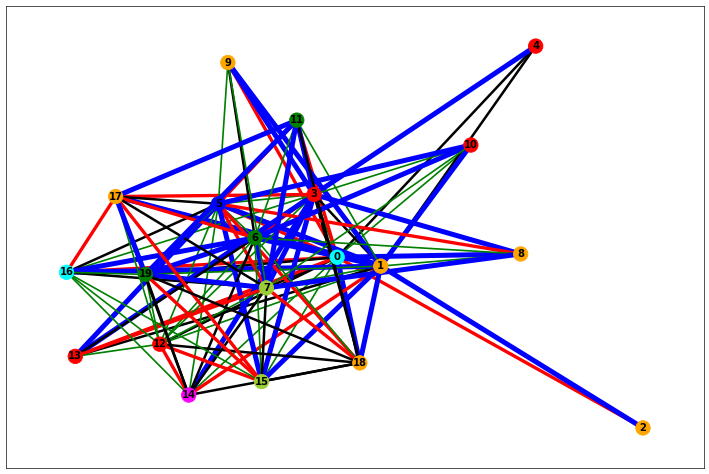

In [16]:
G = trainer[cls_idx].evaluate(threshold=0.5, show=True)

In [17]:
print(type(G))
print(G.adj)
print(G.nodes)
print(G.edges)

print('Nodes: ')
for v in list(G.nodes):
    print(G.nodes[v])
    
print('Edges: ')
for e in G.edges:
    print(G.edges[e])

<class 'networkx.classes.graph.Graph'>
{0: {1: {'label': 0}, 2: {'label': 2}, 3: {'label': 1}, 4: {'label': 0}, 5: {'label': 2}, 6: {'label': 0}, 7: {'label': 0}, 8: {'label': 3}, 9: {'label': 2}, 10: {'label': 1}, 11: {'label': 2}, 12: {'label': 0}, 13: {'label': 2}, 14: {'label': 1}, 15: {'label': 1}, 16: {'label': 2}, 17: {'label': 2}, 18: {'label': 3}, 19: {'label': 0}}, 1: {0: {'label': 0}, 2: {'label': 3}, 3: {'label': 0}, 4: {'label': 0}, 5: {'label': 3}, 6: {'label': 3}, 7: {'label': 1}, 8: {'label': 1}, 9: {'label': 3}, 10: {'label': 3}, 11: {'label': 1}, 12: {'label': 1}, 13: {'label': 0}, 14: {'label': 2}, 15: {'label': 3}, 16: {'label': 3}, 17: {'label': 3}, 18: {'label': 3}, 19: {'label': 1}}, 2: {0: {'label': 2}, 1: {'label': 3}}, 3: {0: {'label': 1}, 1: {'label': 0}, 4: {'label': 3}, 5: {'label': 1}, 6: {'label': 2}, 7: {'label': 3}, 8: {'label': 3}, 9: {'label': 3}, 10: {'label': 1}, 11: {'label': 3}, 12: {'label': 1}, 13: {'label': 3}, 14: {'label': 3}, 15: {'label': 3

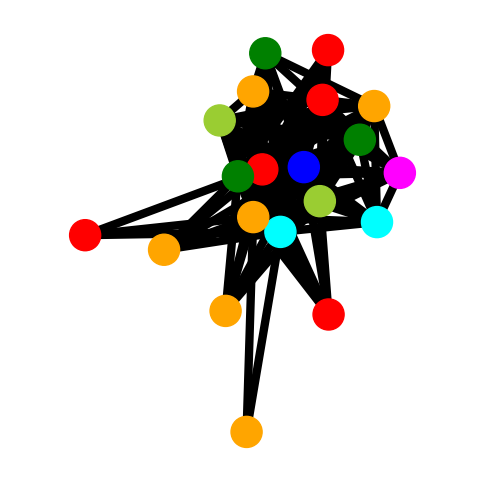

In [18]:
trainer[cls_idx].dataset.draw(G, ax=None)